In [1]:
# Initialize a new VAME project
import vame
import functions_bondjango as bd
import functions_vame as fv
import paths
import random
import os
import shutil
import h5py
import numpy as np
import importlib

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti


In [2]:
# Manually define the config path if project has already been created
# config = r"D:\VAME_projects\VAME_prey_6-Apr28-2021\config.yaml"
# config = r"D:\VAME_projects\VAME_prey_7-Apr29-2021\config.yaml"
# config = r"D:\VAME_projects\VAME_prey_15dim-May2-2021\config.yaml"
# config = r"D:\VAME_projects\VAME_prey_mouse15dim-May14-2021\config.yaml"
config = r"D:\VAME_projects\VAME_prey_15dim-May17-2021\config.yaml"

In [2]:
%%time
# get the file paths

# define the number of files to use
number_files = 750
# define the search string
search_string = ['rig:miniscope, result:succ', 'rig:miniscope, result:fail']
# search_string = ['rig:miniscope']

# define the target model
target_model = 'video_experiment'

# allocate memory for the files
files = []

# for all the queries
for query in search_string:
    # get the queryset
    files.append(bd.query_database(target_model, query))

# concatenate the list
files_list = [item for sublist in files for item in sublist]
print(len(files_list))
# allocate memory for the cleaned up files and analysis paths
files = []
analysis_paths = []
# get rid of the files that are too short for pose segmentation
# for all the files
for el in files_list:
    # get the path to the analyzed data file
    dlc_path = el['avi_path']
    dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
    dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
    dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
    # open the file using h5py, as can't install pytables in this env
    with h5py.File(dlc_path, 'r') as f:
        # parse the bounds from the file
        bounds = np.array(f['frame_bounds/block0_values'])[0]
#         values = np.array(f['frame_bounds/block0_values'])[0]
#         labels = np.array(f['frame_bounds/block0_items']).astype(str)
#         bounds = pd.DataFrame(values.reshape([1, 3]), columns=labels)
        # add the file to the final list only if it's long enough
#         if (bounds.loc[0, 'end'] - bounds.loc[0, 'start']) > 50:
        if (bounds[1] - bounds[0]) > 50:
            files.append(el)
            analysis_paths.append(dlc_path)

if number_files > 0:
    # pick a random subset of number_files
    random_indexes = random.sample(range(len(files)), number_files)
    files = [files[el] for el in random_indexes]
    analysis_paths = [analysis_paths[el] for el in random_indexes]

# get the video paths in a list
video_paths = [el['avi_path'] for el in files]

# define the working directory
working_directory = paths.vame_path
print(len(video_paths))
print(len(analysis_paths))

770
750
750
Wall time: 15 s


In [4]:
# print(files[0]['preproc_files'][0])

# dlc_path = files[0]['avi_path']
# dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
# dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
# dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
# print(dlc_path)

In [3]:
%%time

# initialize the project
config = vame.init_new_project(project='VAME_prey_15dim', 
                               videos=video_paths, working_directory=working_directory, videotype='.avi')

Created "D:\VAME_projects\VAME_prey_15dim-May17-2021\videos"
Created "D:\VAME_projects\VAME_prey_15dim-May17-2021\data"
Created "D:\VAME_projects\VAME_prey_15dim-May17-2021\results"
Created "D:\VAME_projects\VAME_prey_15dim-May17-2021\model"
Copying the videos 

A VAME project has been created. 

Now its time to prepare your data for VAME. The first step is to move your pose .csv file (e.g. DeepLabCut .csv) into the //YOUR//VAME//PROJECT//videos//pose_estimation folder. From here you can call either the function vame.egocentric_alignment() or if your data is by design egocentric call vame.csv_to_numpy(). This will prepare the data in .csv into the right format to start working with VAME.
Wall time: 1min 45s


In [4]:
%%time
# Align video trajectories
importlib.reload(fv)
# get the project folder
project_folder, _ = os.path.split(config)

# for all the videos
for idx, el in enumerate(files):
    print(f'Current file: {el["slug"]}')
    
#     # if there is no preprocessing file, skip and warn
#     if len(el['preproc_files']) == 0:
#         print('no preprocessing file found')
#         continue
#     # load the avi file path
#     dlc_path = el['avi_path']
#     # edit it for the preprocessing path
#     dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
#     dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
#     dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
    # get the path from the list calculated above
    dlc_path = analysis_paths[idx]
    # define the cropping
    crop_size = (1, 1)
    # egocentrically align the data and save
    fv.run_alignment(dlc_path, project_folder, '.avi', crop_size)

Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 398/398 [00:00<00:00, 5810.15it/s]

Current file: 08_13_2020_16_09_18_miniscope_dg_200617_b_succ_injured
Current file: 08_07_2020_17_03_26_miniscope_dg_200617_b_succ
Current file: 03_31_2021_09_45_11_miniscope_dg_210202_a_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1544 [00:00<?, ?it/s]

Current file: 08_16_2020_16_27_15_miniscope_dg_200617_b_succ
Current file: 12_11_2019_17_14_34_miniscope_mm_191108_a_fail_miniscopeafterbonsai


Align frames:   0%|                                                                                                                                                                                               | 0/603 [00:00<?, ?it/s]

Current file: 09_06_2020_15_25_10_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_08_33_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_52_11_miniscope_mm_191108_a_succ


Align frames:  10%|██████████████████▏                                                                                                                                                               | 552/5419 [00:00<00:00, 5507.43it/s]

Current file: 08_12_2020_16_30_56_miniscope_dg_200617_b_succ
Current file: 12_03_2019_16_20_45_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 2915.58it/s]

Current file: 09_08_2020_15_26_21_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_31_55_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_54_36_miniscope_dg_200617_b_succ
Current file: 03_02_2020_16_20_39_miniscope_mm_200129_b_succ



Align frames:  21%|█████████████████████████████████████▌                                                                                                                                            | 768/3643 [00:00<00:00, 7335.25it/s]

Current file: 11_25_2019_15_43_30_miniscope_mm_191107_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 308/308 [00:00<00:00, 3777.93it/s]


Current file: 08_14_2020_15_17_30_miniscope_dg_200701_a_succ_injured
Current file: 12_10_2019_16_36_38_miniscope_mm_191106_a_succ_nomini
Current file: 08_08_2020_15_27_33_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 6417.21it/s]

Current file: 12_09_2019_16_46_19_miniscope_mm_191106_a_succ_nomini
Current file: 08_07_2020_16_28_48_miniscope_dg_200701_a_succ
Current file: 11_29_2019_14_25_32_miniscope_mm_191105_a_fail_nomini



Align frames:   0%|                                                                                                                                                                                               | 0/321 [00:00<?, ?it/s]

Current file: 11_13_2019_18_04_22_miniscope_dg_190806_a_succ_nofluo
Current file: 08_21_2020_16_28_13_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 6918.55it/s]

Current file: 08_29_2020_16_01_17_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_23_32_miniscope_dg_200701_a_succ
Current file: 08_10_2020_17_20_19_miniscope_dg_200617_b_succ
Current file: 08_11_2020_16_06_06_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1656 [00:00<?, ?it/s]

Current file: 03_12_2020_16_49_07_miniscope_mm_200129_b_succ
Current file: 12_04_2019_16_53_11_miniscope_mm_191105_a_succ_nomini
Current file: 03_25_2021_09_45_37_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:   0%|                                                                                                                                                                                               | 0/616 [00:00<?, ?it/s]

Current file: 08_21_2020_16_18_56_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_30_31_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4867 [00:00<?, ?it/s]

Current file: 08_30_2020_16_03_21_miniscope_dg_200701_a_succ
Current file: 12_02_2019_17_52_21_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/241 [00:00<?, ?it/s]

Current file: 12_12_2019_15_04_45_miniscope_mm_191108_a_succ
Current file: 08_13_2020_16_17_47_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_16_05_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 3519.54it/s]

Current file: 08_14_2020_15_50_50_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_47_10_miniscope_dg_200617_b_succ
Current file: 08_15_2020_15_54_28_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/371 [00:00<?, ?it/s]

Current file: 09_07_2020_14_42_14_miniscope_dg_200701_a_succ_injured
Current file: 08_15_2020_16_16_11_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_43_52_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/3484 [00:00<?, ?it/s]

Current file: 12_04_2019_16_07_38_miniscope_mm_191108_a_succ_nomini
Current file: 11_25_2019_15_28_57_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 4104.68it/s]

Current file: 08_14_2020_15_09_52_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_53_35_miniscope_dg_200701_a_succ_injured
Current file: 09_06_2020_15_14_12_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 4682.53it/s]

Current file: 11_12_2019_17_10_51_miniscope_dg_190810_a_succ_nomini
Current file: 09_02_2020_17_32_19_miniscope_dg_200617_b_succ
Current file: 08_07_2020_17_13_15_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/961 [00:00<?, ?it/s]

Current file: 03_11_2020_16_37_26_miniscope_mm_200129_b_succ
Current file: 08_07_2020_16_05_16_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 2869.69it/s]

Current file: 03_02_2020_15_59_15_miniscope_mm_200129_a_succ
Current file: 08_15_2020_16_02_16_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_29_24_miniscope_dg_200617_b_succ



Align frames:  33%|██████████████████████████████████████████████████████████▌                                                                                                                       | 543/1652 [00:00<00:00, 5415.84it/s]

Current file: 12_12_2019_15_18_57_miniscope_mm_191108_a_fail


Align frames:  25%|████████████████████████████████████████████▋                                                                                                                                     | 619/2465 [00:00<00:00, 6149.93it/s]

Current file: 08_10_2020_17_13_00_miniscope_dg_200617_b_succ
Current file: 03_29_2021_09_56_46_miniscope_dg_210202_a_succ


Align frames:  52%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 586/1133 [00:00<00:00, 5563.44it/s]

Current file: 09_02_2020_16_45_55_miniscope_dg_200701_a_succ
Current file: 11_12_2019_17_02_59_miniscope_dg_190810_a_succ_nomini


Align frames:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 714/961 [00:00<00:00, 7115.31it/s]

Current file: 08_12_2020_16_17_05_miniscope_dg_200617_b_succ
Current file: 08_06_2020_17_58_44_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/1051 [00:00<?, ?it/s]

Current file: 08_16_2020_15_39_22_miniscope_dg_200701_a_succ
Current file: 03_25_2021_09_52_28_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:   0%|                                                                                                                                                                                               | 0/218 [00:00<?, ?it/s]

Current file: 08_16_2020_15_43_35_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_03_49_miniscope_dg_200701_a_succ_nomini
Current file: 08_15_2020_15_41_21_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 266/266 [00:00<00:00, 7311.70it/s]


Current file: 09_07_2020_14_45_29_miniscope_dg_200701_a_succ
Current file: 12_07_2019_15_39_33_miniscope_mm_191108_a_succ
Current file: 08_20_2020_16_23_32_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 2514.95it/s]

Current file: 12_04_2019_15_23_56_miniscope_mm_191106_a_succ_nomini
Current file: 09_03_2020_16_31_10_miniscope_dg_200617_b_succ
Current file: 09_05_2020_15_59_18_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/344 [00:00<?, ?it/s]

Current file: 08_07_2020_16_13_27_miniscope_dg_200701_a_succ
Current file: 12_12_2019_15_08_15_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 3956.51it/s]

Current file: 03_10_2020_15_48_48_miniscope_mm_200129_a_succ
Current file: 08_13_2020_15_39_43_miniscope_dg_200701_a_succ_movecam
Current file: 08_05_2020_15_29_56_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/279 [00:00<?, ?it/s]

Current file: 08_06_2020_18_42_09_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_02_32_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_01_41_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 982/982 [00:00<00:00, 6863.68it/s]

Current file: 03_31_2021_09_26_57_miniscope_dg_210202_a_succ
Current file: 08_11_2020_15_44_45_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 3885.16it/s]

Current file: 12_09_2019_17_01_33_miniscope_mm_191107_a_succ_bad_track_nomini
Current file: 08_15_2020_16_31_30_miniscope_dg_200617_b_succ_nofluo
Current file: 08_07_2020_16_39_29_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/229 [00:00<?, ?it/s]

Current file: 08_16_2020_16_04_28_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_15_31_miniscope_dg_200701_a_succ
Current file: 08_21_2020_16_24_35_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/3915 [00:00<?, ?it/s]

Current file: 11_25_2019_16_28_56_miniscope_mm_191108_a_fail_nomini
Current file: 08_19_2020_16_11_32_miniscope_dg_200701_a_succ_injured
Current file: 11_25_2019_15_09_04_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 3255.40it/s]

Current file: 08_15_2020_16_18_50_miniscope_dg_200617_b_succ
Current file: 08_15_2020_15_58_47_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/451 [00:00<?, ?it/s]

Current file: 08_30_2020_15_59_37_miniscope_dg_200701_a_succ_injured
Current file: 08_08_2020_16_18_51_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_17_40_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:00<00:00, 3455.09it/s]

Current file: 09_02_2020_17_35_23_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_34_10_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_11_16_miniscope_mm_191108_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 4153.00it/s]

Current file: 08_12_2020_15_39_17_miniscope_dg_200701_a_succ
Current file: 09_02_2020_17_17_37_miniscope_dg_200617_b_succ
Current file: 12_04_2019_15_19_29_miniscope_mm_191106_a_succ_nomini



Align frames:  15%|██████████████████████████▉                                                                                                                                                       | 568/3755 [00:00<00:00, 5645.29it/s]

Current file: 11_25_2019_14_47_40_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                | 0/55 [00:00<?, ?it/s]

Current file: 12_12_2019_15_11_45_miniscope_mm_191108_a_fail
Current file: 09_02_2020_17_21_30_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [00:00<00:00, 4948.99it/s]

Current file: 08_30_2020_16_10_58_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_57_32_miniscope_dg_200617_b_succ
Current file: 12_06_2019_14_55_56_miniscope_mm_191106_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:00<00:00, 4277.17it/s]

Current file: 12_07_2019_16_29_31_miniscope_mm_191107_a_succ_nomini
Current file: 08_18_2020_16_41_33_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_05_59_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 5032.13it/s]


Current file: 08_14_2020_15_07_03_miniscope_dg_200701_a_succ
Current file: 03_11_2020_16_42_47_miniscope_mm_200129_b_succ
Current file: 03_26_2021_08_53_20_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:   0%|                                                                                                                                                                                              | 0/1812 [00:00<?, ?it/s]

Current file: 08_12_2020_15_47_44_miniscope_dg_200701_a_succ
Current file: 12_04_2019_16_27_21_miniscope_mm_191108_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 6936.34it/s]

Current file: 08_06_2020_17_33_37_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_44_23_miniscope_dg_200701_a_succ_noncon
Current file: 08_29_2020_15_55_24_miniscope_dg_200701_a_succ



Align frames:  15%|██████████████████████████▉                                                                                                                                                       | 508/3356 [00:00<00:00, 5068.81it/s]

Current file: 11_25_2019_15_49_41_miniscope_mm_191107_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 543/543 [00:00<00:00, 6636.54it/s]

Current file: 09_04_2020_17_07_37_miniscope_dg_200617_b_succ_injured
Current file: 04_02_2021_10_21_22_miniscope_dg_210202_a_succ
Current file: 03_12_2020_16_56_04_miniscope_mm_200129_b_succ



Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1418/1418 [00:00<00:00, 7836.72it/s]

Current file: 11_12_2019_16_50_34_miniscope_dg_190806_a_succ_nofluo



Align frames:   0%|                                                                                                                                                                                               | 0/106 [00:00<?, ?it/s]

Current file: 11_14_2019_17_19_46_miniscope_dg_190806_a_succ_nofluo
Current file: 08_11_2020_15_31_17_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 4688.16it/s]

Current file: 03_31_2021_09_35_52_miniscope_dg_210202_a_succ
Current file: 08_30_2020_15_47_33_miniscope_dg_200701_a_succ_injured
Current file: 08_31_2020_15_54_51_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 4221.83it/s]


Current file: 09_08_2020_15_32_30_miniscope_dg_200617_b_succ
Current file: 08_31_2020_15_59_34_miniscope_dg_200701_a_succ
Current file: 12_06_2019_14_15_39_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/393 [00:00<?, ?it/s]

Current file: 03_11_2020_16_52_20_miniscope_mm_200129_b_succ
Current file: 08_31_2020_16_36_15_miniscope_dg_200617_b_succ
Current file: 03_04_2020_15_37_26_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 430/430 [00:00<00:00, 6128.38it/s]

Current file: 09_07_2020_14_51_32_miniscope_dg_200701_a_succ
Current file: 03_06_2020_16_17_02_miniscope_mm_200129_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/144 [00:00<?, ?it/s]

Current file: 08_16_2020_15_52_46_miniscope_dg_200701_a_succ
Current file: 08_16_2020_16_18_28_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_12_08_miniscope_dg_200617_b_succ


Align frames:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 554/663 [00:00<00:00, 5511.40it/s]

Current file: 08_19_2020_15_51_39_miniscope_dg_200701_a_succ_injured
Current file: 08_06_2020_17_41_32_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4874 [00:00<?, ?it/s]

Current file: 08_13_2020_15_59_37_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_51_54_miniscope_dg_200701_a_succ
Current file: 11_29_2019_16_02_26_miniscope_mm_191108_a_fail_nomini


Align frames:  11%|██████████████████▉                                                                                                                                                               | 588/5539 [00:00<00:00, 5453.38it/s]

Current file: 12_02_2019_16_58_55_miniscope_mm_191106_a_fail_nomini


Align frames:  46%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 735/1597 [00:00<00:00, 7345.68it/s]

Current file: 12_02_2019_17_26_56_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/513 [00:00<?, ?it/s]

Current file: 08_10_2020_16_56_35_miniscope_dg_200701_a_succ_injured
Current file: 08_30_2020_16_20_40_miniscope_dg_200617_b_succ
Current file: 04_01_2021_09_43_29_miniscope_dg_210202_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 895/895 [00:00<00:00, 5636.46it/s]

Current file: 12_09_2019_16_49_50_miniscope_mm_191106_a_succ_nomini
Current file: 09_08_2020_15_36_13_miniscope_dg_200617_b_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 5272.73it/s]

Current file: 09_05_2020_16_30_05_miniscope_dg_200617_b_succ_injured
Current file: 09_05_2020_16_12_58_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_33_02_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/319 [00:00<?, ?it/s]

Current file: 11_12_2019_17_07_21_miniscope_dg_190810_a_succ_nomini
Current file: 03_11_2020_16_14_11_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:00<00:00, 5978.77it/s]


Current file: 08_19_2020_16_44_52_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_50_48_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_19_09_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 2447.04it/s]

Current file: 08_20_2020_16_27_00_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_32_34_miniscope_dg_200617_b_succ
Current file: 12_06_2019_14_00_21_miniscope_mm_191105_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 3391.50it/s]

Current file: 08_14_2020_15_28_27_miniscope_dg_200701_a_succ
Current file: 12_06_2019_14_07_11_miniscope_mm_191105_a_succ_nomini



Align frames:  18%|███████████████████████████████▏                                                                                                                                                  | 399/2279 [00:00<00:00, 3914.92it/s]

Current file: 11_25_2019_15_58_05_miniscope_mm_191107_a_fail_nomini


Align frames:  10%|█████████████████▍                                                                                                                                                                | 393/4022 [00:00<00:00, 3927.78it/s]

Current file: 08_19_2020_16_16_55_miniscope_dg_200701_a_succ_noncon


Align frames:  11%|████████████████████▏                                                                                                                                                             | 473/4177 [00:00<00:00, 4717.16it/s]

Current file: 11_25_2019_15_15_55_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 3538.84it/s]

Current file: 12_09_2019_16_34_39_miniscope_mm_191105_a_succ_nomini
Current file: 04_01_2021_09_35_49_miniscope_dg_210202_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/310 [00:00<?, ?it/s]

Current file: 09_01_2020_16_20_52_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_40_53_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_35_25_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                               | 0/347 [00:00<?, ?it/s]

Current file: 09_05_2020_16_09_14_miniscope_dg_200617_b_succ
Current file: 08_10_2020_16_38_11_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 3322.25it/s]

Current file: 12_06_2019_15_13_44_miniscope_mm_191107_a_succ_nomini
Current file: 09_04_2020_16_35_52_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_10_07_miniscope_dg_200701_a_succ



Align frames:  42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                       | 755/1806 [00:00<00:00, 7547.65it/s]

Current file: 11_11_2019_22_56_57_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                | 0/78 [00:00<?, ?it/s]

Current file: 08_17_2020_16_19_31_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_33_11_miniscope_dg_200617_b_succ_injured
Current file: 09_06_2020_15_11_37_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:00<00:00, 3529.16it/s]


Current file: 12_12_2019_15_00_56_miniscope_mm_191108_a_succ
Current file: 12_09_2019_16_41_05_miniscope_mm_191105_a_succ_nomini
Current file: 08_05_2020_16_06_18_miniscope_dg_200617_b_succ_earlystop


Align frames:   0%|                                                                                                                                                                                              | 0/4427 [00:00<?, ?it/s]

Current file: 08_06_2020_18_53_34_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_17_48_miniscope_dg_200617_b_succ
Current file: 11_29_2019_15_16_19_miniscope_mm_191107_a_fail_nomini


Align frames:  44%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 497/1123 [00:00<00:00, 4951.79it/s]

Current file: 09_06_2020_15_28_50_miniscope_dg_200617_b_succ
Current file: 12_07_2019_15_06_28_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 3213.73it/s]

Current file: 03_05_2020_15_56_12_miniscope_mm_200129_b_succ
Current file: 03_12_2020_16_25_39_miniscope_mm_200129_a_succ
Current file: 12_09_2019_15_04_06_miniscope_mm_191108_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [00:00<00:00, 4129.66it/s]

Current file: 08_14_2020_15_47_26_miniscope_dg_200617_b_succ_injured
Current file: 08_29_2020_16_33_45_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 308/308 [00:00<00:00, 5062.77it/s]

Current file: 08_13_2020_15_36_29_miniscope_dg_200701_a_succ
Current file: 12_07_2019_16_34_28_miniscope_mm_191107_a_succ_nomini
Current file: 03_10_2020_16_09_06_miniscope_mm_200129_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/220 [00:00<?, ?it/s]

Current file: 08_14_2020_15_23_43_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_08_29_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/645 [00:00<?, ?it/s]

Current file: 08_17_2020_16_12_24_miniscope_dg_200617_b_succ
Current file: 03_12_2020_16_23_09_miniscope_mm_200129_a_succ
Current file: 08_14_2020_15_44_42_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 390/390 [00:00<00:00, 5983.03it/s]

Current file: 08_19_2020_15_58_22_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_31_06_miniscope_dg_200617_b_succ
Current file: 11_29_2019_14_50_39_miniscope_mm_191106_a_fail_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 293/293 [00:00<00:00, 3766.50it/s]


Current file: 08_10_2020_16_34_57_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_36_15_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_12_31_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/1235 [00:00<?, ?it/s]

Current file: 08_16_2020_15_46_53_miniscope_dg_200701_a_succ
Current file: 03_29_2021_09_43_54_miniscope_dg_210202_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 4709.28it/s]

Current file: 08_18_2020_16_28_42_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_07_13_miniscope_dg_200701_a_succ
Current file: 08_16_2020_16_09_31_miniscope_dg_200617_b_succ



Align frames:  45%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 776/1719 [00:00<00:00, 7703.55it/s]

Current file: 11_12_2019_16_41_32_miniscope_dg_190806_a_succ_nofluobadtrigger


Align frames:   0%|                                                                                                                                                                                              | 0/3529 [00:00<?, ?it/s]

Current file: 09_04_2020_17_00_52_miniscope_dg_200617_b_succ
Current file: 12_04_2019_15_29_28_miniscope_mm_191106_a_succ_nomini
Current file: 11_26_2019_15_52_26_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 2754.74it/s]


Current file: 09_03_2020_16_24_34_miniscope_dg_200617_b_succ
Current file: 12_10_2019_16_48_14_miniscope_mm_191107_a_succ_nomini
Current file: 08_30_2020_15_50_51_miniscope_dg_200701_a_succ
Current file: 11_29_2019_14_03_19_miniscope_mm_191105_a_fail_nomini


Align frames:  20%|██████████████████████████████████▊                                                                                                                                               | 725/3708 [00:00<00:00, 7232.44it/s]

Current file: 11_29_2019_15_49_40_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:00<00:00, 7370.33it/s]

Current file: 08_18_2020_15_54_55_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_47_33_miniscope_dg_200617_b_succ_injured
Current file: 08_18_2020_16_25_33_miniscope_dg_200617_b_succ



Align frames:  12%|█████████████████████▋                                                                                                                                                            | 615/5052 [00:00<00:00, 6096.17it/s]

Current file: 03_25_2021_09_29_46_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:  15%|██████████████████████████▊                                                                                                                                                       | 399/2655 [00:00<00:00, 3979.13it/s]

Current file: 03_30_2021_09_51_19_miniscope_dg_210202_a_succ


Align frames:   9%|███████████████▌                                                                                                                                                                  | 428/4899 [00:00<00:01, 3968.38it/s]

Current file: 11_26_2019_17_00_05_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 337/337 [00:00<00:00, 4359.26it/s]

Current file: 08_16_2020_16_13_04_miniscope_dg_200617_b_succ
Current file: 03_13_2020_13_44_46_miniscope_mm_200129_b_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1795 [00:00<?, ?it/s]

Current file: 08_30_2020_15_56_29_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_38_09_miniscope_dg_200701_a_succ_injured


Align frames:   0%|                                                                                                                                                                                              | 0/1144 [00:00<?, ?it/s]

Current file: 04_02_2021_10_25_41_miniscope_dg_210202_a_succ
Current file: 03_04_2020_16_05_47_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 4926.79it/s]

Current file: 12_07_2019_16_38_08_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_15_35_36_miniscope_mm_191108_a_succ
Current file: 08_17_2020_15_38_44_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                              | 0/4001 [00:00<?, ?it/s]

Current file: 08_21_2020_16_08_48_miniscope_dg_200617_b_succ
Current file: 08_09_2020_14_53_16_miniscope_dg_200701_a_succ
Current file: 03_02_2020_16_09_51_miniscope_mm_200129_b_fail


Align frames:   0%|                                                                                                                                                                                              | 0/1321 [00:00<?, ?it/s]

Current file: 09_05_2020_15_52_46_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_30_27_miniscope_dg_200701_a_succ_injured
Current file: 08_08_2020_15_33_57_miniscope_dg_200701_a_succ_injured_noncon


Align frames:  15%|█████████████████████████▊                                                                                                                                                        | 581/4004 [00:00<00:00, 5779.96it/s]

Current file: 11_11_2019_23_23_16_miniscope_dg_190810_a_fail_nomini


Align frames:  12%|█████████████████████▊                                                                                                                                                            | 594/4861 [00:00<00:00, 5931.32it/s]

Current file: 12_02_2019_16_27_33_miniscope_mm_191105_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 3904.69it/s]

Current file: 09_06_2020_14_55_10_miniscope_dg_200701_a_succ_injured
Current file: 09_06_2020_15_35_22_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_01_53_miniscope_dg_200701_a_succ



Align frames:  10%|█████████████████▎                                                                                                                                                                | 387/3978 [00:00<00:00, 3818.52it/s]

Current file: 11_11_2019_00_54_37_miniscope_dg_190806_a_fail_nomini


Align frames:  38%|███████████████████████████████████████████████████████████████████▌                                                                                                              | 532/1401 [00:00<00:00, 5275.28it/s]

Current file: 08_19_2020_16_50_11_miniscope_dg_200617_b_succ
Current file: 03_02_2020_16_29_48_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/2299 [00:00<?, ?it/s]

Current file: 08_19_2020_16_09_08_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_48_19_miniscope_dg_200701_a_succ
Current file: 08_05_2020_15_22_44_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:00<00:00, 4969.93it/s]


Current file: 08_21_2020_15_32_26_miniscope_dg_200701_a_succ
Current file: 03_06_2020_16_00_37_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/611 [00:00<?, ?it/s]

Current file: 03_13_2020_13_49_34_miniscope_mm_200129_b_succ
Current file: 04_02_2021_10_34_47_miniscope_dg_210202_a_succ


Align frames:  21%|████████████████████████████████████▊                                                                                                                                             | 578/2797 [00:00<00:00, 5758.33it/s]

Current file: 11_11_2019_00_41_27_miniscope_dg_190806_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 749/749 [00:00<00:00, 5463.28it/s]


Current file: 08_05_2020_15_36_29_miniscope_dg_200701_a_succ
Current file: 12_07_2019_15_47_28_miniscope_mm_191108_a_succ


Align frames:  10%|█████████████████▋                                                                                                                                                                | 492/4953 [00:00<00:00, 4878.10it/s]

Current file: 12_02_2019_16_05_42_miniscope_mm_191105_a_fail_nomini


Align frames:  14%|█████████████████████████▋                                                                                                                                                        | 571/3955 [00:00<00:00, 5286.59it/s]

Current file: 12_07_2019_16_23_23_miniscope_mm_191106_a_succ_nomini
Current file: 12_02_2019_17_08_58_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/257 [00:00<?, ?it/s]

Current file: 08_10_2020_17_33_00_miniscope_dg_200617_b_succ
Current file: 08_11_2020_16_10_57_miniscope_dg_200617_b_succ
Current file: 12_11_2019_17_01_21_miniscope_mm_191108_a_succ


Align frames:  34%|█████████████████████████████████████████████████████████████▍                                                                                                                    | 668/1937 [00:00<00:00, 6616.87it/s]

Current file: 03_30_2021_09_41_12_miniscope_dg_210202_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 321/321 [00:00<00:00, 4951.41it/s]

Current file: 04_02_2021_10_30_38_miniscope_dg_210202_a_succ
Current file: 04_01_2021_09_55_30_miniscope_dg_210202_a_succ
Current file: 09_02_2020_17_13_08_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/727 [00:00<?, ?it/s]

Current file: 08_20_2020_16_43_39_miniscope_dg_200617_b_succ_injured
Current file: 08_06_2020_17_37_15_miniscope_dg_200701_a_succ


Align frames:  52%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 406/775 [00:00<00:00, 3727.36it/s]

Current file: 08_19_2020_15_55_28_miniscope_dg_200701_a_succ_injured
Current file: 08_06_2020_18_24_41_miniscope_dg_200617_b_succ


Align frames:   9%|████████████████▎                                                                                                                                                                 | 435/4733 [00:00<00:00, 4316.12it/s]

Current file: 11_29_2019_15_42_19_miniscope_mm_191108_a_fail_nomini


Align frames:  20%|████████████████████████████████████                                                                                                                                              | 537/2647 [00:00<00:00, 5349.18it/s]

Current file: 09_05_2020_16_16_21_miniscope_dg_200617_b_succ
Current file: 03_25_2021_09_36_59_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:   0%|                                                                                                                                                                                               | 0/179 [00:00<?, ?it/s]

Current file: 08_31_2020_15_46_43_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_05_52_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_10_12_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 826/826 [00:00<00:00, 5483.00it/s]

Current file: 03_31_2021_09_38_46_miniscope_dg_210202_a_succ
Current file: 12_07_2019_16_18_20_miniscope_mm_191106_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                               | 0/194 [00:00<?, ?it/s]

Current file: 03_06_2020_16_20_40_miniscope_mm_200129_b_succ
Current file: 12_16_2019_16_31_08_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 305/305 [00:00<00:00, 4611.98it/s]

Current file: 09_08_2020_15_39_45_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_28_07_miniscope_dg_200617_b_succ
Current file: 11_14_2019_17_46_42_miniscope_dg_190810_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 521/521 [00:00<00:00, 7742.85it/s]

Current file: 12_03_2019_15_52_44_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_15_19_56_miniscope_mm_191108_a_succ



Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 2805.28it/s]

Current file: 08_08_2020_16_08_14_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_14_23_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 3522.00it/s]

Current file: 08_19_2020_16_27_02_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_15_39_miniscope_dg_200617_b_succ



Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 323/323 [00:00<00:00, 10405.14it/s]

Current file: 08_07_2020_16_57_16_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_42_06_miniscope_dg_200617_b_succ
Current file: 11_29_2019_14_36_52_miniscope_mm_191106_a_fail_nomini



Align frames:  10%|██████████████████▏                                                                                                                                                               | 448/4389 [00:00<00:00, 4444.50it/s]

Current file: 11_11_2019_23_07_55_miniscope_dg_190806_a_fail_nofluo


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 4275.06it/s]

Current file: 09_06_2020_15_38_32_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_09_44_miniscope_dg_200701_a_succ
Current file: 08_15_2020_16_28_36_miniscope_dg_200617_b_succ_injured
Current file: 08_11_2020_15_12_33_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 344/344 [00:00<00:00, 5259.58it/s]

Current file: 08_10_2020_17_04_35_miniscope_dg_200617_b_succ
Current file: 12_07_2019_15_29_41_miniscope_mm_191108_a_succ
Current file: 08_29_2020_16_04_30_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/220 [00:00<?, ?it/s]

Current file: 03_31_2021_09_23_53_miniscope_dg_210202_a_succ
Current file: 09_07_2020_15_23_07_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4661 [00:00<?, ?it/s]

Current file: 03_05_2020_15_46_40_miniscope_mm_200129_a_succ
Current file: 11_26_2019_16_32_30_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/987 [00:00<?, ?it/s]

Current file: 12_10_2019_15_15_08_miniscope_mm_191108_a_succ
Current file: 03_02_2020_15_41_21_miniscope_mm_200129_a_succ_nomini


Align frames:   9%|████████████████▎                                                                                                                                                                 | 404/4402 [00:00<00:00, 4004.32it/s]

Current file: 11_29_2019_14_57_47_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 310/310 [00:00<00:00, 4127.32it/s]

Current file: 12_04_2019_16_44_23_miniscope_mm_191105_a_succ_nomini
Current file: 08_18_2020_16_45_57_miniscope_dg_200617_b_succ
Current file: 03_12_2020_16_52_33_miniscope_mm_200129_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 361/361 [00:00<00:00, 4859.99it/s]

Current file: 03_10_2020_15_56_24_miniscope_mm_200129_a_succ
Current file: 12_10_2019_15_05_17_miniscope_mm_191108_a_succ
Current file: 09_01_2020_16_58_35_miniscope_dg_200617_b_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 5153.67it/s]

Current file: 08_18_2020_16_34_54_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_25_00_miniscope_dg_200701_a_succ
Current file: 09_04_2020_17_11_33_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_15_09_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 7801.23it/s]

Current file: 08_08_2020_16_00_22_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_22_44_miniscope_dg_200617_b_succ_injured



Align frames:  34%|███████████████████████████████████████████████████████████▋                                                                                                                      | 570/1701 [00:00<00:00, 5518.03it/s]

Current file: 09_06_2020_15_09_11_miniscope_dg_200701_a_succ
Current file: 11_11_2019_23_43_13_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 146/146 [00:00<00:00, 4082.07it/s]


Current file: 09_01_2020_16_10_27_miniscope_dg_200701_a_succ
Current file: 08_20_2020_15_48_39_miniscope_dg_200701_a_succ
Current file: 12_04_2019_16_13_30_miniscope_mm_191108_a_succ_nomini


Align frames:   9%|████████████████▋                                                                                                                                                                 | 435/4653 [00:00<00:00, 4335.21it/s]

Current file: 11_25_2019_14_55_06_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                | 0/85 [00:00<?, ?it/s]

Current file: 12_09_2019_16_53_42_miniscope_mm_191106_a_succ_nomini
Current file: 08_29_2020_16_08_29_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_26_46_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                               | 0/717 [00:00<?, ?it/s]

Current file: 12_06_2019_14_47_35_miniscope_mm_191106_a_succ_nomini
Current file: 12_10_2019_15_43_20_miniscope_mm_191108_a_fail


Align frames:  40%|███████████████████████████████████████████████████████████████████████▋                                                                                                          | 500/1241 [00:00<00:00, 4976.29it/s]

Current file: 08_16_2020_16_15_42_miniscope_dg_200617_b_succ
Current file: 12_03_2019_15_24_04_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/182 [00:00<?, ?it/s]

Current file: 08_19_2020_16_55_33_miniscope_dg_200617_b_succ
Current file: 08_20_2020_15_54_48_miniscope_dg_200701_a_succ
Current file: 03_29_2021_09_17_07_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/515 [00:00<?, ?it/s]

Current file: 12_04_2019_16_01_30_miniscope_mm_191107_a_succ_nomini
Current file: 08_08_2020_15_24_06_miniscope_dg_200701_a_succ


Align frames:  33%|██████████████████████████████████████████████████████████▍                                                                                                                       | 552/1683 [00:00<00:00, 5495.86it/s]

Current file: 12_07_2019_15_56_10_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                               | 0/737 [00:00<?, ?it/s]

Current file: 12_07_2019_16_09_54_miniscope_mm_191105_a_succ_nomini
Current file: 09_02_2020_16_53_10_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_35_36_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 5396.59it/s]

Current file: 08_15_2020_16_25_08_miniscope_dg_200617_b_succ_injured
Current file: 09_03_2020_16_21_39_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_24_56_miniscope_dg_200617_b_succ



Align frames:  14%|████████████████████████▍                                                                                                                                                         | 466/3398 [00:00<00:00, 4646.61it/s]

Current file: 03_24_2021_13_52_36_miniscope_dg_210202_a_fail_nonres


Align frames:   0%|                                                                                                                                                                                               | 0/321 [00:00<?, ?it/s]

Current file: 03_10_2020_15_52_35_miniscope_mm_200129_a_succ
Current file: 08_11_2020_15_56_40_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_12_24_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/204 [00:00<?, ?it/s]

Current file: 12_03_2019_15_57_28_miniscope_mm_191107_a_succ_nomini
Current file: 03_12_2020_16_32_46_miniscope_mm_200129_a_succ
Current file: 08_10_2020_17_24_14_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                               | 0/849 [00:00<?, ?it/s]

Current file: 08_20_2020_16_18_53_miniscope_dg_200617_b_succ
Current file: 03_31_2021_09_19_18_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4076 [00:00<?, ?it/s]

Current file: 12_04_2019_15_52_05_miniscope_mm_191107_a_succ_nomini
Current file: 11_25_2019_14_38_45_miniscope_mm_191105_a_fail_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 2525.01it/s]

Current file: 12_04_2019_16_39_29_miniscope_mm_191105_a_succ_nomini
Current file: 08_16_2020_16_07_07_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/511 [00:00<?, ?it/s]

Current file: 08_08_2020_16_29_56_miniscope_dg_200617_b_succ
Current file: 08_16_2020_15_35_26_miniscope_dg_200701_a_succ
Current file: 04_01_2021_09_59_45_miniscope_dg_210202_a_succ_injured


Align frames:   9%|███████████████▌                                                                                                                                                                  | 446/5092 [00:00<00:01, 4449.02it/s]

Current file: 09_08_2020_15_13_51_miniscope_dg_200701_a_succ
Current file: 12_02_2019_16_45_51_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 397/397 [00:00<00:00, 5526.57it/s]

Current file: 08_09_2020_16_08_16_miniscope_dg_200617_b_succ
Current file: 08_07_2020_17_08_34_miniscope_dg_200617_b_succ



Align frames:   9%|███████████████▎                                                                                                                                                                  | 435/5075 [00:00<00:01, 4323.00it/s]

Current file: 09_02_2020_17_27_37_miniscope_dg_200617_b_succ
Current file: 12_03_2019_15_00_53_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/911 [00:00<?, ?it/s]

Current file: 08_18_2020_15_59_09_miniscope_dg_200701_a_succ
Current file: 08_17_2020_16_01_03_miniscope_dg_200617_b_succ
Current file: 11_11_2019_23_35_36_miniscope_dg_190810_a_succ_nomini


Align frames:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 546/585 [00:00<00:00, 5427.27it/s]

Current file: 08_17_2020_15_36_48_miniscope_dg_200701_a_succ
Current file: 04_01_2021_09_47_53_miniscope_dg_210202_a_succ


Align frames:  23%|█████████████████████████████████████████▎                                                                                                                                        | 465/2006 [00:00<00:00, 4622.56it/s]

Current file: 08_05_2020_16_20_09_miniscope_dg_200617_b_succ


Align frames:   9%|████████████████▋                                                                                                                                                                 | 351/3740 [00:00<00:00, 3486.17it/s]

Current file: 12_03_2019_15_15_55_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 2750.19it/s]

Current file: 03_10_2020_16_17_45_miniscope_mm_200129_b_succ
Current file: 09_06_2020_15_43_13_miniscope_dg_200617_b_succ
Current file: 09_02_2020_16_37_35_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 3628.08it/s]

Current file: 08_10_2020_16_31_43_miniscope_dg_200701_a_succ
Current file: 11_14_2019_17_50_12_miniscope_dg_190810_a_succ_nomini
Current file: 04_01_2021_09_31_49_miniscope_dg_210202_a_succ_grabbedcable



Align frames:   0%|                                                                                                                                                                                               | 0/250 [00:00<?, ?it/s]

Current file: 08_15_2020_15_45_13_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_03_07_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_50_17_miniscope_dg_200701_a_succ


Align frames:  11%|███████████████████                                                                                                                                                               | 528/4933 [00:00<00:00, 5208.73it/s]

Current file: 08_06_2020_17_47_03_miniscope_dg_200701_a_fail


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 3967.00it/s]

Current file: 12_03_2019_16_03_45_miniscope_mm_191107_a_succ_nomini
Current file: 08_09_2020_15_51_40_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/491 [00:00<?, ?it/s]

Current file: 08_15_2020_15_49_06_miniscope_dg_200701_a_succ
Current file: 11_29_2019_14_09_23_miniscope_mm_191105_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 329/329 [00:00<00:00, 4919.26it/s]

Current file: 08_21_2020_15_48_23_miniscope_dg_200701_a_succ
Current file: 12_06_2019_15_04_44_miniscope_mm_191107_a_succ_nomini
Current file: 08_06_2020_18_50_24_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/634 [00:00<?, ?it/s]

Current file: 09_04_2020_16_43_01_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_32_21_miniscope_dg_200701_a_succ_injured
Current file: 11_13_2019_18_08_16_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 985/985 [00:00<00:00, 7726.50it/s]


Current file: 04_01_2021_09_38_38_miniscope_dg_210202_a_succ
Current file: 08_07_2020_16_08_55_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 3838.18it/s]


Current file: 08_07_2020_16_01_27_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_33_47_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_05_22_miniscope_dg_200701_a_succ


Align frames:   7%|████████████▉                                                                                                                                                                     | 418/5743 [00:00<00:01, 4155.41it/s]

Current file: 12_02_2019_16_13_23_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/4282 [00:00<?, ?it/s]

Current file: 08_10_2020_16_48_58_miniscope_dg_200701_a_succ
Current file: 11_26_2019_16_54_02_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/434 [00:00<?, ?it/s]

Current file: 08_14_2020_15_34_20_miniscope_dg_200617_b_succ_injured
Current file: 08_29_2020_16_46_00_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_07_32_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 5001.82it/s]


Current file: 09_04_2020_16_46_11_miniscope_dg_200701_a_succ_distractedbytrash
Current file: 08_19_2020_16_35_29_miniscope_dg_200617_b_succ_injured
Current file: 12_09_2019_16_30_00_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 460/460 [00:00<00:00, 6149.69it/s]


Current file: 09_01_2020_16_52_15_miniscope_dg_200617_b_succ_injured
Current file: 03_13_2020_14_00_19_miniscope_mm_200129_b_succ
Current file: 09_03_2020_16_15_16_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 6470.29it/s]

Current file: 12_12_2019_15_27_48_miniscope_mm_191108_a_succ
Current file: 08_13_2020_15_42_16_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_35_22_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/110 [00:00<?, ?it/s]

Current file: 03_11_2020_16_47_49_miniscope_mm_200129_b_succ
Current file: 09_04_2020_17_03_57_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_20_34_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 975/975 [00:00<00:00, 5600.82it/s]

Current file: 03_02_2020_15_35_18_miniscope_mm_200129_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                               | 0/291 [00:00<?, ?it/s]

Current file: 08_13_2020_15_55_14_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_30_48_miniscope_dg_200701_a_succ
Current file: 11_11_2019_00_49_07_miniscope_dg_190806_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/103 [00:00<?, ?it/s]

Current file: 09_01_2020_16_34_42_miniscope_dg_200617_b_succ
Current file: 09_03_2020_15_54_14_miniscope_dg_200701_a_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1107/1107 [00:00<00:00, 7484.38it/s]

Current file: 03_30_2021_09_21_05_miniscope_dg_210202_a_succ_injured



Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 3006.85it/s]

Current file: 09_02_2020_17_24_54_miniscope_dg_200617_b_succ
Current file: 09_01_2020_15_56_27_miniscope_dg_200701_a_succ
Current file: 08_11_2020_16_03_21_miniscope_dg_200617_b_succ
Current file: 03_10_2020_16_13_35_miniscope_mm_200129_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 5410.18it/s]

Current file: 08_15_2020_16_36_57_miniscope_dg_200617_b_succ
Current file: 12_12_2019_15_16_04_miniscope_mm_191108_a_succ
Current file: 11_26_2019_15_44_01_miniscope_mm_191106_a_fail_nomini



Align frames:   0%|                                                                                                                                                                                               | 0/467 [00:00<?, ?it/s]

Current file: 08_11_2020_15_27_09_miniscope_dg_200701_a_succ_injured
Current file: 08_10_2020_17_16_40_miniscope_dg_200617_b_succ
Current file: 08_09_2020_15_03_09_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/2057 [00:00<?, ?it/s]

Current file: 08_21_2020_16_12_47_miniscope_dg_200617_b_succ
Current file: 08_05_2020_16_11_00_miniscope_dg_200617_b_succ


Align frames:  40%|██████████████████████████████████████████████████████████████████████▊                                                                                                           | 495/1245 [00:00<00:00, 4816.32it/s]

Current file: 03_13_2020_13_14_07_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 444/444 [00:00<00:00, 6322.30it/s]

Current file: 09_04_2020_16_39_31_miniscope_dg_200701_a_succ
Current file: 12_11_2019_17_05_25_miniscope_mm_191108_a_succ
Current file: 08_09_2020_15_05_48_miniscope_dg_200701_a_succ



Align frames:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 534/944 [00:00<00:00, 5315.04it/s]

Current file: 08_11_2020_15_47_26_miniscope_dg_200617_b_succ
Current file: 03_05_2020_15_39_38_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/5426 [00:00<?, ?it/s]

Current file: 08_31_2020_16_29_59_miniscope_dg_200617_b_succ
Current file: 11_29_2019_15_30_55_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/3571 [00:00<?, ?it/s]

Current file: 12_07_2019_15_24_53_miniscope_mm_191108_a_succ
Current file: 08_18_2020_16_01_32_miniscope_dg_200701_a_succ_injured
Current file: 11_11_2019_22_43_04_miniscope_dg_190806_a_fail_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 446/446 [00:00<00:00, 6093.99it/s]

Current file: 12_06_2019_14_50_58_miniscope_mm_191106_a_succ_nomini
Current file: 12_16_2019_16_27_17_miniscope_mm_191108_a_succ



Align frames:  12%|█████████████████████▉                                                                                                                                                            | 555/4495 [00:00<00:00, 5547.06it/s]

Current file: 11_29_2019_14_43_47_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/257 [00:00<?, ?it/s]

Current file: 08_10_2020_16_52_15_miniscope_dg_200701_a_succ
Current file: 08_10_2020_17_07_51_miniscope_dg_200617_b_succ_injured
Current file: 12_12_2019_14_58_00_miniscope_mm_191108_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                               | 0/177 [00:00<?, ?it/s]

Current file: 09_04_2020_16_33_29_miniscope_dg_200701_a_succ
Current file: 03_10_2020_16_00_39_miniscope_mm_200129_a_succ
Current file: 09_03_2020_15_57_43_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 423/423 [00:00<00:00, 6779.97it/s]

Current file: 09_02_2020_16_50_16_miniscope_dg_200701_a_succ
Current file: 12_04_2019_16_48_26_miniscope_mm_191105_a_succ_nomini



Align frames:  21%|████████████████████████████████████▉                                                                                                                                             | 484/2333 [00:00<00:00, 4820.67it/s]

Current file: 09_06_2020_15_02_17_miniscope_dg_200701_a_succ
Current file: 12_02_2019_17_18_30_miniscope_mm_191107_a_succ_nomini


Align frames:  38%|███████████████████████████████████████████████████████████████████▍                                                                                                              | 572/1510 [00:00<00:00, 5395.67it/s]

Current file: 04_02_2021_10_10_35_miniscope_dg_210202_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 454/454 [00:00<00:00, 8385.10it/s]

Current file: 08_17_2020_15_40_54_miniscope_dg_200701_a_succ
Current file: 08_09_2020_14_55_56_miniscope_dg_200701_a_succ
Current file: 03_04_2020_16_16_18_miniscope_mm_200129_b_succ



Align frames:   0%|                                                                                                                                                                                              | 0/4407 [00:00<?, ?it/s]

Current file: 09_04_2020_17_23_03_miniscope_dg_200617_b_succ
Current file: 11_26_2019_15_59_23_miniscope_mm_191106_a_fail_nomini


Align frames:  22%|██████████████████████████████████████▌                                                                                                                                           | 445/2053 [00:00<00:00, 4423.35it/s]

Current file: 12_10_2019_15_23_16_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                               | 0/348 [00:00<?, ?it/s]

Current file: 09_05_2020_15_42_56_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_47_44_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_12_42_miniscope_dg_200617_b_succ_noncon


Align frames:   8%|██████████████▉                                                                                                                                                                   | 415/4952 [00:00<00:01, 4148.22it/s]

Current file: 08_13_2020_16_26_36_miniscope_dg_200617_b_succ
Current file: 03_26_2021_09_00_53_miniscope_dg_210202_a_fail_nonres_attempts


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 591/591 [00:00<00:00, 4685.89it/s]

Current file: 09_07_2020_15_29_47_miniscope_dg_200617_b_succ
Current file: 08_06_2020_17_54_57_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/414 [00:00<?, ?it/s]

Current file: 08_13_2020_15_52_37_miniscope_dg_200701_a_succ
Current file: 11_13_2019_18_19_35_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/678 [00:00<?, ?it/s]

Current file: 08_20_2020_15_51_33_miniscope_dg_200701_a_succ
Current file: 08_17_2020_16_10_15_miniscope_dg_200617_b_succ
Current file: 03_31_2021_09_32_31_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/2194 [00:00<?, ?it/s]

Current file: 08_09_2020_15_48_25_miniscope_dg_200701_a_succ_nomini
Current file: 09_08_2020_15_06_13_miniscope_dg_200701_a_succ
Current file: 03_29_2021_10_13_07_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/5118 [00:00<?, ?it/s]

Current file: 08_29_2020_16_54_07_miniscope_dg_200617_b_succ_nofluo
Current file: 03_30_2021_09_33_30_miniscope_dg_210202_a_succ_injured
Current file: 11_11_2019_01_21_58_miniscope_dg_190806_a_fail_nofluo


Align frames:  12%|█████████████████████▊                                                                                                                                                            | 406/3304 [00:00<00:00, 4026.47it/s]

Current file: 11_26_2019_16_48_28_miniscope_mm_191108_a_fail_nomini


Align frames:  13%|███████████████████████                                                                                                                                                           | 614/4733 [00:00<00:00, 6121.11it/s]

Current file: 08_09_2020_15_08_18_miniscope_dg_200701_a_fail_alive


Align frames:   9%|████████████████▊                                                                                                                                                                 | 460/4865 [00:00<00:00, 4580.22it/s]

Current file: 08_09_2020_16_03_39_miniscope_dg_200617_b_succ
Current file: 08_05_2020_15_55_12_miniscope_dg_200617_b_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 2755.46it/s]

Current file: 04_01_2021_09_51_46_miniscope_dg_210202_a_succ
Current file: 09_04_2020_16_30_05_miniscope_dg_200701_a_succ_injured



Align frames:   0%|                                                                                                                                                                                              | 0/1615 [00:00<?, ?it/s]

Current file: 09_07_2020_14_59_11_miniscope_dg_200701_a_succ
Current file: 11_13_2019_18_14_36_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 3843.46it/s]

Current file: 12_12_2019_15_32_29_miniscope_mm_191108_a_succ
Current file: 09_01_2020_16_17_14_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_18_17_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/273 [00:00<?, ?it/s]

Current file: 03_05_2020_16_13_46_miniscope_mm_200129_b_succ
Current file: 12_11_2019_16_56_38_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 8856.41it/s]

Current file: 08_20_2020_15_57_27_miniscope_dg_200701_a_succ_grabbedcable
Current file: 08_30_2020_16_24_08_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_04_51_miniscope_dg_200701_a_succ



Align frames:  15%|██████████████████████████▋                                                                                                                                                       | 825/5496 [00:00<00:00, 8189.89it/s]

Current file: 12_03_2019_16_34_28_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 383/383 [00:00<00:00, 4465.34it/s]

Current file: 03_13_2020_13_20_21_miniscope_mm_200129_a_succ
Current file: 12_04_2019_15_56_34_miniscope_mm_191107_a_succ_nomini
Current file: 08_14_2020_15_37_49_miniscope_dg_200617_b_succ_injured



Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1006/1006 [00:00<00:00, 6724.63it/s]

Current file: 08_05_2020_15_43_21_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_44_28_miniscope_dg_200701_a_succ



Align frames:  16%|█████████████████████████████                                                                                                                                                     | 622/3814 [00:00<00:00, 6174.91it/s]

Current file: 12_03_2019_15_08_15_miniscope_mm_191105_a_succ_nomini


Align frames:  14%|█████████████████████████▍                                                                                                                                                        | 475/3319 [00:00<00:00, 4715.58it/s]

Current file: 03_26_2021_08_45_47_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:  13%|███████████████████████▊                                                                                                                                                          | 465/3475 [00:00<00:00, 4616.36it/s]

Current file: 11_25_2019_16_22_23_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 3397.91it/s]

Current file: 09_02_2020_16_55_43_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_31_59_miniscope_dg_200617_b_succ
Current file: 09_05_2020_15_40_48_miniscope_dg_200701_a_succ_injured



Align frames:   0%|                                                                                                                                                                                              | 0/4949 [00:00<?, ?it/s]

Current file: 08_07_2020_16_52_22_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_26_28_miniscope_dg_200617_b_succ
Current file: 03_29_2021_09_25_44_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/164 [00:00<?, ?it/s]

Current file: 12_10_2019_15_30_07_miniscope_mm_191108_a_succ
Current file: 08_06_2020_18_46_29_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_22_04_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 638/638 [00:00<00:00, 4602.20it/s]


Current file: 12_07_2019_15_01_31_miniscope_mm_191108_a_succ
Current file: 08_17_2020_16_16_18_miniscope_dg_200617_b_succ


Align frames:  20%|███████████████████████████████████▎                                                                                                                                              | 574/2895 [00:00<00:00, 5698.23it/s]

Current file: 03_29_2021_09_37_03_miniscope_dg_210202_a_succ


Align frames:  15%|██████████████████████████▋                                                                                                                                                       | 602/4014 [00:00<00:00, 5976.38it/s]

Current file: 03_05_2020_15_32_18_miniscope_mm_200129_a_succ
Current file: 11_25_2019_16_15_54_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 2673.77it/s]


Current file: 03_05_2020_15_35_45_miniscope_mm_200129_a_succ
Current file: 09_05_2020_15_45_35_miniscope_dg_200701_a_succ_injured
Current file: 03_30_2021_09_27_31_miniscope_dg_210202_a_succ_cutearly


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 384/384 [00:00<00:00, 4375.33it/s]

Current file: 08_17_2020_15_50_49_miniscope_dg_200701_a_succ_injured
Current file: 12_11_2019_17_09_52_miniscope_mm_191108_a_succ
Current file: 08_30_2020_16_31_45_miniscope_dg_200617_b_succ



Align frames:  21%|██████████████████████████████████████▏                                                                                                                                           | 517/2409 [00:00<00:00, 5164.99it/s]

Current file: 09_03_2020_16_06_54_miniscope_dg_200701_a_succ_injured
Current file: 03_02_2020_16_15_37_miniscope_mm_200129_b_fail


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 3710.49it/s]


Current file: 08_20_2020_16_40_35_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_01_33_miniscope_dg_200617_b_succ
Current file: 04_02_2021_10_06_47_miniscope_dg_210202_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 158/158 [00:00<00:00, 3526.05it/s]

Current file: 08_09_2020_15_44_35_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_56_49_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_58_04_miniscope_dg_200617_b_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 4896.01it/s]

Current file: 03_06_2020_15_49_03_miniscope_mm_200129_a_succ
Current file: 11_13_2019_18_25_56_miniscope_dg_190810_a_succ_nomini
Current file: 09_06_2020_15_51_43_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1224 [00:00<?, ?it/s]

Current file: 08_09_2020_14_59_34_miniscope_dg_200701_a_succ_injured
Current file: 12_12_2019_15_23_10_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                               | 0/147 [00:00<?, ?it/s]

Current file: 08_20_2020_15_40_41_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_21_09_miniscope_dg_200701_a_succ
Current file: 08_09_2020_16_23_45_miniscope_dg_200617_b_succ


Align frames:  10%|██████████████████▏                                                                                                                                                               | 509/4970 [00:00<00:00, 5078.77it/s]

Current file: 03_24_2021_13_38_36_miniscope_dg_210202_a_fail_nonres


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 4938.71it/s]

Current file: 12_07_2019_16_05_30_miniscope_mm_191105_a_succ_nomini
Current file: 09_07_2020_14_53_42_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_44_58_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/195 [00:00<?, ?it/s]

Current file: 08_21_2020_15_34_25_miniscope_dg_200701_a_succ_injured
Current file: 08_21_2020_15_39_23_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_02_53_miniscope_dg_200701_a_succ


Align frames:   7%|████████████▊                                                                                                                                                                     | 264/3682 [00:00<00:01, 2628.83it/s]

Current file: 12_03_2019_15_38_58_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/3007 [00:00<?, ?it/s]

Current file: 09_05_2020_15_50_02_miniscope_dg_200701_a_succ
Current file: 11_13_2019_18_00_39_miniscope_dg_190806_a_succ_nofluo
Current file: 03_29_2021_09_49_44_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4340 [00:00<?, ?it/s]

Current file: 09_08_2020_15_56_34_miniscope_dg_200617_b_succ_injured_nofluo
Current file: 09_05_2020_16_26_47_miniscope_dg_200617_b_succ
Current file: 11_26_2019_16_20_21_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/741 [00:00<?, ?it/s]

Current file: 03_04_2020_16_12_03_miniscope_mm_200129_b_succ
Current file: 11_13_2019_18_23_01_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 2937.71it/s]

Current file: 12_09_2019_17_04_36_miniscope_mm_191107_a_succ_nomini
Current file: 09_02_2020_16_41_25_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_18_22_miniscope_dg_200701_a_succ



Align frames:  48%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 711/1495 [00:00<00:00, 6280.18it/s]

Current file: 11_11_2019_23_30_06_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/1841 [00:00<?, ?it/s]

Current file: 11_12_2019_16_54_56_miniscope_dg_190806_a_succ_nofluo
Current file: 08_15_2020_16_22_29_miniscope_dg_200617_b_succ
Current file: 12_03_2019_16_48_22_miniscope_mm_191108_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 4341.48it/s]

Current file: 08_19_2020_16_39_04_miniscope_dg_200617_b_succ
Current file: 03_11_2020_15_58_51_miniscope_mm_200129_a_succ
Current file: 12_09_2019_16_58_58_miniscope_mm_191107_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                              | 0/2374 [00:00<?, ?it/s]

Current file: 09_03_2020_15_59_43_miniscope_dg_200701_a_succ
Current file: 03_11_2020_16_10_08_miniscope_mm_200129_a_succ
Current file: 12_16_2019_16_34_45_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                               | 0/395 [00:00<?, ?it/s]

Current file: 03_24_2021_13_59_13_miniscope_dg_210202_a_fail_nonres_attempts
Current file: 12_10_2019_15_10_23_miniscope_mm_191108_a_succ


Align frames:  14%|█████████████████████████▏                                                                                                                                                        | 643/4537 [00:00<00:00, 5766.01it/s]

Current file: 11_25_2019_16_04_36_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/277 [00:00<?, ?it/s]

Current file: 08_13_2020_16_21_12_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_40_19_miniscope_dg_200617_b_succ
Current file: 12_03_2019_16_42_00_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/822 [00:00<?, ?it/s]

Current file: 08_29_2020_16_31_16_miniscope_dg_200617_b_succ_injured
Current file: 03_30_2021_09_16_35_miniscope_dg_210202_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 3803.01it/s]

Current file: 11_14_2019_17_30_44_miniscope_dg_190806_a_succ_nofluo
Current file: 09_07_2020_15_38_41_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/354 [00:00<?, ?it/s]

Current file: 08_31_2020_16_22_19_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_26_53_miniscope_dg_200617_b_succ
Current file: 12_11_2019_16_53_36_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4479 [00:00<?, ?it/s]

Current file: 08_08_2020_16_26_31_miniscope_dg_200617_b_succ
Current file: 08_17_2020_15_34_07_miniscope_dg_200701_a_succ_injured
Current file: 11_25_2019_14_30_43_miniscope_mm_191105_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [00:00<00:00, 4645.88it/s]

Current file: 08_16_2020_15_41_26_miniscope_dg_200701_a_succ_injured
Current file: 08_07_2020_16_21_53_miniscope_dg_200701_a_succ
Current file: 12_10_2019_15_39_55_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1042 [00:00<?, ?it/s]

Current file: 08_20_2020_15_43_36_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_15_22_miniscope_dg_200617_b_succ


Align frames:  20%|████████████████████████████████████                                                                                                                                              | 560/2766 [00:00<00:00, 5562.91it/s]

Current file: 11_14_2019_17_24_28_miniscope_dg_190806_a_succ_nofluo


Align frames:  14%|████████████████████████▏                                                                                                                                                         | 376/2773 [00:00<00:00, 3745.59it/s]

Current file: 08_10_2020_17_27_54_miniscope_dg_200617_b_succ
Current file: 11_29_2019_15_56_39_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                | 0/54 [00:00<?, ?it/s]

Current file: 08_11_2020_15_17_38_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_43_31_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_38_40_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 914/914 [00:00<00:00, 7323.13it/s]


Current file: 03_05_2020_15_59_48_miniscope_mm_200129_b_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1305/1305 [00:00<00:00, 8013.09it/s]

Current file: 08_10_2020_16_41_32_miniscope_dg_200701_a_succ
Current file: 03_30_2021_09_36_54_miniscope_dg_210202_a_succ
Current file: 08_11_2020_16_00_10_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 3387.74it/s]

Current file: 08_30_2020_15_44_44_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_47_53_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_56_40_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1796 [00:00<?, ?it/s]

Current file: 08_12_2020_15_29_25_miniscope_dg_200701_a_succ
Current file: 03_06_2020_16_25_04_miniscope_mm_200129_b_succ
Current file: 12_04_2019_16_18_37_miniscope_mm_191108_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/247 [00:00<?, ?it/s]

Current file: 03_12_2020_16_44_47_miniscope_mm_200129_b_succ
Current file: 08_17_2020_16_25_53_miniscope_dg_200617_b_succ_injured
Current file: 09_08_2020_15_50_32_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4725 [00:00<?, ?it/s]

Current file: 12_06_2019_14_21_20_miniscope_mm_191105_a_succ_nomini
Current file: 08_31_2020_15_50_06_miniscope_dg_200701_a_succ
Current file: 12_02_2019_16_52_33_miniscope_mm_191106_a_fail_nomini


Align frames:  19%|█████████████████████████████████▊                                                                                                                                                | 424/2236 [00:00<00:00, 4238.92it/s]

Current file: 09_01_2020_16_39_52_miniscope_dg_200617_b_succ_injured
Current file: 12_02_2019_17_33_47_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/206 [00:00<?, ?it/s]

Current file: 08_13_2020_16_12_01_miniscope_dg_200617_b_succ
Current file: 03_13_2020_13_25_36_miniscope_mm_200129_a_succ
Current file: 09_03_2020_16_12_49_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4652 [00:00<?, ?it/s]

Current file: 09_04_2020_16_52_56_miniscope_dg_200701_a_succ
Current file: 11_29_2019_15_23_26_miniscope_mm_191107_a_fail_nomini


Align frames:  21%|█████████████████████████████████████▎                                                                                                                                            | 923/4409 [00:00<00:00, 9210.75it/s]

Current file: 11_26_2019_16_39_57_miniscope_mm_191107_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 6350.13it/s]

Current file: 08_15_2020_15_52_25_miniscope_dg_200701_a_succ
Current file: 08_09_2020_16_13_20_miniscope_dg_200617_b_succ
Current file: 03_06_2020_16_04_24_miniscope_mm_200129_a_succ
Current file: 12_02_2019_16_21_09_miniscope_mm_191105_a_fail_nomini



Align frames:   0%|                                                                                                                                                                                               | 0/361 [00:00<?, ?it/s]

Current file: 03_02_2020_15_50_05_miniscope_mm_200129_a_succ
Current file: 12_09_2019_16_38_36_miniscope_mm_191105_a_succ_nomini
Current file: 08_13_2020_15_49_59_miniscope_dg_200701_a_succ_injured


Align frames:  13%|███████████████████████▋                                                                                                                                                          | 692/5207 [00:00<00:00, 6889.99it/s]

Current file: 08_18_2020_16_11_41_miniscope_dg_200701_a_succ_grabbedcable
Current file: 12_02_2019_17_44_49_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/434 [00:00<?, ?it/s]

Current file: 08_18_2020_15_51_16_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_02_32_miniscope_dg_200701_a_succ
Current file: 12_03_2019_16_57_25_miniscope_mm_191108_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/4747 [00:00<?, ?it/s]

Current file: 08_11_2020_15_51_51_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_54_58_miniscope_dg_200617_b_succ
Current file: 12_03_2019_15_31_21_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/3878 [00:00<?, ?it/s]

Current file: 12_09_2019_15_21_10_miniscope_mm_191108_a_succ
Current file: 03_29_2021_10_04_21_miniscope_dg_210202_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 497/497 [00:00<00:00, 6269.98it/s]

Current file: 03_06_2020_16_30_52_miniscope_mm_200129_b_succ
Current file: 08_19_2020_16_05_59_miniscope_dg_200701_a_succ_grabbedcable



Align frames:  16%|███████████████████████████▋                                                                                                                                                      | 579/3715 [00:00<00:00, 5758.89it/s]

Current file: 12_16_2019_16_21_34_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                               | 0/316 [00:00<?, ?it/s]

Current file: 04_02_2021_10_16_10_miniscope_dg_210202_a_succ
Current file: 08_15_2020_16_34_53_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 4720.52it/s]

Current file: 03_04_2020_15_42_07_miniscope_mm_200129_a_succ
Current file: 08_30_2020_16_17_16_miniscope_dg_200617_b_succ
Current file: 09_05_2020_15_47_48_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                               | 0/175 [00:00<?, ?it/s]

Current file: 08_17_2020_15_45_26_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_02_17_miniscope_dg_200701_a_succ
Current file: 12_10_2019_16_53_34_miniscope_mm_191107_a_succ_nomini
Current file: 09_01_2020_16_43_46_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                               | 0/527 [00:00<?, ?it/s]

Current file: 08_08_2020_15_57_37_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_30_13_miniscope_mm_191108_a_succ
Current file: 08_20_2020_16_03_02_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/633 [00:00<?, ?it/s]

Current file: 03_31_2021_09_49_31_miniscope_dg_210202_a_succ
Current file: 03_11_2020_16_02_24_miniscope_mm_200129_a_succ
Current file: 03_02_2020_15_54_55_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/266 [00:00<?, ?it/s]

Current file: 03_13_2020_13_53_47_miniscope_mm_200129_b_succ
Current file: 12_10_2019_15_00_45_miniscope_mm_191108_a_succ
Current file: 08_12_2020_16_06_17_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 3470.26it/s]


Current file: 08_31_2020_15_41_54_miniscope_dg_200701_a_succ
Current file: 08_19_2020_16_52_39_miniscope_dg_200617_b_succ
Current file: 04_02_2021_10_03_36_miniscope_dg_210202_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/212 [00:00<?, ?it/s]

Current file: 12_07_2019_15_15_49_miniscope_mm_191108_a_succ
Current file: 08_14_2020_15_04_44_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/366 [00:00<?, ?it/s]

Current file: 08_20_2020_16_13_59_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_25_14_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 4421.20it/s]


Current file: 03_13_2020_13_10_44_miniscope_mm_200129_a_succ
Current file: 08_13_2020_15_45_14_miniscope_dg_200701_a_succ_injured
Current file: 11_26_2019_16_26_36_miniscope_mm_191107_a_fail_nomini


Align frames:  13%|███████████████████████▋                                                                                                                                                          | 602/4518 [00:00<00:00, 6017.97it/s]

Current file: 11_26_2019_17_06_44_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 4183.71it/s]

Current file: 09_05_2020_16_23_03_miniscope_dg_200617_b_succ
Current file: 08_16_2020_15_56_30_miniscope_dg_200701_a_succ
Current file: 08_30_2020_16_35_54_miniscope_dg_200617_b_succ



Align frames:  58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 622/1071 [00:00<00:00, 6164.13it/s]

Current file: 03_24_2021_13_45_32_miniscope_dg_210202_a_fail_nonres


Align frames:  10%|█████████████████▊                                                                                                                                                                | 586/5838 [00:00<00:00, 5824.84it/s]

Current file: 12_02_2019_16_37_29_miniscope_mm_191106_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 5251.33it/s]

Current file: 03_02_2020_15_45_20_miniscope_mm_200129_a_succ_nomini
Current file: 08_17_2020_15_47_55_miniscope_dg_200701_a_succ
Current file: 08_17_2020_16_06_06_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 146/146 [00:00<00:00, 4800.40it/s]

Current file: 12_11_2019_16_49_04_miniscope_mm_191108_a_succ_miniscopeafterbonsai
Current file: 08_31_2020_16_17_53_miniscope_dg_200617_b_succ
Current file: 11_14_2019_17_39_46_miniscope_dg_190810_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 3583.90it/s]


Current file: 08_07_2020_16_48_37_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_41_46_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_06_26_miniscope_dg_200701_a_succ
Current file: 11_14_2019_17_43_07_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/784 [00:00<?, ?it/s]

Current file: 12_06_2019_15_18_15_miniscope_mm_191107_a_succ_nomini
Current file: 08_21_2020_15_45_14_miniscope_dg_200701_a_succ
Current file: 12_03_2019_16_11_31_miniscope_mm_191106_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                              | 0/5009 [00:00<?, ?it/s]

Current file: 08_31_2020_16_39_00_miniscope_dg_200617_b_succ
Current file: 03_26_2021_08_38_53_miniscope_dg_210202_a_fail_nonres_attempts


Align frames:  11%|████████████████████                                                                                                                                                              | 442/3911 [00:00<00:00, 4384.67it/s]

Current file: 11_29_2019_14_16_30_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/196 [00:00<?, ?it/s]

Current file: 08_12_2020_16_14_41_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_26_36_miniscope_dg_200617_b_succ
Current file: 12_10_2019_16_44_10_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1170/1170 [00:00<00:00, 6088.38it/s]

Current file: 12_03_2019_15_47_19_miniscope_mm_191107_a_succ_nomini



Align frames:  15%|██████████████████████████▏                                                                                                                                                       | 482/3284 [00:00<00:00, 4812.57it/s]

Current file: 09_08_2020_15_16_25_miniscope_dg_200701_a_succ
Current file: 11_25_2019_16_36_00_miniscope_mm_191108_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 4495.91it/s]

Current file: 09_06_2020_14_58_24_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_40_53_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_23_10_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/380 [00:00<?, ?it/s]

Current file: 03_12_2020_16_30_37_miniscope_mm_200129_a_succ
Current file: 12_07_2019_15_43_37_miniscope_mm_191108_a_succ
Current file: 03_06_2020_15_53_37_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                               | 0/379 [00:00<?, ?it/s]

Current file: 12_07_2019_15_34_47_miniscope_mm_191108_a_succ
Current file: 03_10_2020_16_21_31_miniscope_mm_200129_b_succ


Align frames:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 512/869 [00:00<00:00, 5073.79it/s]

Current file: 08_08_2020_15_50_40_miniscope_dg_200701_a_succ_noncon
Current file: 11_12_2019_16_47_36_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                               | 0/482 [00:00<?, ?it/s]

Current file: 08_31_2020_16_42_25_miniscope_dg_200617_b_succ_injured
Current file: 09_02_2020_16_34_36_miniscope_dg_200701_a_succ
Current file: 03_05_2020_16_07_59_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 3550.27it/s]

Current file: 08_21_2020_16_03_54_miniscope_dg_200617_b_succ
Current file: 09_01_2020_15_59_31_miniscope_dg_200701_a_succ
Current file: 08_13_2020_16_05_09_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                               | 0/825 [00:00<?, ?it/s]

Current file: 03_04_2020_15_54_26_miniscope_mm_200129_a_succ
Current file: 03_04_2020_15_46_47_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4592 [00:00<?, ?it/s]

Current file: 08_13_2020_16_32_11_miniscope_dg_200617_b_succ
Current file: 11_26_2019_16_10_04_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                               | 0/488 [00:00<?, ?it/s]

Current file: 08_09_2020_15_57_15_miniscope_dg_200617_b_succ
Current file: 11_13_2019_17_57_10_miniscope_dg_190806_a_succ_nofluobadtrigger


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 3546.26it/s]

Current file: 11_12_2019_17_14_20_miniscope_dg_190810_a_succ_nomini
Current file: 08_16_2020_16_23_16_miniscope_dg_200617_b_succ_injured
Current file: 08_29_2020_16_17_59_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 3593.83it/s]


Current file: 12_10_2019_16_57_26_miniscope_mm_191107_a_succ_nomini
Current file: 09_01_2020_16_14_05_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_36_12_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                              | 0/4221 [00:00<?, ?it/s]

Current file: 08_29_2020_15_58_33_miniscope_dg_200701_a_succ
Current file: 11_25_2019_15_22_31_miniscope_mm_191106_a_fail_nomini


Align frames:  11%|████████████████████▏                                                                                                                                                             | 588/5183 [00:00<00:00, 5827.97it/s]

Current file: 11_29_2019_15_08_11_miniscope_mm_191107_a_fail_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 276/276 [00:00<00:00, 4557.29it/s]

Current file: 03_04_2020_16_18_47_miniscope_mm_200129_b_succ
Current file: 08_07_2020_16_16_35_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                              | 0/1186 [00:00<?, ?it/s]

Current file: 09_01_2020_16_03_24_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_15_22_miniscope_dg_200701_a_succ
Current file: 11_14_2019_17_15_24_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                               | 0/364 [00:00<?, ?it/s]

Current file: 09_02_2020_17_38_56_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_43_43_miniscope_dg_200617_b_succ
Current file: 12_04_2019_15_45_59_miniscope_mm_191107_a_succ_nomini


Align frames:  33%|███████████████████████████████████████████████████████████▌                                                                                                                      | 661/1975 [00:00<00:00, 6251.42it/s]

Current file: 03_30_2021_09_46_33_miniscope_dg_210202_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 5771.52it/s]

Current file: 08_21_2020_15_29_32_miniscope_dg_200701_a_succ
Wall time: 2min 14s


In [5]:
%%time
# Create the training set

vame.create_trainset(config)

Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
z-scoring of file 08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured
IQR value: 0.36, IQR cutoff: 1.43
z-scoring of file 08_07_2020_17_03_26_miniscope_DG_200617_b_succ
IQR value: 0.76, IQR cutoff: 3.04
z-scoring of file 03_31_2021_09_45_11_miniscope_DG_210202_a_succ
IQR value: 0.60, IQR cutoff: 2.40
z-scoring of file 08_16_2020_16_27_15_miniscope_DG_200617_b_succ
IQR value: 0.87, IQR cutoff: 3.48
z-scoring of file 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai
IQR value: 0.32, IQR cutoff: 1.29
z-scoring of file 09_06_2020_15_25_10_miniscope_DG_200617_b_succ
IQR value: 0.59, IQR cutoff: 2.36
z-scoring of file 12_09_2019_15_08_33_miniscope_MM_191108_a_succ
IQR value: 0.33, IQR cutoff: 1.33
z-scoring of file 12_07_2019_15_52_11_miniscope_MM_191108_a_succ
IQR value: 0.50, IQR cutoff: 2.00
z-scoring of file 08_12_2020_16_30_56_miniscope_DG_200617_b_succ
IQR value: 1.00, IQR cutoff

IQR value: 0.74, IQR cutoff: 2.95
z-scoring of file 12_09_2019_17_01_33_miniscope_MM_191107_a_succ_bad_track_nomini
IQR value: 0.39, IQR cutoff: 1.58
z-scoring of file 08_15_2020_16_31_30_miniscope_DG_200617_b_succ_nofluo
IQR value: 0.75, IQR cutoff: 3.01
z-scoring of file 08_07_2020_16_39_29_miniscope_DG_200617_b_succ
IQR value: 0.64, IQR cutoff: 2.55
z-scoring of file 08_16_2020_16_04_28_miniscope_DG_200617_b_succ
IQR value: 1.00, IQR cutoff: 4.01
z-scoring of file 08_29_2020_16_15_31_miniscope_DG_200701_a_succ
IQR value: 0.49, IQR cutoff: 1.97
z-scoring of file 08_21_2020_16_24_35_miniscope_DG_200617_b_succ
IQR value: 0.62, IQR cutoff: 2.49
z-scoring of file 11_25_2019_16_28_56_miniscope_MM_191108_a_fail_nomini
IQR value: 0.23, IQR cutoff: 0.93
z-scoring of file 08_19_2020_16_11_32_miniscope_DG_200701_a_succ_injured
IQR value: 0.83, IQR cutoff: 3.33
z-scoring of file 11_25_2019_15_09_04_miniscope_MM_191106_a_fail_nomini
IQR value: 0.32, IQR cutoff: 1.28
z-scoring of file 08_15_2020_

IQR value: 0.92, IQR cutoff: 3.70
z-scoring of file 12_06_2019_14_07_11_miniscope_MM_191105_a_succ_nomini
IQR value: 0.37, IQR cutoff: 1.47
z-scoring of file 11_25_2019_15_58_05_miniscope_MM_191107_a_fail_nomini
IQR value: 0.32, IQR cutoff: 1.27
z-scoring of file 08_19_2020_16_16_55_miniscope_DG_200701_a_succ_noncon
IQR value: 0.34, IQR cutoff: 1.37
z-scoring of file 11_25_2019_15_15_55_miniscope_MM_191106_a_fail_nomini
IQR value: 0.29, IQR cutoff: 1.15
z-scoring of file 12_09_2019_16_34_39_miniscope_MM_191105_a_succ_nomini
IQR value: 0.51, IQR cutoff: 2.02
z-scoring of file 04_01_2021_09_35_49_miniscope_DG_210202_a_succ
IQR value: 0.47, IQR cutoff: 1.86
z-scoring of file 09_01_2020_16_20_52_miniscope_DG_200701_a_succ
IQR value: 0.82, IQR cutoff: 3.28
z-scoring of file 09_03_2020_16_40_53_miniscope_DG_200617_b_succ
IQR value: 0.73, IQR cutoff: 2.92
z-scoring of file 08_13_2020_16_35_25_miniscope_DG_200617_b_succ
IQR value: 0.90, IQR cutoff: 3.60
z-scoring of file 09_05_2020_16_09_14_mi

z-scoring of file 12_02_2019_16_27_33_miniscope_MM_191105_a_fail_nomini
IQR value: 0.25, IQR cutoff: 0.98
z-scoring of file 09_06_2020_14_55_10_miniscope_DG_200701_a_succ_injured
IQR value: 0.80, IQR cutoff: 3.22
z-scoring of file 09_06_2020_15_35_22_miniscope_DG_200617_b_succ
IQR value: 0.85, IQR cutoff: 3.42
z-scoring of file 08_31_2020_16_01_53_miniscope_DG_200701_a_succ
IQR value: 0.53, IQR cutoff: 2.12
z-scoring of file 11_11_2019_00_54_37_miniscope_DG_190806_a_fail_nomini
IQR value: 0.39, IQR cutoff: 1.57
z-scoring of file 08_19_2020_16_50_11_miniscope_DG_200617_b_succ
IQR value: 0.92, IQR cutoff: 3.66
z-scoring of file 03_02_2020_16_29_48_miniscope_MM_200129_b_succ
IQR value: 0.55, IQR cutoff: 2.22
z-scoring of file 08_19_2020_16_09_08_miniscope_DG_200701_a_succ
IQR value: 0.88, IQR cutoff: 3.52
z-scoring of file 09_07_2020_14_48_19_miniscope_DG_200701_a_succ
IQR value: 0.73, IQR cutoff: 2.92
z-scoring of file 08_05_2020_15_22_44_miniscope_DG_200701_a_succ
IQR value: 0.41, IQR c

IQR value: 0.44, IQR cutoff: 1.77
z-scoring of file 09_01_2020_16_10_27_miniscope_DG_200701_a_succ
IQR value: 0.70, IQR cutoff: 2.80
z-scoring of file 08_20_2020_15_48_39_miniscope_DG_200701_a_succ
IQR value: 0.99, IQR cutoff: 3.94
z-scoring of file 12_04_2019_16_13_30_miniscope_MM_191108_a_succ_nomini
IQR value: 0.43, IQR cutoff: 1.70
z-scoring of file 11_25_2019_14_55_06_miniscope_MM_191105_a_fail_nomini
IQR value: 0.30, IQR cutoff: 1.19
z-scoring of file 12_09_2019_16_53_42_miniscope_MM_191106_a_succ_nomini
IQR value: 0.55, IQR cutoff: 2.22
z-scoring of file 08_29_2020_16_08_29_miniscope_DG_200701_a_succ
IQR value: 0.73, IQR cutoff: 2.91
z-scoring of file 09_07_2020_15_26_46_miniscope_DG_200617_b_succ
IQR value: 0.72, IQR cutoff: 2.86
z-scoring of file 12_06_2019_14_47_35_miniscope_MM_191106_a_succ_nomini
IQR value: 0.76, IQR cutoff: 3.04
z-scoring of file 12_10_2019_15_43_20_miniscope_MM_191108_a_fail
IQR value: 0.34, IQR cutoff: 1.34
z-scoring of file 08_16_2020_16_15_42_miniscope

z-scoring of file 08_29_2020_16_46_00_miniscope_DG_200617_b_succ
IQR value: 0.59, IQR cutoff: 2.37
z-scoring of file 08_06_2020_18_07_32_miniscope_DG_200701_a_succ
IQR value: 0.42, IQR cutoff: 1.69
z-scoring of file 09_04_2020_16_46_11_miniscope_DG_200701_a_succ_distractedbytrash
IQR value: 0.43, IQR cutoff: 1.72
z-scoring of file 08_19_2020_16_35_29_miniscope_DG_200617_b_succ_injured
IQR value: 1.05, IQR cutoff: 4.21
z-scoring of file 12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini
IQR value: 0.38, IQR cutoff: 1.54
z-scoring of file 09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured
IQR value: 0.76, IQR cutoff: 3.05
z-scoring of file 03_13_2020_14_00_19_miniscope_MM_200129_b_succ
IQR value: 0.42, IQR cutoff: 1.70
z-scoring of file 09_03_2020_16_15_16_miniscope_DG_200701_a_succ
IQR value: 0.75, IQR cutoff: 2.99
z-scoring of file 12_12_2019_15_27_48_miniscope_MM_191108_a_succ
IQR value: 0.43, IQR cutoff: 1.72
z-scoring of file 08_13_2020_15_42_16_miniscope_DG_200701_a_succ
IQR

z-scoring of file 11_26_2019_16_48_28_miniscope_MM_191108_a_fail_nomini
IQR value: 0.27, IQR cutoff: 1.07
z-scoring of file 08_09_2020_15_08_18_miniscope_DG_200701_a_fail_alive
IQR value: 0.35, IQR cutoff: 1.39
z-scoring of file 08_09_2020_16_03_39_miniscope_DG_200617_b_succ
IQR value: 0.95, IQR cutoff: 3.79
z-scoring of file 08_05_2020_15_55_12_miniscope_DG_200617_b_succ
IQR value: 0.30, IQR cutoff: 1.20
z-scoring of file 04_01_2021_09_51_46_miniscope_DG_210202_a_succ
IQR value: 0.58, IQR cutoff: 2.31
z-scoring of file 09_04_2020_16_30_05_miniscope_DG_200701_a_succ_injured
IQR value: 0.56, IQR cutoff: 2.23
z-scoring of file 09_07_2020_14_59_11_miniscope_DG_200701_a_succ
IQR value: 0.67, IQR cutoff: 2.69
z-scoring of file 11_13_2019_18_14_36_miniscope_DG_190810_a_succ_nomini
IQR value: 0.30, IQR cutoff: 1.22
z-scoring of file 12_12_2019_15_32_29_miniscope_MM_191108_a_succ
IQR value: 0.34, IQR cutoff: 1.38
z-scoring of file 09_01_2020_16_17_14_miniscope_DG_200701_a_succ
IQR value: 0.48,

z-scoring of file 11_12_2019_16_54_56_miniscope_DG_190806_a_succ_nofluo
IQR value: 0.42, IQR cutoff: 1.68
z-scoring of file 08_15_2020_16_22_29_miniscope_DG_200617_b_succ
IQR value: 0.96, IQR cutoff: 3.82
z-scoring of file 12_03_2019_16_48_22_miniscope_MM_191108_a_succ_nomini
IQR value: 0.32, IQR cutoff: 1.27
z-scoring of file 08_19_2020_16_39_04_miniscope_DG_200617_b_succ
IQR value: 0.99, IQR cutoff: 3.95
z-scoring of file 03_11_2020_15_58_51_miniscope_MM_200129_a_succ
IQR value: 0.55, IQR cutoff: 2.20
z-scoring of file 12_09_2019_16_58_58_miniscope_MM_191107_a_succ_nomini
IQR value: 0.38, IQR cutoff: 1.50
z-scoring of file 09_03_2020_15_59_43_miniscope_DG_200701_a_succ
IQR value: 0.42, IQR cutoff: 1.70
z-scoring of file 03_11_2020_16_10_08_miniscope_MM_200129_a_succ
IQR value: 0.64, IQR cutoff: 2.58
z-scoring of file 12_16_2019_16_34_45_miniscope_MM_191108_a_fail
IQR value: 0.29, IQR cutoff: 1.15
z-scoring of file 03_24_2021_13_59_13_miniscope_DG_210202_a_fail_nonres_attempts
IQR val

z-scoring of file 08_06_2020_18_02_17_miniscope_DG_200701_a_succ
IQR value: 0.43, IQR cutoff: 1.73
z-scoring of file 12_10_2019_16_53_34_miniscope_MM_191107_a_succ_nomini
IQR value: 0.44, IQR cutoff: 1.75
z-scoring of file 09_01_2020_16_43_46_miniscope_DG_200617_b_succ
IQR value: 0.95, IQR cutoff: 3.80
z-scoring of file 08_08_2020_15_57_37_miniscope_DG_200617_b_succ
IQR value: 0.63, IQR cutoff: 2.52
z-scoring of file 12_09_2019_15_30_13_miniscope_MM_191108_a_succ
IQR value: 0.49, IQR cutoff: 1.97
z-scoring of file 08_20_2020_16_03_02_miniscope_DG_200701_a_succ
IQR value: 1.04, IQR cutoff: 4.15
z-scoring of file 03_31_2021_09_49_31_miniscope_DG_210202_a_succ
IQR value: 0.92, IQR cutoff: 3.69
z-scoring of file 03_11_2020_16_02_24_miniscope_MM_200129_a_succ
IQR value: 0.51, IQR cutoff: 2.03
z-scoring of file 03_02_2020_15_54_55_miniscope_MM_200129_a_succ
IQR value: 0.51, IQR cutoff: 2.03
z-scoring of file 03_13_2020_13_53_47_miniscope_MM_200129_b_succ
IQR value: 0.81, IQR cutoff: 3.26
z-s

IQR value: 0.49, IQR cutoff: 1.98
z-scoring of file 08_07_2020_16_16_35_miniscope_DG_200701_a_succ
IQR value: 0.64, IQR cutoff: 2.57
z-scoring of file 09_01_2020_16_03_24_miniscope_DG_200701_a_succ
IQR value: 0.32, IQR cutoff: 1.28
z-scoring of file 08_11_2020_15_15_22_miniscope_DG_200701_a_succ
IQR value: 0.60, IQR cutoff: 2.42
z-scoring of file 11_14_2019_17_15_24_miniscope_DG_190806_a_succ_nofluo
IQR value: 0.36, IQR cutoff: 1.46
z-scoring of file 09_02_2020_17_38_56_miniscope_DG_200617_b_succ
IQR value: 0.41, IQR cutoff: 1.63
z-scoring of file 09_03_2020_16_43_43_miniscope_DG_200617_b_succ
IQR value: 0.68, IQR cutoff: 2.74
z-scoring of file 12_04_2019_15_45_59_miniscope_MM_191107_a_succ_nomini
IQR value: 0.43, IQR cutoff: 1.71
z-scoring of file 03_30_2021_09_46_33_miniscope_DG_210202_a_succ_injured
IQR value: 0.40, IQR cutoff: 1.59
z-scoring of file 08_21_2020_15_29_32_miniscope_DG_200701_a_succ
IQR value: 0.64, IQR cutoff: 2.56
Lenght of train data: 552543
Lenght of test data: 613

In [3]:
# Train the network

# remember to set the parameters in the bonfig.yaml

vame.train_model(config)

Train Variational Autoencoder - model name: VAME 

Using CUDA
GPU active: True
GPU used:  GeForce RTX 2080 Ti
Latent Dimensions: 15, Time window: 30, Batch Size: 256, Beta: 1, lr: 0.0005

Compute mean and std for temporal dataset.
Initialize train data. Datapoints 552543
Initialize test data. Datapoints 61393
Scheduler step size: 100, Scheduler gamma: 0.20

Start training... 
Epoch: 1
Train loss: 46033.619, MSE-Loss: 20430.329, MSE-Future-Loss 25603.290, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 3753.961, MSE-Loss: 3753.961, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 2
Train loss: 36795.959, MSE-Loss: 12601.543, MSE-Future-Loss 24194.416, KL-Loss: 0.000, Kmeans-Loss: 0.000, weight: 0.00
Test loss: 3374.114, MSE-Loss: 3374.114, KL-Loss: 0.000, Kmeans-Loss: 0.000


Epoch: 3
Train loss: 35142.377, MSE-Loss: 11480.711, MSE-Future-Loss 23659.246, KL-Loss: 1.866, Kmeans-Loss: 0.553, weight: 0.25
Test loss: 3182.686, MSE-Loss: 3180.213, KL-Loss: 1.900, Kmeans-Loss: 0.573




Test loss: 3158.517, MSE-Loss: 3148.918, KL-Loss: 7.231, Kmeans-Loss: 2.368


Epoch: 39
Train loss: 20473.451, MSE-Loss: 8294.592, MSE-Future-Loss 12169.460, KL-Loss: 7.034, Kmeans-Loss: 2.365, weight: 1.00
Test loss: 3088.380, MSE-Loss: 3078.798, KL-Loss: 7.219, Kmeans-Loss: 2.363


Epoch: 40
Train loss: 20162.337, MSE-Loss: 8212.693, MSE-Future-Loss 11940.254, KL-Loss: 7.025, Kmeans-Loss: 2.365, weight: 1.00
Test loss: 3114.888, MSE-Loss: 3105.345, KL-Loss: 7.186, Kmeans-Loss: 2.358


Epoch: 41
Train loss: 19892.011, MSE-Loss: 8142.801, MSE-Future-Loss 11739.841, KL-Loss: 7.013, Kmeans-Loss: 2.355, weight: 1.00
Test loss: 3150.365, MSE-Loss: 3140.822, KL-Loss: 7.191, Kmeans-Loss: 2.352


Epoch: 42
Train loss: 19732.724, MSE-Loss: 8088.431, MSE-Future-Loss 11634.933, KL-Loss: 7.009, Kmeans-Loss: 2.351, weight: 1.00
Test loss: 3122.277, MSE-Loss: 3112.719, KL-Loss: 7.202, Kmeans-Loss: 2.355


Epoch: 43
Train loss: 19676.779, MSE-Loss: 8059.354, MSE-Future-Loss 11608.065, KL-Loss: 7.013

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti


Evaluation of VAME model. 

Initialize test data. Datapoints 61393
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


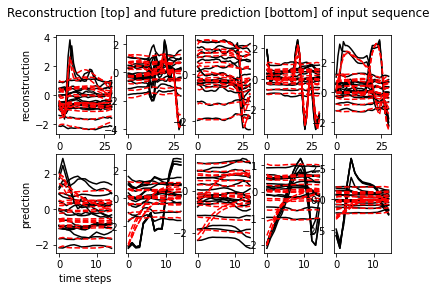

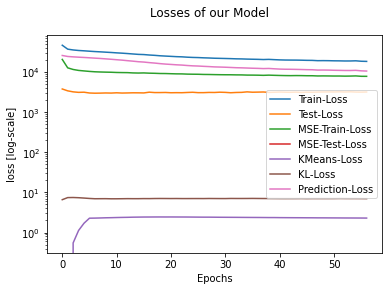

In [4]:
# Evaluate the network

vame.evaluate_model(config)

In [5]:
%%time
# Segment behavior

# vame.behavior_segmentation(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=[30])
vame.pose_segmentation(config)

Pose segmentation for VAME model: VAME 



 17%|█████████████████████████████████▏                                                                                                                                                                 | 43/253 [00:00<00:00, 421.82it/s]

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti
Load model... 
Embedd latent vector for file 08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured


 12%|████████████████████████▍                                                                                                                                                                          | 46/368 [00:00<00:00, 458.37it/s]

Embedd latent vector for file 08_07_2020_17_03_26_miniscope_DG_200617_b_succ


 14%|███████████████████████████▎                                                                                                                                                                       | 59/421 [00:00<00:00, 513.34it/s]

Embedd latent vector for file 03_31_2021_09_45_11_miniscope_DG_210202_a_succ


 12%|██████████████████████▌                                                                                                                                                                            | 30/259 [00:00<00:00, 297.15it/s]

Embedd latent vector for file 08_16_2020_16_27_15_miniscope_DG_200617_b_succ


  3%|█████▊                                                                                                                                                                                            | 45/1514 [00:00<00:03, 393.33it/s]

Embedd latent vector for file 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai


  0%|                                                                                                                                                                                                             | 0/313 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_25_10_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_09_2019_15_08_33_miniscope_MM_191108_a_succ


  7%|█████████████▌                                                                                                                                                                                     | 40/573 [00:00<00:01, 397.15it/s]

Embedd latent vector for file 12_07_2019_15_52_11_miniscope_MM_191108_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 464.14it/s]

Embedd latent vector for file 08_12_2020_16_30_56_miniscope_DG_200617_b_succ



  1%|█▋                                                                                                                                                                                                | 48/5389 [00:00<00:11, 473.28it/s]

Embedd latent vector for file 12_03_2019_16_20_45_miniscope_MM_191106_a_fail_nomini


 39%|███████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 42/108 [00:00<00:00, 414.05it/s]

Embedd latent vector for file 09_08_2020_15_26_21_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 411.77it/s]


Embedd latent vector for file 09_06_2020_15_31_55_miniscope_DG_200617_b_succ


  8%|███████████████▊                                                                                                                                                                                   | 51/629 [00:00<00:01, 471.00it/s]

Embedd latent vector for file 09_08_2020_15_54_36_miniscope_DG_200617_b_succ
Embedd latent vector for file 03_02_2020_16_20_39_miniscope_MM_200129_b_succ


  1%|██▎                                                                                                                                                                                               | 42/3613 [00:00<00:08, 410.25it/s]

Embedd latent vector for file 11_25_2019_15_43_30_miniscope_MM_191107_a_fail_nomini


 48%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 45/93 [00:00<00:00, 442.38it/s]

Embedd latent vector for file 08_14_2020_15_17_30_miniscope_DG_200701_a_succ_injured


 16%|███████████████████████████████▌                                                                                                                                                                   | 45/278 [00:00<00:00, 446.63it/s]

Embedd latent vector for file 12_10_2019_16_36_38_miniscope_MM_191106_a_succ_nomini


 14%|███████████████████████████▎                                                                                                                                                                       | 41/293 [00:00<00:00, 409.98it/s]

Embedd latent vector for file 08_08_2020_15_27_33_miniscope_DG_200701_a_succ


 14%|██████████████████████████▊                                                                                                                                                                        | 42/305 [00:00<00:00, 390.17it/s]

Embedd latent vector for file 12_09_2019_16_46_19_miniscope_MM_191106_a_succ_nomini


 28%|██████████████████████████████████████████████████████▎                                                                                                                                            | 54/194 [00:00<00:00, 454.81it/s]

Embedd latent vector for file 08_07_2020_16_28_48_miniscope_DG_200701_a_succ


  1%|█▎                                                                                                                                                                                                | 34/4832 [00:00<00:14, 333.80it/s]

Embedd latent vector for file 11_29_2019_14_25_32_miniscope_MM_191105_a_fail_nomini


  5%|█████████▉                                                                                                                                                                                         | 39/767 [00:00<00:01, 389.63it/s]

Embedd latent vector for file 11_13_2019_18_04_22_miniscope_DG_190806_a_succ_nofluo


 13%|██████████████████████████▏                                                                                                                                                                        | 39/291 [00:00<00:00, 389.46it/s]

Embedd latent vector for file 08_21_2020_16_28_13_miniscope_DG_200617_b_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 448.11it/s]


Embedd latent vector for file 08_29_2020_16_01_17_miniscope_DG_200701_a_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 94/199 [00:00<00:00, 448.21it/s]

Embedd latent vector for file 09_08_2020_15_23_32_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_10_2020_17_20_19_miniscope_DG_200617_b_succ


 20%|██████████████████████████████████████▊                                                                                                                                                            | 31/156 [00:00<00:00, 309.68it/s]

Embedd latent vector for file 08_11_2020_16_06_06_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/591 [00:00<?, ?it/s]

Embedd latent vector for file 03_12_2020_16_49_07_miniscope_MM_200129_b_succ
Embedd latent vector for file 12_04_2019_16_53_11_miniscope_MM_191105_a_succ_nomini


  3%|█████▏                                                                                                                                                                                            | 43/1626 [00:00<00:03, 426.66it/s]

Embedd latent vector for file 03_25_2021_09_45_37_miniscope_DG_210202_a_fail_nonres_attempts


 18%|██████████████████████████████████▏                                                                                                                                                                | 38/217 [00:00<00:00, 376.75it/s]

Embedd latent vector for file 08_21_2020_16_18_56_miniscope_DG_200617_b_succ


  6%|████████████▎                                                                                                                                                                                      | 37/586 [00:00<00:01, 362.78it/s]

Embedd latent vector for file 08_06_2020_18_30_31_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                            | 0/4837 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_16_03_21_miniscope_DG_200701_a_succ
Embedd latent vector for file 12_02_2019_17_52_21_miniscope_MM_191108_a_fail_nomini


 13%|█████████████████████████▏                                                                                                                                                                         | 36/279 [00:00<00:00, 352.65it/s]

Embedd latent vector for file 12_12_2019_15_04_45_miniscope_MM_191108_a_succ


 29%|████████████████████████████████████████████████████████▊                                                                                                                                          | 46/158 [00:00<00:00, 459.38it/s]

Embedd latent vector for file 08_13_2020_16_17_47_miniscope_DG_200617_b_succ


 21%|████████████████████████████████████████▋                                                                                                                                                          | 44/211 [00:00<00:00, 439.09it/s]

Embedd latent vector for file 12_09_2019_15_16_05_miniscope_MM_191108_a_succ


 15%|█████████████████████████████▍                                                                                                                                                                     | 40/265 [00:00<00:00, 393.84it/s]

Embedd latent vector for file 08_14_2020_15_50_50_miniscope_DG_200617_b_succ


 29%|████████████████████████████████████████████████████████▎                                                                                                                                          | 41/142 [00:00<00:00, 400.93it/s]

Embedd latent vector for file 09_01_2020_16_47_10_miniscope_DG_200617_b_succ


 33%|███████████████████████████████████████████████████████████████▌                                                                                                                                   | 43/132 [00:00<00:00, 419.55it/s]

Embedd latent vector for file 08_15_2020_15_54_28_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 476.40it/s]

Embedd latent vector for file 09_07_2020_14_42_14_miniscope_DG_200701_a_succ_injured



 14%|███████████████████████████▍                                                                                                                                                                       | 48/341 [00:00<00:00, 479.00it/s]

Embedd latent vector for file 08_15_2020_16_16_11_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_07_2020_16_43_52_miniscope_DG_200617_b_succ


  7%|█████████████                                                                                                                                                                                      | 41/614 [00:00<00:01, 382.56it/s]

Embedd latent vector for file 12_04_2019_16_07_38_miniscope_MM_191108_a_succ_nomini


  1%|██▋                                                                                                                                                                                               | 47/3454 [00:00<00:07, 469.28it/s]

Embedd latent vector for file 11_25_2019_15_28_57_miniscope_MM_191106_a_fail_nomini


 27%|█████████████████████████████████████████████████████                                                                                                                                              | 56/206 [00:00<00:00, 559.06it/s]

Embedd latent vector for file 08_14_2020_15_09_52_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/145 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_15_53_35_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 09_06_2020_15_14_12_miniscope_DG_200701_a_succ


 22%|███████████████████████████████████████████▊                                                                                                                                                       | 49/218 [00:00<00:00, 486.45it/s]

Embedd latent vector for file 11_12_2019_17_10_51_miniscope_DG_190810_a_succ_nomini


  0%|                                                                                                                                                                                                             | 0/188 [00:00<?, ?it/s]

Embedd latent vector for file 09_02_2020_17_32_19_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_07_2020_17_13_15_miniscope_DG_200617_b_succ


 44%|██████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 60/136 [00:00<00:00, 595.52it/s]

Embedd latent vector for file 03_11_2020_16_37_26_miniscope_MM_200129_b_succ


  5%|██████████▎                                                                                                                                                                                        | 49/931 [00:00<00:01, 486.94it/s]

Embedd latent vector for file 08_07_2020_16_05_16_miniscope_DG_200701_a_succ


 25%|█████████████████████████████████████████████████                                                                                                                                                  | 39/155 [00:00<00:00, 387.63it/s]

Embedd latent vector for file 03_02_2020_15_59_15_miniscope_MM_200129_a_succ


 45%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                          | 50/110 [00:00<00:00, 488.21it/s]

Embedd latent vector for file 08_15_2020_16_02_16_miniscope_DG_200701_a_succ


 43%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                                              | 54/125 [00:00<00:00, 467.92it/s]

Embedd latent vector for file 09_01_2020_16_29_24_miniscope_DG_200617_b_succ


  3%|█████▌                                                                                                                                                                                            | 47/1622 [00:00<00:03, 469.85it/s]

Embedd latent vector for file 12_12_2019_15_18_57_miniscope_MM_191108_a_fail


 31%|████████████████████████████████████████████████████████████▊                                                                                                                                      | 53/170 [00:00<00:00, 495.47it/s]

Embedd latent vector for file 08_10_2020_17_13_00_miniscope_DG_200617_b_succ


  2%|██▉                                                                                                                                                                                               | 37/2435 [00:00<00:06, 362.56it/s]

Embedd latent vector for file 03_29_2021_09_56_46_miniscope_DG_210202_a_succ


  8%|███████████████▋                                                                                                                                                                                   | 29/360 [00:00<00:01, 289.88it/s]

Embedd latent vector for file 09_02_2020_16_45_55_miniscope_DG_200701_a_succ


  3%|█████▉                                                                                                                                                                                            | 34/1103 [00:00<00:03, 338.66it/s]

Embedd latent vector for file 11_12_2019_17_02_59_miniscope_DG_190810_a_succ_nomini


 27%|█████████████████████████████████████████████████████▍                                                                                                                                             | 43/157 [00:00<00:00, 425.32it/s]

Embedd latent vector for file 08_12_2020_16_17_05_miniscope_DG_200617_b_succ


  5%|█████████                                                                                                                                                                                          | 43/931 [00:00<00:02, 419.55it/s]

Embedd latent vector for file 08_06_2020_17_58_44_miniscope_DG_200701_a_succ


 22%|██████████████████████████████████████████▋                                                                                                                                                        | 48/219 [00:00<00:00, 431.96it/s]

Embedd latent vector for file 08_16_2020_15_39_22_miniscope_DG_200701_a_succ


  5%|█████████                                                                                                                                                                                         | 48/1021 [00:00<00:02, 477.01it/s]

Embedd latent vector for file 03_25_2021_09_52_28_miniscope_DG_210202_a_fail_nonres_attempts


 25%|████████████████████████████████████████████████▏                                                                                                                                                  | 40/162 [00:00<00:00, 395.19it/s]

Embedd latent vector for file 08_16_2020_15_43_35_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/188 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_03_49_miniscope_DG_200701_a_succ_nomini
Embedd latent vector for file 08_15_2020_15_41_21_miniscope_DG_200701_a_succ


 28%|█████████████████████████████████████████████████████▋                                                                                                                                             | 46/167 [00:00<00:00, 456.67it/s]

Embedd latent vector for file 09_07_2020_14_45_29_miniscope_DG_200701_a_succ


 26%|██████████████████████████████████████████████████▍                                                                                                                                                | 61/236 [00:00<00:00, 599.64it/s]

Embedd latent vector for file 12_07_2019_15_39_33_miniscope_MM_191108_a_succ


  0%|                                                                                                                                                                                                             | 0/278 [00:00<?, ?it/s]

Embedd latent vector for file 08_20_2020_16_23_32_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_04_2019_15_23_56_miniscope_MM_191106_a_succ_nomini


 47%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 34/73 [00:00<00:00, 336.70it/s]

Embedd latent vector for file 09_03_2020_16_31_10_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/340 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_15_59_18_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_07_2020_16_13_27_miniscope_DG_200701_a_succ


 11%|████████████████████▍                                                                                                                                                                              | 33/314 [00:00<00:00, 323.35it/s]

Embedd latent vector for file 12_12_2019_15_08_15_miniscope_MM_191108_a_succ


 22%|██████████████████████████████████████████▋                                                                                                                                                        | 47/215 [00:00<00:00, 429.94it/s]

Embedd latent vector for file 03_10_2020_15_48_48_miniscope_MM_200129_a_succ


 34%|█████████████████████████████████████████████████████████████████▌                                                                                                                                 | 40/119 [00:00<00:00, 397.21it/s]

Embedd latent vector for file 08_13_2020_15_39_43_miniscope_DG_200701_a_succ_movecam


  3%|██████▌                                                                                                                                                                                           | 46/1351 [00:00<00:02, 456.25it/s]

Embedd latent vector for file 08_05_2020_15_29_56_miniscope_DG_200701_a_succ


 19%|█████████████████████████████████████▌                                                                                                                                                             | 45/234 [00:00<00:00, 449.57it/s]

Embedd latent vector for file 08_06_2020_18_42_09_miniscope_DG_200617_b_succ


 46%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                         | 41/89 [00:00<00:00, 405.13it/s]

Embedd latent vector for file 08_12_2020_16_02_32_miniscope_DG_200617_b_succ


 16%|████████████████████████████████                                                                                                                                                                   | 41/249 [00:00<00:00, 407.77it/s]

Embedd latent vector for file 08_19_2020_16_01_41_miniscope_DG_200701_a_succ


  5%|██████████▍                                                                                                                                                                                        | 51/952 [00:00<00:01, 505.27it/s]

Embedd latent vector for file 03_31_2021_09_26_57_miniscope_DG_210202_a_succ


  0%|                                                                                                                                                                                                             | 0/329 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_15_44_45_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_09_2019_17_01_33_miniscope_MM_191107_a_succ_bad_track_nomini


 33%|█████████████████████████████████████████████████████████████████                                                                                                                                  | 45/135 [00:00<00:00, 443.42it/s]

Embedd latent vector for file 08_15_2020_16_31_30_miniscope_DG_200617_b_succ_nofluo


 24%|███████████████████████████████████████████████▋                                                                                                                                                   | 34/139 [00:00<00:00, 338.50it/s]

Embedd latent vector for file 08_07_2020_16_39_29_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/112 [00:00<?, ?it/s]

Embedd latent vector for file 08_16_2020_16_04_28_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_29_2020_16_15_31_miniscope_DG_200701_a_succ


 17%|█████████████████████████████████▎                                                                                                                                                                 | 34/199 [00:00<00:00, 337.93it/s]

Embedd latent vector for file 08_21_2020_16_24_35_miniscope_DG_200617_b_succ


 29%|████████████████████████████████████████████████████████▊                                                                                                                                          | 37/127 [00:00<00:00, 367.75it/s]

Embedd latent vector for file 11_25_2019_16_28_56_miniscope_MM_191108_a_fail_nomini


 21%|█████████████████████████████████████████▏                                                                                                                                                         | 34/161 [00:00<00:00, 336.46it/s]

Embedd latent vector for file 08_19_2020_16_11_32_miniscope_DG_200701_a_succ_injured


  1%|██▍                                                                                                                                                                                               | 48/3885 [00:00<00:08, 477.66it/s]

Embedd latent vector for file 11_25_2019_15_09_04_miniscope_MM_191106_a_fail_nomini


 27%|████████████████████████████████████████████████████▌                                                                                                                                              | 41/152 [00:00<00:00, 407.97it/s]

Embedd latent vector for file 08_15_2020_16_18_50_miniscope_DG_200617_b_succ


 16%|███████████████████████████████▉                                                                                                                                                                   | 36/220 [00:00<00:00, 358.26it/s]

Embedd latent vector for file 08_15_2020_15_58_47_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/523 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_15_59_37_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_08_2020_16_18_51_miniscope_DG_200617_b_succ


  9%|████████████████▋                                                                                                                                                                                  | 36/421 [00:00<00:01, 358.36it/s]

Embedd latent vector for file 08_09_2020_16_17_40_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/218 [00:00<?, ?it/s]

Embedd latent vector for file 09_02_2020_17_35_23_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_09_2019_15_34_10_miniscope_MM_191108_a_succ


  9%|██████████████████                                                                                                                                                                                 | 39/422 [00:00<00:00, 385.44it/s]

Embedd latent vector for file 12_07_2019_15_11_16_miniscope_MM_191108_a_succ


 32%|██████████████████████████████████████████████████████████████                                                                                                                                     | 43/135 [00:00<00:00, 427.78it/s]

Embedd latent vector for file 08_12_2020_15_39_17_miniscope_DG_200701_a_succ


 17%|██████████████████████████████████                                                                                                                                                                 | 39/223 [00:00<00:00, 387.76it/s]

Embedd latent vector for file 09_02_2020_17_17_37_miniscope_DG_200617_b_succ


 16%|███████████████████████████████▋                                                                                                                                                                   | 46/283 [00:00<00:00, 451.37it/s]

Embedd latent vector for file 12_04_2019_15_19_29_miniscope_MM_191106_a_succ_nomini


  1%|█▋                                                                                                                                                                                                | 33/3725 [00:00<00:11, 327.97it/s]

Embedd latent vector for file 11_25_2019_14_47_40_miniscope_MM_191105_a_fail_nomini


  4%|████████▋                                                                                                                                                                                          | 38/855 [00:00<00:02, 377.70it/s]

Embedd latent vector for file 12_12_2019_15_11_45_miniscope_MM_191108_a_fail


 21%|████████████████████████████████████████▍                                                                                                                                                          | 46/222 [00:00<00:00, 448.55it/s]

Embedd latent vector for file 09_02_2020_17_21_30_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_30_2020_16_10_58_miniscope_DG_200617_b_succ_injured


 20%|██████████████████████████████████████▋                                                                                                                                                            | 50/252 [00:00<00:00, 491.73it/s]

Embedd latent vector for file 08_14_2020_15_57_32_miniscope_DG_200617_b_succ


  2%|███▊                                                                                                                                                                                              | 45/2322 [00:00<00:05, 406.12it/s]

Embedd latent vector for file 12_06_2019_14_55_56_miniscope_MM_191106_a_succ_nomini


 20%|███████████████████████████████████████▌                                                                                                                                                           | 39/192 [00:00<00:00, 384.04it/s]

Embedd latent vector for file 12_07_2019_16_29_31_miniscope_MM_191107_a_succ_nomini


 18%|██████████████████████████████████▉                                                                                                                                                                | 39/218 [00:00<00:00, 384.32it/s]

Embedd latent vector for file 08_18_2020_16_41_33_miniscope_DG_200617_b_succ


 24%|███████████████████████████████████████████████▏                                                                                                                                                   | 59/244 [00:00<00:00, 567.83it/s]

Embedd latent vector for file 08_15_2020_16_05_59_miniscope_DG_200701_a_succ


 31%|█████████████████████████████████████████████████████████████▍                                                                                                                                     | 40/127 [00:00<00:00, 400.00it/s]

Embedd latent vector for file 08_14_2020_15_07_03_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▋                                                                                                                                                               | 55/301 [00:00<00:00, 539.54it/s]

Embedd latent vector for file 03_11_2020_16_42_47_miniscope_MM_200129_b_succ


  1%|█▋                                                                                                                                                                                                | 44/5017 [00:00<00:11, 439.61it/s]

Embedd latent vector for file 03_26_2021_08_53_20_miniscope_DG_210202_a_fail_nonres_attempts


 14%|██████████████████████████▌                                                                                                                                                                        | 42/309 [00:00<00:00, 415.87it/s]

Embedd latent vector for file 08_12_2020_15_47_44_miniscope_DG_200701_a_succ


  2%|████▏                                                                                                                                                                                             | 39/1782 [00:00<00:04, 368.16it/s]

Embedd latent vector for file 12_04_2019_16_27_21_miniscope_MM_191108_a_succ_nomini


  8%|██████████████▉                                                                                                                                                                                    | 48/629 [00:00<00:01, 475.03it/s]

Embedd latent vector for file 08_06_2020_17_33_37_miniscope_DG_200701_a_succ


 20%|███████████████████████████████████████▋                                                                                                                                                           | 34/167 [00:00<00:00, 323.93it/s]

Embedd latent vector for file 08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon


 16%|███████████████████████████████▊                                                                                                                                                                   | 46/282 [00:00<00:00, 446.17it/s]

Embedd latent vector for file 08_29_2020_15_55_24_miniscope_DG_200701_a_succ


  2%|██▉                                                                                                                                                                                               | 51/3326 [00:00<00:06, 488.16it/s]

Embedd latent vector for file 11_25_2019_15_49_41_miniscope_MM_191107_a_fail_nomini


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 385.20it/s]

Embedd latent vector for file 09_04_2020_17_07_37_miniscope_DG_200617_b_succ_injured



 10%|████████████████████▏                                                                                                                                                                              | 53/513 [00:00<00:00, 472.07it/s]

Embedd latent vector for file 04_02_2021_10_21_22_miniscope_DG_210202_a_succ


 31%|████████████████████████████████████████████████████████████▎                                                                                                                                      | 39/126 [00:00<00:00, 374.87it/s]

Embedd latent vector for file 03_12_2020_16_56_04_miniscope_MM_200129_b_succ


  3%|██████▋                                                                                                                                                                                           | 48/1388 [00:00<00:02, 475.02it/s]

Embedd latent vector for file 11_12_2019_16_50_34_miniscope_DG_190806_a_succ_nofluo


  4%|███████▋                                                                                                                                                                                           | 39/983 [00:00<00:02, 343.76it/s]

Embedd latent vector for file 11_14_2019_17_19_46_miniscope_DG_190806_a_succ_nofluo


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 41/76 [00:00<00:00, 403.11it/s]

Embedd latent vector for file 08_11_2020_15_31_17_miniscope_DG_200701_a_succ_injured


 21%|█████████████████████████████████████████▊                                                                                                                                                         | 41/191 [00:00<00:00, 379.72it/s]

Embedd latent vector for file 03_31_2021_09_35_52_miniscope_DG_210202_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 374.37it/s]

Embedd latent vector for file 08_30_2020_15_47_33_miniscope_DG_200701_a_succ_injured



 25%|████████████████████████████████████████████████▏                                                                                                                                                  | 44/178 [00:00<00:00, 439.06it/s]

Embedd latent vector for file 08_31_2020_15_54_51_miniscope_DG_200701_a_succ


 31%|███████████████████████████████████████████████████████████▋                                                                                                                                       | 37/121 [00:00<00:00, 369.29it/s]

Embedd latent vector for file 09_08_2020_15_32_30_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/130 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_15_59_34_miniscope_DG_200701_a_succ


 15%|██████████████████████████████                                                                                                                                                                     | 31/201 [00:00<00:00, 305.13it/s]

Embedd latent vector for file 12_06_2019_14_15_39_miniscope_MM_191105_a_succ_nomini


 30%|██████████████████████████████████████████████████████████▋                                                                                                                                        | 53/176 [00:00<00:00, 527.58it/s]

Embedd latent vector for file 03_11_2020_16_52_20_miniscope_MM_200129_b_succ


 23%|█████████████████████████████████████████████▍                                                                                                                                                     | 44/189 [00:00<00:00, 438.14it/s]

Embedd latent vector for file 08_31_2020_16_36_15_miniscope_DG_200617_b_succ


 13%|████████████████████████▋                                                                                                                                                                          | 46/363 [00:00<00:00, 432.89it/s]

Embedd latent vector for file 03_04_2020_15_37_26_miniscope_MM_200129_a_succ


 17%|████████████████████████████████▉                                                                                                                                                                  | 43/255 [00:00<00:00, 425.93it/s]

Embedd latent vector for file 09_07_2020_14_51_32_miniscope_DG_200701_a_succ


 12%|██████████████████████▍                                                                                                                                                                            | 46/400 [00:00<00:00, 455.58it/s]

Embedd latent vector for file 03_06_2020_16_17_02_miniscope_MM_200129_b_succ


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                  | 43/86 [00:00<00:00, 426.14it/s]

Embedd latent vector for file 08_16_2020_15_52_46_miniscope_DG_200701_a_succ


 36%|█████████████████████████████████████████████████████████████████████▊                                                                                                                             | 48/134 [00:00<00:00, 452.94it/s]

Embedd latent vector for file 08_16_2020_16_18_28_miniscope_DG_200617_b_succ


 38%|█████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 43/114 [00:00<00:00, 399.84it/s]

Embedd latent vector for file 08_12_2020_16_12_08_miniscope_DG_200617_b_succ


 30%|███████████████████████████████████████████████████████████▏                                                                                                                                       | 41/135 [00:00<00:00, 403.03it/s]

Embedd latent vector for file 08_19_2020_15_51_39_miniscope_DG_200701_a_succ_injured


  6%|████████████▋                                                                                                                                                                                      | 41/633 [00:00<00:01, 402.13it/s]

Embedd latent vector for file 08_06_2020_17_41_32_miniscope_DG_200701_a_succ


 26%|█████████████████████████████████████████████████▊                                                                                                                                                 | 37/145 [00:00<00:00, 358.89it/s]

Embedd latent vector for file 08_13_2020_15_59_37_miniscope_DG_200701_a_succ


 38%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                          | 35/93 [00:00<00:00, 345.16it/s]

Embedd latent vector for file 08_12_2020_15_51_54_miniscope_DG_200701_a_succ


  1%|█▊                                                                                                                                                                                                | 46/4844 [00:00<00:10, 455.57it/s]

Embedd latent vector for file 11_29_2019_16_02_26_miniscope_MM_191108_a_fail_nomini


  1%|█▌                                                                                                                                                                                                | 46/5509 [00:00<00:11, 456.31it/s]

Embedd latent vector for file 12_02_2019_16_58_55_miniscope_MM_191106_a_fail_nomini


  2%|████▊                                                                                                                                                                                             | 39/1567 [00:00<00:03, 386.49it/s]

Embedd latent vector for file 12_02_2019_17_26_56_miniscope_MM_191107_a_succ_nomini


 17%|█████████████████████████████████▌                                                                                                                                                                 | 40/232 [00:00<00:00, 394.91it/s]

Embedd latent vector for file 08_10_2020_16_56_35_miniscope_DG_200701_a_succ_injured


 46%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                         | 56/122 [00:00<00:00, 505.17it/s]

Embedd latent vector for file 08_30_2020_16_20_40_miniscope_DG_200617_b_succ


 10%|██████████████████▉                                                                                                                                                                                | 47/483 [00:00<00:00, 468.02it/s]

Embedd latent vector for file 04_01_2021_09_43_29_miniscope_DG_210202_a_succ


  6%|███████████▋                                                                                                                                                                                       | 52/865 [00:00<00:01, 510.07it/s]

Embedd latent vector for file 12_09_2019_16_49_50_miniscope_MM_191106_a_succ_nomini


 35%|███████████████████████████████████████████████████████████████████▉                                                                                                                               | 39/112 [00:00<00:00, 387.17it/s]

Embedd latent vector for file 09_08_2020_15_36_13_miniscope_DG_200617_b_succ_injured


 31%|████████████████████████████████████████████████████████████                                                                                                                                       | 44/143 [00:00<00:00, 435.82it/s]

Embedd latent vector for file 09_05_2020_16_30_05_miniscope_DG_200617_b_succ_injured


 31%|█████████████████████████████████████████████████████████████▎                                                                                                                                     | 44/140 [00:00<00:00, 437.68it/s]

Embedd latent vector for file 09_05_2020_16_12_58_miniscope_DG_200617_b_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 61/129 [00:00<00:00, 558.44it/s]

Embedd latent vector for file 08_21_2020_16_33_02_miniscope_DG_200617_b_succ


  9%|██████████████████▌                                                                                                                                                                                | 47/495 [00:00<00:00, 463.35it/s]

Embedd latent vector for file 11_12_2019_17_07_21_miniscope_DG_190810_a_succ_nomini


 19%|████████████████████████████████████▍                                                                                                                                                              | 54/289 [00:00<00:00, 474.18it/s]

Embedd latent vector for file 03_11_2020_16_14_11_miniscope_MM_200129_a_succ


  9%|█████████████████                                                                                                                                                                                  | 30/343 [00:00<00:01, 297.08it/s]

Embedd latent vector for file 08_19_2020_16_44_52_miniscope_DG_200617_b_succ


 21%|████████████████████████████████████████▌                                                                                                                                                          | 41/197 [00:00<00:00, 402.25it/s]

Embedd latent vector for file 08_29_2020_16_50_48_miniscope_DG_200617_b_succ


 35%|███████████████████████████████████████████████████████████████████▌                                                                                                                               | 43/124 [00:00<00:00, 425.11it/s]

Embedd latent vector for file 09_05_2020_16_19_09_miniscope_DG_200617_b_succ


 27%|████████████████████████████████████████████████████▏                                                                                                                                              | 42/157 [00:00<00:00, 410.34it/s]

Embedd latent vector for file 08_20_2020_16_27_00_miniscope_DG_200617_b_succ


 43%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                                               | 39/90 [00:00<00:00, 387.17it/s]

Embedd latent vector for file 08_31_2020_16_32_34_miniscope_DG_200617_b_succ


 17%|█████████████████████████████████▊                                                                                                                                                                 | 53/306 [00:00<00:00, 526.15it/s]

Embedd latent vector for file 12_06_2019_14_00_21_miniscope_MM_191105_a_succ_nomini


 19%|████████████████████████████████████▊                                                                                                                                                              | 47/249 [00:00<00:00, 466.59it/s]

Embedd latent vector for file 08_14_2020_15_28_27_miniscope_DG_200701_a_succ


 25%|████████████████████████████████████████████████▏                                                                                                                                                  | 48/194 [00:00<00:00, 471.85it/s]

Embedd latent vector for file 12_06_2019_14_07_11_miniscope_MM_191105_a_succ_nomini


  2%|████                                                                                                                                                                                              | 47/2249 [00:00<00:04, 462.02it/s]

Embedd latent vector for file 11_25_2019_15_58_05_miniscope_MM_191107_a_fail_nomini


  1%|█▉                                                                                                                                                                                                | 41/3992 [00:00<00:09, 404.48it/s]

Embedd latent vector for file 08_19_2020_16_16_55_miniscope_DG_200701_a_succ_noncon


  1%|█▌                                                                                                                                                                                                | 33/4147 [00:00<00:12, 321.24it/s]

Embedd latent vector for file 11_25_2019_15_15_55_miniscope_MM_191106_a_fail_nomini


 10%|███████████████████▎                                                                                                                                                                               | 40/405 [00:00<00:00, 392.95it/s]

Embedd latent vector for file 12_09_2019_16_34_39_miniscope_MM_191105_a_succ_nomini


 27%|████████████████████████████████████████████████████▊                                                                                                                                              | 36/133 [00:00<00:00, 347.70it/s]

Embedd latent vector for file 04_01_2021_09_35_49_miniscope_DG_210202_a_succ


 35%|████████████████████████████████████████████████████████████████████▍                                                                                                                              | 40/114 [00:00<00:00, 395.04it/s]

Embedd latent vector for file 09_01_2020_16_20_52_miniscope_DG_200701_a_succ


 38%|███████████████████████████████████████████████████████████████████████████                                                                                                                         | 36/94 [00:00<00:00, 357.34it/s]

Embedd latent vector for file 09_03_2020_16_40_53_miniscope_DG_200617_b_succ


 14%|██████████████████████████▍                                                                                                                                                                        | 38/280 [00:00<00:00, 379.27it/s]

Embedd latent vector for file 08_13_2020_16_35_25_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████▍                                                                                                                                                        | 42/193 [00:00<00:00, 412.18it/s]

Embedd latent vector for file 09_05_2020_16_09_14_miniscope_DG_200617_b_succ


 10%|███████████████████                                                                                                                                                                                | 31/317 [00:00<00:00, 309.83it/s]

Embedd latent vector for file 08_10_2020_16_38_11_miniscope_DG_200701_a_succ


 21%|█████████████████████████████████████████                                                                                                                                                          | 48/228 [00:00<00:00, 473.17it/s]

Embedd latent vector for file 12_06_2019_15_13_44_miniscope_MM_191107_a_succ_nomini


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 495.07it/s]

Embedd latent vector for file 09_04_2020_16_35_52_miniscope_DG_200701_a_succ



 44%|█████████████████████████████████████████████████████████████████████████████████████                                                                                                              | 55/126 [00:00<00:00, 517.60it/s]

Embedd latent vector for file 09_08_2020_15_10_07_miniscope_DG_200701_a_succ


  3%|██████▍                                                                                                                                                                                           | 59/1776 [00:00<00:02, 572.88it/s]

Embedd latent vector for file 11_11_2019_22_56_57_miniscope_DG_190806_a_succ_nofluo


 47%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                                        | 31/66 [00:00<00:00, 302.78it/s]

Embedd latent vector for file 08_17_2020_16_19_31_miniscope_DG_200617_b_succ


 23%|████████████████████████████████████████████▋                                                                                                                                                      | 50/218 [00:00<00:00, 442.78it/s]

Embedd latent vector for file 08_19_2020_16_33_11_miniscope_DG_200617_b_succ_injured


  0%|                                                                                                                                                                                                             | 0/280 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_11_37_miniscope_DG_200701_a_succ
Embedd latent vector for file 12_12_2019_15_00_56_miniscope_MM_191108_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 418.41it/s]

Embedd latent vector for file 12_09_2019_16_41_05_miniscope_MM_191105_a_succ_nomini



  3%|█████▏                                                                                                                                                                                            | 31/1155 [00:00<00:03, 306.76it/s]

Embedd latent vector for file 08_05_2020_16_06_18_miniscope_DG_200617_b_succ_earlystop


 15%|█████████████████████████████▊                                                                                                                                                                     | 50/327 [00:00<00:00, 432.98it/s]

Embedd latent vector for file 08_06_2020_18_53_34_miniscope_DG_200617_b_succ


 37%|████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 48/129 [00:00<00:00, 473.33it/s]

Embedd latent vector for file 09_04_2020_17_17_48_miniscope_DG_200617_b_succ


  1%|█▉                                                                                                                                                                                                | 44/4397 [00:00<00:10, 433.06it/s]

Embedd latent vector for file 11_29_2019_15_16_19_miniscope_MM_191107_a_fail_nomini


  0%|                                                                                                                                                                                                            | 0/1093 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_28_50_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_07_2019_15_06_28_miniscope_MM_191108_a_succ


 16%|███████████████████████████████▋                                                                                                                                                                   | 51/314 [00:00<00:00, 502.16it/s]

Embedd latent vector for file 03_05_2020_15_56_12_miniscope_MM_200129_b_succ


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 50/95 [00:00<00:00, 498.55it/s]

Embedd latent vector for file 03_12_2020_16_25_39_miniscope_MM_200129_a_succ


 10%|███████████████████▌                                                                                                                                                                               | 41/409 [00:00<00:00, 409.18it/s]

Embedd latent vector for file 12_09_2019_15_04_06_miniscope_MM_191108_a_succ


 14%|████████████████████████████▏                                                                                                                                                                      | 40/277 [00:00<00:00, 396.83it/s]

Embedd latent vector for file 08_14_2020_15_47_26_miniscope_DG_200617_b_succ_injured


 16%|███████████████████████████████▏                                                                                                                                                                   | 34/213 [00:00<00:00, 295.57it/s]

Embedd latent vector for file 08_29_2020_16_33_45_miniscope_DG_200617_b_succ


 45%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                           | 54/120 [00:00<00:00, 532.43it/s]

Embedd latent vector for file 08_13_2020_15_36_29_miniscope_DG_200701_a_succ


 16%|███████████████████████████████▌                                                                                                                                                                   | 45/278 [00:00<00:00, 417.19it/s]

Embedd latent vector for file 12_07_2019_16_34_28_miniscope_MM_191107_a_succ_nomini


 28%|███████████████████████████████████████████████████████▎                                                                                                                                           | 53/187 [00:00<00:00, 457.37it/s]

Embedd latent vector for file 03_10_2020_16_09_06_miniscope_MM_200129_b_succ


 28%|███████████████████████████████████████████████████████                                                                                                                                            | 85/301 [00:00<00:00, 422.41it/s]

Embedd latent vector for file 08_14_2020_15_23_43_miniscope_DG_200701_a_succ


 17%|█████████████████████████████████▊                                                                                                                                                                 | 33/190 [00:00<00:00, 328.94it/s]

Embedd latent vector for file 08_18_2020_16_08_29_miniscope_DG_200701_a_succ


 25%|███████████████████████████████████████████████▊                                                                                                                                                   | 38/155 [00:00<00:00, 379.16it/s]

Embedd latent vector for file 08_17_2020_16_12_24_miniscope_DG_200617_b_succ


 42%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                                                | 51/120 [00:00<00:00, 507.33it/s]

Embedd latent vector for file 03_12_2020_16_23_09_miniscope_MM_200129_a_succ


  6%|███████████▋                                                                                                                                                                                       | 37/615 [00:00<00:01, 367.62it/s]

Embedd latent vector for file 08_14_2020_15_44_42_miniscope_DG_200617_b_succ


 41%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                   | 90/220 [00:00<00:00, 434.83it/s]

Embedd latent vector for file 08_19_2020_15_58_22_miniscope_DG_200701_a_succ


 13%|████████████████████████▉                                                                                                                                                                          | 46/360 [00:00<00:00, 450.81it/s]

Embedd latent vector for file 08_18_2020_16_31_06_miniscope_DG_200617_b_succ


  1%|█▍                                                                                                                                                                                                | 39/5113 [00:00<00:13, 384.47it/s]

Embedd latent vector for file 11_29_2019_14_50_39_miniscope_MM_191106_a_fail_nomini


 25%|████████████████████████████████████████████████▍                                                                                                                                                  | 41/165 [00:00<00:00, 403.36it/s]

Embedd latent vector for file 08_10_2020_16_34_57_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▌                                                                                                                                                               | 48/263 [00:00<00:00, 474.81it/s]

Embedd latent vector for file 09_03_2020_16_36_15_miniscope_DG_200617_b_succ


 35%|███████████████████████████████████████████████████████████████████▍                                                                                                                               | 56/162 [00:00<00:00, 489.02it/s]

Embedd latent vector for file 08_15_2020_16_12_31_miniscope_DG_200617_b_succ


 15%|████████████████████████████▋                                                                                                                                                                      | 36/245 [00:00<00:00, 348.00it/s]

Embedd latent vector for file 08_16_2020_15_46_53_miniscope_DG_200701_a_succ


  4%|████████▏                                                                                                                                                                                         | 51/1205 [00:00<00:02, 508.26it/s]

Embedd latent vector for file 03_29_2021_09_43_54_miniscope_DG_210202_a_succ


 37%|████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 44/118 [00:00<00:00, 420.76it/s]

Embedd latent vector for file 08_18_2020_16_28_42_miniscope_DG_200617_b_succ


 41%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 42/102 [00:00<00:00, 413.54it/s]

Embedd latent vector for file 09_01_2020_16_07_13_miniscope_DG_200701_a_succ


 25%|█████████████████████████████████████████████████▏                                                                                                                                                 | 58/230 [00:00<00:00, 569.59it/s]

Embedd latent vector for file 08_16_2020_16_09_31_miniscope_DG_200617_b_succ


  3%|██████▋                                                                                                                                                                                           | 58/1689 [00:00<00:02, 579.57it/s]

Embedd latent vector for file 11_12_2019_16_41_32_miniscope_DG_190806_a_succ_nofluobadtrigger


  0%|                                                                                                                                                                                                             | 0/370 [00:00<?, ?it/s]

Embedd latent vector for file 09_04_2020_17_00_52_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_04_2019_15_29_28_miniscope_MM_191106_a_succ_nomini


  1%|██▋                                                                                                                                                                                               | 49/3499 [00:00<00:07, 451.35it/s]

Embedd latent vector for file 11_26_2019_15_52_26_miniscope_MM_191106_a_fail_nomini


  0%|                                                                                                                                                                                                              | 0/77 [00:00<?, ?it/s]

Embedd latent vector for file 09_03_2020_16_24_34_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_10_2019_16_48_14_miniscope_MM_191107_a_succ_nomini


 31%|█████████████████████████████████████████████████████████████▎                                                                                                                                     | 44/140 [00:00<00:00, 434.99it/s]

Embedd latent vector for file 08_30_2020_15_50_51_miniscope_DG_200701_a_succ


  1%|██▎                                                                                                                                                                                               | 47/4019 [00:00<00:09, 407.93it/s]

Embedd latent vector for file 11_29_2019_14_03_19_miniscope_MM_191105_a_fail_nomini


  1%|██                                                                                                                                                                                                | 38/3678 [00:00<00:09, 379.05it/s]

Embedd latent vector for file 11_29_2019_15_49_40_miniscope_MM_191108_a_fail_nomini


 48%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 36/75 [00:00<00:00, 354.29it/s]

Embedd latent vector for file 08_18_2020_15_54_55_miniscope_DG_200701_a_succ


 35%|████████████████████████████████████████████████████████████████████▊                                                                                                                              | 48/136 [00:00<00:00, 476.40it/s]

Embedd latent vector for file 09_06_2020_15_47_33_miniscope_DG_200617_b_succ_injured


 41%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                                   | 44/108 [00:00<00:00, 439.69it/s]

Embedd latent vector for file 08_18_2020_16_25_33_miniscope_DG_200617_b_succ


  1%|██                                                                                                                                                                                                | 53/5022 [00:00<00:09, 519.91it/s]

Embedd latent vector for file 03_25_2021_09_29_46_miniscope_DG_210202_a_fail_nonres_attempts


  2%|████▎                                                                                                                                                                                             | 59/2625 [00:00<00:04, 585.65it/s]

Embedd latent vector for file 03_30_2021_09_51_19_miniscope_DG_210202_a_succ


  1%|██▎                                                                                                                                                                                               | 57/4869 [00:00<00:08, 565.86it/s]

Embedd latent vector for file 11_26_2019_17_00_05_miniscope_MM_191108_a_fail_nomini


 17%|████████████████████████████████▏                                                                                                                                                                  | 39/236 [00:00<00:00, 383.38it/s]

Embedd latent vector for file 08_16_2020_16_13_04_miniscope_DG_200617_b_succ


 13%|█████████████████████████▍                                                                                                                                                                         | 40/307 [00:00<00:00, 397.10it/s]

Embedd latent vector for file 03_13_2020_13_44_46_miniscope_MM_200129_b_succ


 13%|█████████████████████████▌                                                                                                                                                                         | 39/297 [00:00<00:00, 387.18it/s]

Embedd latent vector for file 08_30_2020_15_56_29_miniscope_DG_200701_a_succ


  2%|████▌                                                                                                                                                                                             | 41/1765 [00:00<00:04, 403.05it/s]

Embedd latent vector for file 08_08_2020_15_38_09_miniscope_DG_200701_a_succ_injured


 16%|██████████████████████████████▍                                                                                                                                                                    | 43/275 [00:00<00:00, 424.20it/s]

Embedd latent vector for file 04_02_2021_10_25_41_miniscope_DG_210202_a_succ


  4%|███████▏                                                                                                                                                                                          | 41/1114 [00:00<00:02, 407.03it/s]

Embedd latent vector for file 03_04_2020_16_05_47_miniscope_MM_200129_b_succ


 28%|██████████████████████████████████████████████████████▍                                                                                                                                            | 41/147 [00:00<00:00, 403.54it/s]

Embedd latent vector for file 12_07_2019_16_38_08_miniscope_MM_191107_a_succ_nomini


 17%|████████████████████████████████▋                                                                                                                                                                  | 39/233 [00:00<00:00, 389.51it/s]

Embedd latent vector for file 12_10_2019_15_35_36_miniscope_MM_191108_a_succ


 24%|███████████████████████████████████████████████▋                                                                                                                                                   | 43/176 [00:00<00:00, 418.22it/s]

Embedd latent vector for file 08_17_2020_15_38_44_miniscope_DG_200701_a_succ


 43%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                                               | 32/74 [00:00<00:00, 318.61it/s]

Embedd latent vector for file 08_21_2020_16_08_48_miniscope_DG_200617_b_succ


 40%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                                    | 49/121 [00:00<00:00, 467.10it/s]

Embedd latent vector for file 08_09_2020_14_53_16_miniscope_DG_200701_a_succ


  1%|█▌                                                                                                                                                                                                | 33/3971 [00:00<00:12, 325.26it/s]

Embedd latent vector for file 03_02_2020_16_09_51_miniscope_MM_200129_b_fail


 29%|█████████████████████████████████████████████████████████▏                                                                                                                                         | 32/109 [00:00<00:00, 318.88it/s]

Embedd latent vector for file 09_05_2020_15_52_46_miniscope_DG_200701_a_succ


 34%|██████████████████████████████████████████████████████████████████                                                                                                                                 | 41/121 [00:00<00:00, 409.84it/s]

Embedd latent vector for file 09_02_2020_16_30_27_miniscope_DG_200701_a_succ_injured


  3%|██████▌                                                                                                                                                                                           | 44/1291 [00:00<00:02, 434.65it/s]

Embedd latent vector for file 08_08_2020_15_33_57_miniscope_DG_200701_a_succ_injured_noncon


  1%|██▏                                                                                                                                                                                               | 45/3974 [00:00<00:09, 425.51it/s]

Embedd latent vector for file 11_11_2019_23_23_16_miniscope_DG_190810_a_fail_nomini


  1%|█▋                                                                                                                                                                                                | 41/4831 [00:00<00:11, 405.52it/s]

Embedd latent vector for file 12_02_2019_16_27_33_miniscope_MM_191105_a_fail_nomini


 26%|███████████████████████████████████████████████████▌                                                                                                                                               | 32/121 [00:00<00:00, 315.79it/s]

Embedd latent vector for file 09_06_2020_14_55_10_miniscope_DG_200701_a_succ_injured


  0%|                                                                                                                                                                                                             | 0/128 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_35_22_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_31_2020_16_01_53_miniscope_DG_200701_a_succ


  1%|██                                                                                                                                                                                                | 42/3948 [00:00<00:09, 415.57it/s]

Embedd latent vector for file 11_11_2019_00_54_37_miniscope_DG_190806_a_fail_nomini


 45%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                           | 43/95 [00:00<00:00, 422.72it/s]

Embedd latent vector for file 08_19_2020_16_50_11_miniscope_DG_200617_b_succ


  3%|█████                                                                                                                                                                                             | 36/1371 [00:00<00:03, 347.08it/s]

Embedd latent vector for file 03_02_2020_16_29_48_miniscope_MM_200129_b_succ


 27%|████████████████████████████████████████████████████▍                                                                                                                                              | 46/171 [00:00<00:00, 456.65it/s]

Embedd latent vector for file 08_19_2020_16_09_08_miniscope_DG_200701_a_succ


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 55/98 [00:00<00:00, 535.41it/s]

Embedd latent vector for file 09_07_2020_14_48_19_miniscope_DG_200701_a_succ


  2%|███▌                                                                                                                                                                                              | 42/2269 [00:00<00:05, 415.48it/s]

Embedd latent vector for file 08_05_2020_15_22_44_miniscope_DG_200701_a_succ


 19%|████████████████████████████████████▋                                                                                                                                                              | 51/271 [00:00<00:00, 501.34it/s]

Embedd latent vector for file 08_21_2020_15_32_26_miniscope_DG_200701_a_succ


 16%|███████████████████████████████▌                                                                                                                                                                   | 42/260 [00:00<00:00, 412.86it/s]

Embedd latent vector for file 03_06_2020_16_00_37_miniscope_MM_200129_a_succ


 23%|█████████████████████████████████████████████                                                                                                                                                      | 43/186 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 03_13_2020_13_49_34_miniscope_MM_200129_b_succ


  7%|█████████████▊                                                                                                                                                                                     | 41/581 [00:00<00:01, 399.12it/s]

Embedd latent vector for file 04_02_2021_10_34_47_miniscope_DG_210202_a_succ


  2%|███                                                                                                                                                                                               | 43/2767 [00:00<00:06, 422.69it/s]

Embedd latent vector for file 11_11_2019_00_41_27_miniscope_DG_190806_a_fail_nomini


  6%|███████████▍                                                                                                                                                                                       | 42/719 [00:00<00:01, 413.04it/s]

Embedd latent vector for file 08_05_2020_15_36_29_miniscope_DG_200701_a_succ


 11%|██████████████████████▏                                                                                                                                                                            | 47/412 [00:00<00:00, 458.50it/s]

Embedd latent vector for file 12_07_2019_15_47_28_miniscope_MM_191108_a_succ


  1%|█▌                                                                                                                                                                                                | 41/4923 [00:00<00:12, 405.14it/s]

Embedd latent vector for file 12_02_2019_16_05_42_miniscope_MM_191105_a_fail_nomini


 32%|█████████████████████████████████████████████████████████████▉                                                                                                                                      | 30/95 [00:00<00:00, 282.64it/s]

Embedd latent vector for file 12_07_2019_16_23_23_miniscope_MM_191106_a_succ_nomini


  1%|██                                                                                                                                                                                                | 42/3925 [00:00<00:09, 410.93it/s]

Embedd latent vector for file 12_02_2019_17_08_58_miniscope_MM_191107_a_succ_nomini


  0%|                                                                                                                                                                                                             | 0/141 [00:00<?, ?it/s]

Embedd latent vector for file 08_10_2020_17_33_00_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_11_2020_16_10_57_miniscope_DG_200617_b_succ


 21%|█████████████████████████████████████████▏                                                                                                                                                         | 48/227 [00:00<00:00, 479.27it/s]

Embedd latent vector for file 12_11_2019_17_01_21_miniscope_MM_191108_a_succ


  2%|███▋                                                                                                                                                                                              | 36/1907 [00:00<00:05, 352.86it/s]

Embedd latent vector for file 03_30_2021_09_41_12_miniscope_DG_210202_a_succ


  7%|█████████████▉                                                                                                                                                                                     | 44/618 [00:00<00:01, 433.91it/s]

Embedd latent vector for file 04_02_2021_10_30_38_miniscope_DG_210202_a_succ


 17%|████████████████████████████████▊                                                                                                                                                                  | 49/291 [00:00<00:00, 477.52it/s]

Embedd latent vector for file 04_01_2021_09_55_30_miniscope_DG_210202_a_succ


 26%|███████████████████████████████████████████████████▏                                                                                                                                               | 48/183 [00:00<00:00, 415.68it/s]

Embedd latent vector for file 09_02_2020_17_13_08_miniscope_DG_200617_b_succ


 15%|████████████████████████████▎                                                                                                                                                                      | 33/227 [00:00<00:00, 327.56it/s]

Embedd latent vector for file 08_20_2020_16_43_39_miniscope_DG_200617_b_succ_injured


  7%|█████████████▏                                                                                                                                                                                     | 47/697 [00:00<00:01, 462.41it/s]

Embedd latent vector for file 08_06_2020_17_37_15_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 425.65it/s]

Embedd latent vector for file 08_19_2020_15_55_28_miniscope_DG_200701_a_succ_injured



  7%|██████████████▏                                                                                                                                                                                    | 54/745 [00:00<00:01, 465.64it/s]

Embedd latent vector for file 08_06_2020_18_24_41_miniscope_DG_200617_b_succ


  1%|█▋                                                                                                                                                                                                | 42/4703 [00:00<00:11, 418.20it/s]

Embedd latent vector for file 11_29_2019_15_42_19_miniscope_MM_191108_a_fail_nomini


 42%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                                                | 43/102 [00:00<00:00, 426.88it/s]

Embedd latent vector for file 09_05_2020_16_16_21_miniscope_DG_200617_b_succ


  2%|███                                                                                                                                                                                               | 42/2617 [00:00<00:06, 412.86it/s]

Embedd latent vector for file 03_25_2021_09_36_59_miniscope_DG_210202_a_fail_nonres_attempts


 40%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                                     | 41/103 [00:00<00:00, 407.02it/s]

Embedd latent vector for file 08_31_2020_15_46_43_miniscope_DG_200701_a_succ


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 53/97 [00:00<00:00, 521.00it/s]

Embedd latent vector for file 08_31_2020_16_05_52_miniscope_DG_200701_a_succ


 28%|█████████████████████████████████████████████████████▋                                                                                                                                             | 41/149 [00:00<00:00, 403.04it/s]

Embedd latent vector for file 08_31_2020_16_10_12_miniscope_DG_200701_a_succ


  5%|██████████▌                                                                                                                                                                                        | 43/796 [00:00<00:01, 426.88it/s]

Embedd latent vector for file 03_31_2021_09_38_46_miniscope_DG_210202_a_succ


 11%|█████████████████████▉                                                                                                                                                                             | 38/338 [00:00<00:00, 366.36it/s]

Embedd latent vector for file 12_07_2019_16_18_20_miniscope_MM_191106_a_succ_nomini


 21%|█████████████████████████████████████████▊                                                                                                                                                         | 50/233 [00:00<00:00, 491.52it/s]

Embedd latent vector for file 03_06_2020_16_20_40_miniscope_MM_200129_b_succ


 30%|██████████████████████████████████████████████████████████▎                                                                                                                                        | 49/164 [00:00<00:00, 481.67it/s]

Embedd latent vector for file 12_16_2019_16_31_08_miniscope_MM_191108_a_succ


 39%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                      | 54/137 [00:00<00:00, 531.39it/s]

Embedd latent vector for file 09_08_2020_15_39_45_miniscope_DG_200617_b_succ


 14%|███████████████████████████▋                                                                                                                                                                       | 39/275 [00:00<00:00, 388.93it/s]

Embedd latent vector for file 08_30_2020_16_28_07_miniscope_DG_200617_b_succ
Embedd latent vector for file 11_14_2019_17_46_42_miniscope_DG_190810_a_succ_nomini


  9%|████████████████▊                                                                                                                                                                                  | 41/477 [00:00<00:01, 403.04it/s]

Embedd latent vector for file 12_03_2019_15_52_44_miniscope_MM_191107_a_succ_nomini


  7%|██████████████▎                                                                                                                                                                                    | 36/491 [00:00<00:01, 353.89it/s]

Embedd latent vector for file 12_10_2019_15_19_56_miniscope_MM_191108_a_succ


  8%|████████████████                                                                                                                                                                                   | 48/582 [00:00<00:01, 471.85it/s]

Embedd latent vector for file 08_08_2020_16_08_14_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/310 [00:00<?, ?it/s]

Embedd latent vector for file 08_30_2020_16_14_23_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_19_2020_16_27_02_miniscope_DG_200617_b_succ


 39%|████████████████████████████████████████████████████████████████████████████▌                                                                                                                      | 55/140 [00:00<00:00, 546.22it/s]

Embedd latent vector for file 08_08_2020_16_15_39_miniscope_DG_200617_b_succ


 11%|██████████████████████▎                                                                                                                                                                            | 46/403 [00:00<00:00, 456.51it/s]

Embedd latent vector for file 08_07_2020_16_57_16_miniscope_DG_200617_b_succ


 13%|█████████████████████████▉                                                                                                                                                                         | 39/293 [00:00<00:00, 389.94it/s]

Embedd latent vector for file 08_29_2020_16_42_06_miniscope_DG_200617_b_succ


  1%|██▎                                                                                                                                                                                               | 52/4253 [00:00<00:08, 517.61it/s]

Embedd latent vector for file 11_29_2019_14_36_52_miniscope_MM_191106_a_fail_nomini


  1%|█▉                                                                                                                                                                                                | 44/4359 [00:00<00:10, 423.88it/s]

Embedd latent vector for file 11_11_2019_23_07_55_miniscope_DG_190806_a_fail_nofluo


  0%|                                                                                                                                                                                                             | 0/133 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_38_32_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_03_2020_16_09_44_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/242 [00:00<?, ?it/s]

Embedd latent vector for file 08_15_2020_16_28_36_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 08_11_2020_15_12_33_miniscope_DG_200701_a_succ


 23%|█████████████████████████████████████████████▎                                                                                                                                                     | 50/215 [00:00<00:00, 465.17it/s]

Embedd latent vector for file 08_10_2020_17_04_35_miniscope_DG_200617_b_succ


 14%|███████████████████████████▎                                                                                                                                                                       | 44/314 [00:00<00:00, 427.79it/s]

Embedd latent vector for file 12_07_2019_15_29_41_miniscope_MM_191108_a_succ


 17%|█████████████████████████████████▍                                                                                                                                                                 | 41/239 [00:00<00:00, 381.97it/s]

Embedd latent vector for file 08_29_2020_16_04_30_miniscope_DG_200701_a_succ


  6%|████████████▎                                                                                                                                                                                      | 44/695 [00:00<00:01, 429.05it/s]

Embedd latent vector for file 03_31_2021_09_23_53_miniscope_DG_210202_a_succ


 24%|███████████████████████████████████████████████▏                                                                                                                                                   | 46/190 [00:00<00:00, 455.15it/s]

Embedd latent vector for file 09_07_2020_15_23_07_miniscope_DG_200617_b_succ


 13%|██████████████████████████▎                                                                                                                                                                        | 40/297 [00:00<00:00, 394.45it/s]

Embedd latent vector for file 03_05_2020_15_46_40_miniscope_MM_200129_a_succ


  1%|█▌                                                                                                                                                                                                | 36/4631 [00:00<00:12, 358.58it/s]

Embedd latent vector for file 11_26_2019_16_32_30_miniscope_MM_191107_a_fail_nomini


 16%|██████████████████████████████▌                                                                                                                                                                    | 39/249 [00:00<00:00, 387.10it/s]

Embedd latent vector for file 12_10_2019_15_15_08_miniscope_MM_191108_a_succ


  4%|████████▏                                                                                                                                                                                          | 40/957 [00:00<00:02, 392.70it/s]

Embedd latent vector for file 03_02_2020_15_41_21_miniscope_MM_200129_a_succ_nomini


  1%|██▎                                                                                                                                                                                               | 52/4372 [00:00<00:09, 464.90it/s]

Embedd latent vector for file 11_29_2019_14_57_47_miniscope_MM_191106_a_fail_nomini


 17%|████████████████████████████████▎                                                                                                                                                                  | 41/247 [00:00<00:00, 408.89it/s]

Embedd latent vector for file 12_04_2019_16_44_23_miniscope_MM_191105_a_succ_nomini


 13%|█████████████████████████▊                                                                                                                                                                         | 37/280 [00:00<00:00, 366.11it/s]

Embedd latent vector for file 08_18_2020_16_45_57_miniscope_DG_200617_b_succ


 27%|████████████████████████████████████████████████████▎                                                                                                                                              | 33/123 [00:00<00:00, 325.46it/s]

Embedd latent vector for file 03_12_2020_16_52_33_miniscope_MM_200129_b_succ


 35%|████████████████████████████████████████████████████████████████████▍                                                                                                                              | 40/114 [00:00<00:00, 392.31it/s]

Embedd latent vector for file 03_10_2020_15_56_24_miniscope_MM_200129_a_succ


 14%|███████████████████████████▋                                                                                                                                                                       | 47/331 [00:00<00:00, 464.57it/s]

Embedd latent vector for file 12_10_2019_15_05_17_miniscope_MM_191108_a_succ


 38%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                        | 46/121 [00:00<00:00, 446.33it/s]

Embedd latent vector for file 09_01_2020_16_58_35_miniscope_DG_200617_b_succ_injured


 38%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                         | 51/135 [00:00<00:00, 502.62it/s]

Embedd latent vector for file 08_18_2020_16_34_54_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/101 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_15_25_00_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_04_2020_17_11_33_miniscope_DG_200617_b_succ


 24%|██████████████████████████████████████████████▊                                                                                                                                                    | 49/204 [00:00<00:00, 475.64it/s]

Embedd latent vector for file 08_18_2020_16_15_09_miniscope_DG_200701_a_succ


  7%|█████████████▉                                                                                                                                                                                     | 39/544 [00:00<00:01, 382.77it/s]

Embedd latent vector for file 08_08_2020_16_00_22_miniscope_DG_200617_b_succ


 16%|███████████████████████████████                                                                                                                                                                    | 38/239 [00:00<00:00, 377.63it/s]

Embedd latent vector for file 08_17_2020_16_22_44_miniscope_DG_200617_b_succ_injured


 42%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                                                 | 42/100 [00:00<00:00, 419.65it/s]

Embedd latent vector for file 09_06_2020_15_09_11_miniscope_DG_200701_a_succ


  3%|████▉                                                                                                                                                                                             | 43/1671 [00:00<00:03, 428.20it/s]

Embedd latent vector for file 11_11_2019_23_43_13_miniscope_DG_190810_a_succ_nomini


 34%|███████████████████████████████████████████████████████████████████                                                                                                                                | 44/128 [00:00<00:00, 435.26it/s]

Embedd latent vector for file 09_01_2020_16_10_27_miniscope_DG_200701_a_succ


 38%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                         | 44/116 [00:00<00:00, 385.03it/s]

Embedd latent vector for file 08_20_2020_15_48_39_miniscope_DG_200701_a_succ


  6%|███████████▎                                                                                                                                                                                       | 51/884 [00:00<00:01, 504.87it/s]

Embedd latent vector for file 12_04_2019_16_13_30_miniscope_MM_191108_a_succ_nomini


  1%|█▋                                                                                                                                                                                                | 40/4623 [00:00<00:11, 394.16it/s]

Embedd latent vector for file 11_25_2019_14_55_06_miniscope_MM_191105_a_fail_nomini


 24%|███████████████████████████████████████████████▎                                                                                                                                                   | 41/169 [00:00<00:00, 400.75it/s]

Embedd latent vector for file 12_09_2019_16_53_42_miniscope_MM_191106_a_succ_nomini


 19%|█████████████████████████████████████▍                                                                                                                                                             | 48/250 [00:00<00:00, 444.28it/s]

Embedd latent vector for file 08_29_2020_16_08_29_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/199 [00:00<?, ?it/s]

Embedd latent vector for file 09_07_2020_15_26_46_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_06_2019_14_47_35_miniscope_MM_191106_a_succ_nomini


  7%|█████████████▉                                                                                                                                                                                     | 49/687 [00:00<00:01, 484.20it/s]

Embedd latent vector for file 12_10_2019_15_43_20_miniscope_MM_191108_a_fail


 28%|███████████████████████████████████████████████████████▌                                                                                                                                           | 43/151 [00:00<00:00, 425.55it/s]

Embedd latent vector for file 08_16_2020_16_15_42_miniscope_DG_200617_b_succ


  3%|██████▋                                                                                                                                                                                           | 42/1211 [00:00<00:02, 418.48it/s]

Embedd latent vector for file 12_03_2019_15_24_04_miniscope_MM_191105_a_succ_nomini


 16%|██████████████████████████████▋                                                                                                                                                                    | 36/229 [00:00<00:00, 359.90it/s]

Embedd latent vector for file 08_19_2020_16_55_33_miniscope_DG_200617_b_succ


 23%|████████████████████████████████████████████▌                                                                                                                                                      | 32/140 [00:00<00:00, 309.19it/s]

Embedd latent vector for file 08_20_2020_15_54_48_miniscope_DG_200701_a_succ


 34%|██████████████████████████████████████████████████████████████████▋                                                                                                                                | 52/152 [00:00<00:00, 509.85it/s]

Embedd latent vector for file 03_29_2021_09_17_07_miniscope_DG_210202_a_succ


 16%|██████████████████████████████▎                                                                                                                                                                    | 44/283 [00:00<00:00, 433.48it/s]

Embedd latent vector for file 12_04_2019_16_01_30_miniscope_MM_191107_a_succ_nomini


 10%|████████████████████                                                                                                                                                                               | 50/485 [00:00<00:00, 497.68it/s]

Embedd latent vector for file 08_08_2020_15_24_06_miniscope_DG_200701_a_succ


  3%|█████▊                                                                                                                                                                                            | 49/1653 [00:00<00:03, 479.84it/s]

Embedd latent vector for file 12_07_2019_15_56_10_miniscope_MM_191108_a_fail


 30%|██████████████████████████████████████████████████████████▎                                                                                                                                        | 44/147 [00:00<00:00, 426.82it/s]

Embedd latent vector for file 12_07_2019_16_09_54_miniscope_MM_191105_a_succ_nomini


 46%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                         | 46/99 [00:00<00:00, 455.61it/s]

Embedd latent vector for file 09_02_2020_16_53_10_miniscope_DG_200701_a_succ


  7%|██████████████                                                                                                                                                                                     | 51/707 [00:00<00:01, 449.25it/s]

Embedd latent vector for file 08_12_2020_15_35_36_miniscope_DG_200701_a_succ


 40%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 59/148 [00:00<00:00, 577.27it/s]

Embedd latent vector for file 08_15_2020_16_25_08_miniscope_DG_200617_b_succ_injured


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 580.93it/s]

Embedd latent vector for file 09_03_2020_16_21_39_miniscope_DG_200617_b_succ



 23%|█████████████████████████████████████████████▎                                                                                                                                                     | 56/241 [00:00<00:00, 543.48it/s]

Embedd latent vector for file 08_12_2020_16_24_56_miniscope_DG_200617_b_succ


  1%|██▌                                                                                                                                                                                               | 45/3368 [00:00<00:07, 447.56it/s]

Embedd latent vector for file 03_24_2021_13_52_36_miniscope_DG_210202_a_fail_nonres


 16%|██████████████████████████████▌                                                                                                                                                                    | 43/274 [00:00<00:00, 416.41it/s]

Embedd latent vector for file 03_10_2020_15_52_35_miniscope_MM_200129_a_succ


 15%|████████████████████████████▉                                                                                                                                                                      | 39/263 [00:00<00:00, 385.85it/s]

Embedd latent vector for file 08_11_2020_15_56_40_miniscope_DG_200617_b_succ


 18%|██████████████████████████████████▊                                                                                                                                                                | 52/291 [00:00<00:00, 516.75it/s]

Embedd latent vector for file 12_09_2019_15_12_24_miniscope_MM_191108_a_succ


 16%|████████████████████████████████                                                                                                                                                                   | 42/255 [00:00<00:00, 412.11it/s]

Embedd latent vector for file 12_03_2019_15_57_28_miniscope_MM_191107_a_succ_nomini


 47%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 47/101 [00:00<00:00, 463.98it/s]

Embedd latent vector for file 03_12_2020_16_32_46_miniscope_MM_200129_a_succ


 22%|██████████████████████████████████████████▌                                                                                                                                                        | 38/174 [00:00<00:00, 370.01it/s]

Embedd latent vector for file 08_10_2020_17_24_14_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████                                                                                                                                                         | 41/190 [00:00<00:00, 403.95it/s]

Embedd latent vector for file 08_20_2020_16_18_53_miniscope_DG_200617_b_succ


  4%|███████▌                                                                                                                                                                                           | 32/819 [00:00<00:02, 316.69it/s]

Embedd latent vector for file 03_31_2021_09_19_18_miniscope_DG_210202_a_succ


 28%|███████████████████████████████████████████████████████                                                                                                                                            | 50/177 [00:00<00:00, 442.43it/s]

Embedd latent vector for file 12_04_2019_15_52_05_miniscope_MM_191107_a_succ_nomini


  1%|█▉                                                                                                                                                                                                | 40/4046 [00:00<00:10, 396.39it/s]

Embedd latent vector for file 11_25_2019_14_38_45_miniscope_MM_191105_a_fail_nomini


  8%|███████████████▍                                                                                                                                                                                   | 44/557 [00:00<00:01, 420.17it/s]

Embedd latent vector for file 12_04_2019_16_39_29_miniscope_MM_191105_a_succ_nomini


  0%|                                                                                                                                                                                                             | 0/316 [00:00<?, ?it/s]

Embedd latent vector for file 08_16_2020_16_07_07_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_08_2020_16_29_56_miniscope_DG_200617_b_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 445.64it/s]

Embedd latent vector for file 08_16_2020_15_35_26_miniscope_DG_200701_a_succ



 10%|███████████████████▊                                                                                                                                                                               | 49/481 [00:00<00:00, 481.04it/s]

Embedd latent vector for file 04_01_2021_09_59_45_miniscope_DG_210202_a_succ_injured


 37%|███████████████████████████████████████████████████████████████████████▎                                                                                                                           | 45/123 [00:00<00:00, 394.32it/s]

Embedd latent vector for file 09_08_2020_15_13_51_miniscope_DG_200701_a_succ


  1%|█▋                                                                                                                                                                                                | 43/5062 [00:00<00:11, 425.95it/s]

Embedd latent vector for file 12_02_2019_16_45_51_miniscope_MM_191106_a_fail_nomini


 15%|█████████████████████████████▎                                                                                                                                                                     | 39/260 [00:00<00:00, 389.10it/s]

Embedd latent vector for file 08_09_2020_16_08_16_miniscope_DG_200617_b_succ


 11%|█████████████████████▊                                                                                                                                                                             | 41/367 [00:00<00:00, 407.62it/s]

Embedd latent vector for file 08_07_2020_17_08_34_miniscope_DG_200617_b_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<00:00, 436.97it/s]

Embedd latent vector for file 09_02_2020_17_27_37_miniscope_DG_200617_b_succ



  1%|██▏                                                                                                                                                                                               | 57/5045 [00:00<00:08, 564.08it/s]

Embedd latent vector for file 12_03_2019_15_00_53_miniscope_MM_191105_a_fail_nomini


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 52/90 [00:00<00:00, 518.68it/s]

Embedd latent vector for file 08_18_2020_15_59_09_miniscope_DG_200701_a_succ


 25%|███████████████████████████████████████████████▉                                                                                                                                                   | 42/171 [00:00<00:00, 412.64it/s]

Embedd latent vector for file 08_17_2020_16_01_03_miniscope_DG_200617_b_succ


  5%|█████████▎                                                                                                                                                                                         | 42/881 [00:00<00:02, 416.47it/s]

Embedd latent vector for file 11_11_2019_23_35_36_miniscope_DG_190810_a_succ_nomini


 29%|████████████████████████████████████████████████████████▎                                                                                                                                          | 43/149 [00:00<00:00, 425.23it/s]

Embedd latent vector for file 08_17_2020_15_36_48_miniscope_DG_200701_a_succ


  7%|██████████████                                                                                                                                                                                     | 40/555 [00:00<00:01, 393.39it/s]

Embedd latent vector for file 04_01_2021_09_47_53_miniscope_DG_210202_a_succ


  2%|███▌                                                                                                                                                                                              | 36/1976 [00:00<00:05, 346.91it/s]

Embedd latent vector for file 08_05_2020_16_20_09_miniscope_DG_200617_b_succ


  1%|██                                                                                                                                                                                                | 39/3710 [00:00<00:09, 387.68it/s]

Embedd latent vector for file 12_03_2019_15_15_55_miniscope_MM_191105_a_succ_nomini


 25%|█████████████████████████████████████████████████▎                                                                                                                                                 | 42/166 [00:00<00:00, 409.34it/s]

Embedd latent vector for file 03_10_2020_16_17_45_miniscope_MM_200129_b_succ


 36%|█████████████████████████████████████████████████████████████████████▊                                                                                                                             | 39/109 [00:00<00:00, 385.80it/s]

Embedd latent vector for file 09_06_2020_15_43_13_miniscope_DG_200617_b_succ


 43%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                              | 40/92 [00:00<00:00, 398.36it/s]

Embedd latent vector for file 09_02_2020_16_37_35_miniscope_DG_200701_a_succ


 17%|████████████████████████████████▊                                                                                                                                                                  | 38/226 [00:00<00:00, 364.51it/s]

Embedd latent vector for file 08_10_2020_16_31_43_miniscope_DG_200701_a_succ


 24%|███████████████████████████████████████████████                                                                                                                                                    | 36/149 [00:00<00:00, 357.85it/s]

Embedd latent vector for file 11_14_2019_17_50_12_miniscope_DG_190810_a_succ_nomini


  7%|██████████████▏                                                                                                                                                                                    | 42/579 [00:00<00:01, 407.18it/s]

Embedd latent vector for file 04_01_2021_09_31_49_miniscope_DG_210202_a_succ_grabbedcable


 28%|██████████████████████████████████████████████████████▎                                                                                                                                            | 56/201 [00:00<00:00, 549.68it/s]

Embedd latent vector for file 08_15_2020_15_45_13_miniscope_DG_200701_a_succ


 24%|███████████████████████████████████████████████                                                                                                                                                    | 35/145 [00:00<00:00, 346.88it/s]

Embedd latent vector for file 09_03_2020_16_03_07_miniscope_DG_200701_a_succ


 20%|███████████████████████████████████████                                                                                                                                                            | 44/220 [00:00<00:00, 434.00it/s]

Embedd latent vector for file 08_16_2020_15_50_17_miniscope_DG_200701_a_succ


  1%|█▉                                                                                                                                                                                                | 50/4903 [00:00<00:10, 471.07it/s]

Embedd latent vector for file 08_06_2020_17_47_03_miniscope_DG_200701_a_fail


 10%|██████████████████▋                                                                                                                                                                                | 37/385 [00:00<00:00, 367.32it/s]

Embedd latent vector for file 12_03_2019_16_03_45_miniscope_MM_191107_a_succ_nomini


 20%|███████████████████████████████████████                                                                                                                                                            | 38/190 [00:00<00:00, 373.48it/s]

Embedd latent vector for file 08_09_2020_15_51_40_miniscope_DG_200701_a_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 46/97 [00:00<00:00, 452.23it/s]

Embedd latent vector for file 08_15_2020_15_49_06_miniscope_DG_200701_a_succ


 10%|██████████████████▌                                                                                                                                                                                | 44/461 [00:00<00:00, 439.67it/s]

Embedd latent vector for file 11_29_2019_14_09_23_miniscope_MM_191105_a_fail_nomini


 27%|████████████████████████████████████████████████████▋                                                                                                                                              | 43/159 [00:00<00:00, 424.13it/s]

Embedd latent vector for file 08_21_2020_15_48_23_miniscope_DG_200701_a_succ


 17%|█████████████████████████████████▉                                                                                                                                                                 | 52/299 [00:00<00:00, 464.04it/s]

Embedd latent vector for file 12_06_2019_15_04_44_miniscope_MM_191107_a_succ_nomini


 24%|███████████████████████████████████████████████▎                                                                                                                                                   | 57/235 [00:00<00:00, 567.03it/s]

Embedd latent vector for file 08_06_2020_18_50_24_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████▉                                                                                                                                                        | 41/186 [00:00<00:00, 407.10it/s]

Embedd latent vector for file 09_04_2020_16_43_01_miniscope_DG_200701_a_succ


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 81/126 [00:00<00:00, 407.23it/s]

Embedd latent vector for file 08_12_2020_15_32_21_miniscope_DG_200701_a_succ_injured


  7%|████████████▉                                                                                                                                                                                      | 40/604 [00:00<00:01, 397.20it/s]

Embedd latent vector for file 11_13_2019_18_08_16_miniscope_DG_190806_a_succ_nofluo


  4%|████████▌                                                                                                                                                                                          | 42/955 [00:00<00:02, 400.94it/s]

Embedd latent vector for file 04_01_2021_09_38_38_miniscope_DG_210202_a_succ


  9%|█████████████████▉                                                                                                                                                                                 | 38/412 [00:00<00:00, 375.72it/s]

Embedd latent vector for file 08_07_2020_16_08_55_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▉                                                                                                                                                               | 55/298 [00:00<00:00, 545.25it/s]

Embedd latent vector for file 08_07_2020_16_01_27_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 439.40it/s]

Embedd latent vector for file 08_11_2020_15_33_47_miniscope_DG_200701_a_succ



 23%|████████████████████████████████████████████▏                                                                                                                                                      | 43/190 [00:00<00:00, 428.89it/s]

Embedd latent vector for file 09_06_2020_15_05_22_miniscope_DG_200701_a_succ


  1%|█▋                                                                                                                                                                                                | 51/5713 [00:00<00:11, 504.29it/s]

Embedd latent vector for file 12_02_2019_16_13_23_miniscope_MM_191105_a_fail_nomini


 14%|██████████████████████████▋                                                                                                                                                                        | 42/307 [00:00<00:00, 405.54it/s]

Embedd latent vector for file 08_10_2020_16_48_58_miniscope_DG_200701_a_succ


  1%|██                                                                                                                                                                                                | 45/4252 [00:00<00:09, 449.84it/s]

Embedd latent vector for file 11_26_2019_16_54_02_miniscope_MM_191108_a_fail_nomini


 26%|█████████████████████████████████████████████████▊                                                                                                                                                 | 34/133 [00:00<00:00, 335.06it/s]

Embedd latent vector for file 08_14_2020_15_34_20_miniscope_DG_200617_b_succ_injured


 39%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                       | 45/116 [00:00<00:00, 446.10it/s]

Embedd latent vector for file 08_29_2020_16_46_00_miniscope_DG_200617_b_succ


 11%|█████████████████████▏                                                                                                                                                                             | 44/404 [00:00<00:00, 436.97it/s]

Embedd latent vector for file 08_06_2020_18_07_32_miniscope_DG_200701_a_succ


 16%|██████████████████████████████▍                                                                                                                                                                    | 36/231 [00:00<00:00, 359.24it/s]

Embedd latent vector for file 09_04_2020_16_46_11_miniscope_DG_200701_a_succ_distractedbytrash


 28%|█████████████████████████████████████████████████████▉                                                                                                                                             | 47/170 [00:00<00:00, 466.44it/s]

Embedd latent vector for file 08_19_2020_16_35_29_miniscope_DG_200617_b_succ_injured


 28%|█████████████████████████████████████████████████████▊                                                                                                                                             | 48/174 [00:00<00:00, 470.65it/s]

Embedd latent vector for file 12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini


 47%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 47/99 [00:00<00:00, 462.47it/s]

Embedd latent vector for file 09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured


 10%|███████████████████▉                                                                                                                                                                               | 44/430 [00:00<00:00, 435.46it/s]

Embedd latent vector for file 03_13_2020_14_00_19_miniscope_MM_200129_b_succ


 31%|████████████████████████████████████████████████████████████▋                                                                                                                                      | 51/164 [00:00<00:00, 501.67it/s]

Embedd latent vector for file 09_03_2020_16_15_16_miniscope_DG_200701_a_succ


 20%|███████████████████████████████████████▉                                                                                                                                                           | 61/298 [00:00<00:00, 532.85it/s]

Embedd latent vector for file 12_12_2019_15_27_48_miniscope_MM_191108_a_succ


 31%|████████████████████████████████████████████████████████████▏                                                                                                                                      | 42/136 [00:00<00:00, 415.82it/s]

Embedd latent vector for file 08_13_2020_15_42_16_miniscope_DG_200701_a_succ


  7%|█████████████                                                                                                                                                                                      | 50/748 [00:00<00:01, 494.77it/s]

Embedd latent vector for file 08_06_2020_18_35_22_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                              | 0/85 [00:00<?, ?it/s]

Embedd latent vector for file 03_11_2020_16_47_49_miniscope_MM_200129_b_succ
Embedd latent vector for file 09_04_2020_17_03_57_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/945 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_20_34_miniscope_DG_200701_a_succ
Embedd latent vector for file 03_02_2020_15_35_18_miniscope_MM_200129_a_succ_nomini


 18%|██████████████████████████████████▎                                                                                                                                                                | 42/239 [00:00<00:00, 407.81it/s]

Embedd latent vector for file 08_13_2020_15_55_14_miniscope_DG_200701_a_succ


 21%|█████████████████████████████████████████▊                                                                                                                                                         | 50/233 [00:00<00:00, 497.34it/s]

Embedd latent vector for file 08_08_2020_15_30_48_miniscope_DG_200701_a_succ


 18%|███████████████████████████████████▊                                                                                                                                                               | 48/261 [00:00<00:00, 477.56it/s]

Embedd latent vector for file 11_11_2019_00_49_07_miniscope_DG_190806_a_fail_nomini


 30%|██████████████████████████████████████████████████████████▊                                                                                                                                        | 48/159 [00:00<00:00, 465.90it/s]

Embedd latent vector for file 09_01_2020_16_34_42_miniscope_DG_200617_b_succ


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 43/73 [00:00<00:00, 424.61it/s]

Embedd latent vector for file 09_03_2020_15_54_14_miniscope_DG_200701_a_succ


  3%|██████▎                                                                                                                                                                                           | 35/1077 [00:00<00:02, 349.69it/s]

Embedd latent vector for file 03_30_2021_09_21_05_miniscope_DG_210202_a_succ_injured


  0%|                                                                                                                                                                                                             | 0/129 [00:00<?, ?it/s]

Embedd latent vector for file 09_02_2020_17_24_54_miniscope_DG_200617_b_succ
Embedd latent vector for file 09_01_2020_15_56_27_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/167 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_16_03_21_miniscope_DG_200617_b_succ
Embedd latent vector for file 03_10_2020_16_13_35_miniscope_MM_200129_b_succ


 24%|███████████████████████████████████████████████▍                                                                                                                                                   | 55/226 [00:00<00:00, 480.74it/s]

Embedd latent vector for file 08_15_2020_16_36_57_miniscope_DG_200617_b_succ


 21%|█████████████████████████████████████████                                                                                                                                                          | 47/223 [00:00<00:00, 464.00it/s]

Embedd latent vector for file 12_12_2019_15_16_04_miniscope_MM_191108_a_succ


  1%|█▉                                                                                                                                                                                                | 48/4767 [00:00<00:10, 470.74it/s]

Embedd latent vector for file 11_26_2019_15_44_01_miniscope_MM_191106_a_fail_nomini


 28%|██████████████████████████████████████████████████████▌                                                                                                                                            | 40/143 [00:00<00:00, 397.88it/s]

Embedd latent vector for file 08_11_2020_15_27_09_miniscope_DG_200701_a_succ_injured


 38%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 45/120 [00:00<00:00, 444.62it/s]

Embedd latent vector for file 08_10_2020_17_16_40_miniscope_DG_200617_b_succ


 11%|████████████████████▉                                                                                                                                                                              | 47/437 [00:00<00:00, 468.47it/s]

Embedd latent vector for file 08_09_2020_15_03_09_miniscope_DG_200701_a_succ


 17%|████████████████████████████████▏                                                                                                                                                                  | 42/254 [00:00<00:00, 416.96it/s]

Embedd latent vector for file 08_21_2020_16_12_47_miniscope_DG_200617_b_succ


  2%|████▌                                                                                                                                                                                             | 48/2027 [00:00<00:04, 471.85it/s]

Embedd latent vector for file 08_05_2020_16_11_00_miniscope_DG_200617_b_succ


  3%|██████▋                                                                                                                                                                                           | 42/1215 [00:00<00:02, 412.86it/s]

Embedd latent vector for file 03_13_2020_13_14_07_miniscope_MM_200129_a_succ


 22%|██████████████████████████████████████████▋                                                                                                                                                        | 35/160 [00:00<00:00, 348.71it/s]

Embedd latent vector for file 09_04_2020_16_39_31_miniscope_DG_200701_a_succ


 11%|█████████████████████▏                                                                                                                                                                             | 45/414 [00:00<00:00, 439.99it/s]

Embedd latent vector for file 12_11_2019_17_05_25_miniscope_MM_191108_a_succ


 22%|██████████████████████████████████████████▊                                                                                                                                                        | 49/223 [00:00<00:00, 481.68it/s]

Embedd latent vector for file 08_09_2020_15_05_48_miniscope_DG_200701_a_succ


 47%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                       | 46/97 [00:00<00:00, 452.18it/s]

Embedd latent vector for file 08_11_2020_15_47_26_miniscope_DG_200617_b_succ


  5%|█████████▊                                                                                                                                                                                         | 46/914 [00:00<00:01, 456.66it/s]

Embedd latent vector for file 03_05_2020_15_39_38_miniscope_MM_200129_a_succ


 32%|██████████████████████████████████████████████████████████████▏                                                                                                                                    | 52/163 [00:00<00:00, 516.23it/s]

Embedd latent vector for file 08_31_2020_16_29_59_miniscope_DG_200617_b_succ


  1%|█▉                                                                                                                                                                                                | 54/5396 [00:00<00:10, 522.43it/s]

Embedd latent vector for file 11_29_2019_15_30_55_miniscope_MM_191107_a_fail_nomini


 15%|████████████████████████████▍                                                                                                                                                                      | 26/178 [00:00<00:00, 259.75it/s]

Embedd latent vector for file 12_07_2019_15_24_53_miniscope_MM_191108_a_succ


 20%|███████████████████████████████████████▍                                                                                                                                                           | 53/262 [00:00<00:00, 526.16it/s]

Embedd latent vector for file 08_18_2020_16_01_32_miniscope_DG_200701_a_succ_injured


  1%|█▊                                                                                                                                                                                                | 33/3541 [00:00<00:10, 328.17it/s]

Embedd latent vector for file 11_11_2019_22_43_04_miniscope_DG_190806_a_fail_nofluo


 25%|████████████████████████████████████████████████▌                                                                                                                                                  | 54/217 [00:00<00:00, 526.82it/s]

Embedd latent vector for file 12_06_2019_14_50_58_miniscope_MM_191106_a_succ_nomini


 12%|███████████████████████▉                                                                                                                                                                           | 51/416 [00:00<00:00, 482.92it/s]

Embedd latent vector for file 12_16_2019_16_27_17_miniscope_MM_191108_a_succ


  1%|██▌                                                                                                                                                                                               | 59/4465 [00:00<00:07, 581.81it/s]

Embedd latent vector for file 11_29_2019_14_43_47_miniscope_MM_191106_a_fail_nomini


 16%|███████████████████████████████▋                                                                                                                                                                   | 37/228 [00:00<00:00, 364.13it/s]

Embedd latent vector for file 08_10_2020_16_52_15_miniscope_DG_200701_a_succ


 27%|████████████████████████████████████████████████████▊                                                                                                                                              | 42/155 [00:00<00:00, 414.54it/s]

Embedd latent vector for file 08_10_2020_17_07_51_miniscope_DG_200617_b_succ_injured


 15%|█████████████████████████████▏                                                                                                                                                                     | 34/227 [00:00<00:00, 335.08it/s]

Embedd latent vector for file 12_12_2019_14_58_00_miniscope_MM_191108_a_succ_nofluo


  0%|                                                                                                                                                                                                             | 0/248 [00:00<?, ?it/s]

Embedd latent vector for file 09_04_2020_16_33_29_miniscope_DG_200701_a_succ
Embedd latent vector for file 03_10_2020_16_00_39_miniscope_MM_200129_a_succ


 33%|█████████████████████████████████████████████████████████████████                                                                                                                                  | 49/147 [00:00<00:00, 472.55it/s]

Embedd latent vector for file 09_03_2020_15_57_43_miniscope_DG_200701_a_succ


 18%|██████████████████████████████████▌                                                                                                                                                                | 60/338 [00:00<00:00, 594.47it/s]

Embedd latent vector for file 09_02_2020_16_50_16_miniscope_DG_200701_a_succ


 15%|████████████████████████████▊                                                                                                                                                                      | 58/393 [00:00<00:00, 578.13it/s]

Embedd latent vector for file 12_04_2019_16_48_26_miniscope_MM_191105_a_succ_nomini


  2%|███▍                                                                                                                                                                                              | 41/2303 [00:00<00:05, 403.70it/s]

Embedd latent vector for file 09_06_2020_15_02_17_miniscope_DG_200701_a_succ
Embedd latent vector for file 12_02_2019_17_18_30_miniscope_MM_191107_a_succ_nomini


  3%|██████▌                                                                                                                                                                                           | 50/1480 [00:00<00:03, 451.99it/s]

Embedd latent vector for file 04_02_2021_10_10_35_miniscope_DG_210202_a_succ


 19%|█████████████████████████████████████▌                                                                                                                                                             | 49/254 [00:00<00:00, 439.10it/s]

Embedd latent vector for file 08_17_2020_15_40_54_miniscope_DG_200701_a_succ


 11%|█████████████████████▏                                                                                                                                                                             | 46/424 [00:00<00:00, 459.43it/s]

Embedd latent vector for file 08_09_2020_14_55_56_miniscope_DG_200701_a_succ


 12%|███████████████████████▏                                                                                                                                                                           | 47/396 [00:00<00:00, 469.14it/s]

Embedd latent vector for file 03_04_2020_16_16_18_miniscope_MM_200129_b_succ


 16%|██████████████████████████████▉                                                                                                                                                                    | 30/189 [00:00<00:00, 294.65it/s]

Embedd latent vector for file 09_04_2020_17_23_03_miniscope_DG_200617_b_succ


  1%|██▎                                                                                                                                                                                               | 51/4377 [00:00<00:08, 488.66it/s]

Embedd latent vector for file 11_26_2019_15_59_23_miniscope_MM_191106_a_fail_nomini


  2%|███▋                                                                                                                                                                                              | 39/2023 [00:00<00:05, 333.57it/s]

Embedd latent vector for file 12_10_2019_15_23_16_miniscope_MM_191108_a_fail


  0%|                                                                                                                                                                                                             | 0/119 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_15_42_56_miniscope_DG_200701_a_succ
Embedd latent vector for file 09_08_2020_15_47_44_miniscope_DG_200617_b_succ


 15%|█████████████████████████████▍                                                                                                                                                                     | 48/318 [00:00<00:00, 416.99it/s]

Embedd latent vector for file 08_08_2020_16_12_42_miniscope_DG_200617_b_succ_noncon


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 64/110 [00:00<00:00, 554.69it/s]

Embedd latent vector for file 08_13_2020_16_26_36_miniscope_DG_200617_b_succ


  1%|██▏                                                                                                                                                                                               | 57/4922 [00:00<00:08, 558.23it/s]

Embedd latent vector for file 03_26_2021_09_00_53_miniscope_DG_210202_a_fail_nonres_attempts


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                  | 37/74 [00:00<00:00, 363.18it/s]

Embedd latent vector for file 09_07_2020_15_29_47_miniscope_DG_200617_b_succ


  9%|██████████████████▍                                                                                                                                                                                | 53/561 [00:00<00:01, 480.26it/s]

Embedd latent vector for file 08_06_2020_17_54_57_miniscope_DG_200701_a_succ


  9%|█████████████████▊                                                                                                                                                                                 | 37/406 [00:00<00:01, 361.05it/s]

Embedd latent vector for file 08_13_2020_15_52_37_miniscope_DG_200701_a_succ


 24%|██████████████████████████████████████████████▋                                                                                                                                                    | 92/384 [00:00<00:00, 462.47it/s]

Embedd latent vector for file 11_13_2019_18_19_35_miniscope_DG_190810_a_succ_nomini


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 474.68it/s]

Embedd latent vector for file 08_20_2020_15_51_33_miniscope_DG_200701_a_succ



 42%|██████████████████████████████████████████████████████████████████████████████████                                                                                                                 | 45/107 [00:00<00:00, 444.94it/s]

Embedd latent vector for file 08_17_2020_16_10_15_miniscope_DG_200617_b_succ


  9%|█████████████████▊                                                                                                                                                                                 | 59/648 [00:00<00:01, 587.85it/s]

Embedd latent vector for file 03_31_2021_09_32_31_miniscope_DG_210202_a_succ


 26%|██████████████████████████████████████████████████▉                                                                                                                                                | 52/199 [00:00<00:00, 496.42it/s]

Embedd latent vector for file 08_09_2020_15_48_25_miniscope_DG_200701_a_succ_nomini


  0%|                                                                                                                                                                                                            | 0/2164 [00:00<?, ?it/s]

Embedd latent vector for file 09_08_2020_15_06_13_miniscope_DG_200701_a_succ
Embedd latent vector for file 03_29_2021_10_13_07_miniscope_DG_210202_a_succ


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                             | 59/113 [00:00<00:00, 588.16it/s]

Embedd latent vector for file 08_29_2020_16_54_07_miniscope_DG_200617_b_succ_nofluo


 17%|█████████████████████████████████▌                                                                                                                                                                 | 37/215 [00:00<00:00, 363.11it/s]

Embedd latent vector for file 03_30_2021_09_33_30_miniscope_DG_210202_a_succ_injured


  1%|█▉                                                                                                                                                                                                | 52/5088 [00:00<00:09, 512.52it/s]

Embedd latent vector for file 11_11_2019_01_21_58_miniscope_DG_190806_a_fail_nofluo


  1%|██▏                                                                                                                                                                                               | 36/3274 [00:00<00:09, 354.87it/s]

Embedd latent vector for file 11_26_2019_16_48_28_miniscope_MM_191108_a_fail_nomini


  1%|█▍                                                                                                                                                                                                | 36/4703 [00:00<00:13, 350.67it/s]

Embedd latent vector for file 08_09_2020_15_08_18_miniscope_DG_200701_a_fail_alive


 26%|██████████████████████████████████████████████████                                                                                                                                                 | 48/187 [00:00<00:00, 476.51it/s]

Embedd latent vector for file 08_09_2020_16_03_39_miniscope_DG_200617_b_succ


  1%|██▎                                                                                                                                                                                               | 58/4835 [00:00<00:08, 570.15it/s]

Embedd latent vector for file 08_05_2020_15_55_12_miniscope_DG_200617_b_succ


  8%|████████████████▌                                                                                                                                                                                  | 41/483 [00:00<00:01, 407.03it/s]

Embedd latent vector for file 04_01_2021_09_51_46_miniscope_DG_210202_a_succ


  0%|                                                                                                                                                                                                             | 0/144 [00:00<?, ?it/s]

Embedd latent vector for file 09_04_2020_16_30_05_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 09_07_2020_14_59_11_miniscope_DG_200701_a_succ


  3%|█████▉                                                                                                                                                                                            | 49/1585 [00:00<00:03, 486.44it/s]

Embedd latent vector for file 11_13_2019_18_14_36_miniscope_DG_190810_a_succ_nomini


 12%|████████████████████████▎                                                                                                                                                                          | 28/225 [00:00<00:00, 275.25it/s]

Embedd latent vector for file 12_12_2019_15_32_29_miniscope_MM_191108_a_succ


 27%|█████████████████████████████████████████████████████▏                                                                                                                                             | 42/154 [00:00<00:00, 416.96it/s]

Embedd latent vector for file 09_01_2020_16_17_14_miniscope_DG_200701_a_succ


 41%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 37/90 [00:00<00:00, 367.32it/s]

Embedd latent vector for file 09_07_2020_15_18_17_miniscope_DG_200617_b_succ


  7%|█████████████▉                                                                                                                                                                                     | 45/632 [00:00<00:01, 446.73it/s]

Embedd latent vector for file 03_05_2020_16_13_46_miniscope_MM_200129_b_succ


 16%|██████████████████████████████▍                                                                                                                                                                    | 38/243 [00:00<00:00, 373.55it/s]

Embedd latent vector for file 12_11_2019_16_56_38_miniscope_MM_191108_a_succ


  7%|█████████████▊                                                                                                                                                                                     | 44/620 [00:00<00:01, 432.53it/s]

Embedd latent vector for file 08_20_2020_15_57_27_miniscope_DG_200701_a_succ_grabbedcable


 20%|██████████████████████████████████████▏                                                                                                                                                            | 47/240 [00:00<00:00, 466.16it/s]

Embedd latent vector for file 08_30_2020_16_24_08_miniscope_DG_200617_b_succ


 19%|█████████████████████████████████████▌                                                                                                                                                             | 35/182 [00:00<00:00, 343.15it/s]

Embedd latent vector for file 08_18_2020_16_04_51_miniscope_DG_200701_a_succ


  1%|█▍                                                                                                                                                                                                | 41/5466 [00:00<00:13, 402.92it/s]

Embedd latent vector for file 12_03_2019_16_34_28_miniscope_MM_191108_a_fail_nomini


 35%|████████████████████████████████████████████████████████████████████                                                                                                                               | 51/146 [00:00<00:00, 493.37it/s]

Embedd latent vector for file 03_13_2020_13_20_21_miniscope_MM_200129_a_succ


 14%|██████████████████████████▌                                                                                                                                                                        | 48/353 [00:00<00:00, 465.26it/s]

Embedd latent vector for file 12_04_2019_15_56_34_miniscope_MM_191107_a_succ_nomini


 30%|█████████████████████████████████████████████████████████▊                                                                                                                                         | 40/135 [00:00<00:00, 398.22it/s]

Embedd latent vector for file 08_14_2020_15_37_49_miniscope_DG_200617_b_succ_injured


  4%|████████▌                                                                                                                                                                                          | 43/976 [00:00<00:02, 409.84it/s]

Embedd latent vector for file 08_05_2020_15_43_21_miniscope_DG_200701_a_succ


 28%|███████████████████████████████████████████████████████                                                                                                                                            | 35/124 [00:00<00:00, 347.01it/s]

Embedd latent vector for file 08_08_2020_15_44_28_miniscope_DG_200701_a_succ


  1%|██▍                                                                                                                                                                                               | 47/3784 [00:00<00:08, 453.15it/s]

Embedd latent vector for file 12_03_2019_15_08_15_miniscope_MM_191105_a_succ_nomini


  2%|███                                                                                                                                                                                               | 52/3289 [00:00<00:06, 510.25it/s]

Embedd latent vector for file 03_26_2021_08_45_47_miniscope_DG_210202_a_fail_nonres_attempts


  1%|██▍                                                                                                                                                                                               | 44/3445 [00:00<00:07, 437.85it/s]

Embedd latent vector for file 11_25_2019_16_22_23_miniscope_MM_191108_a_fail_nomini


  0%|                                                                                                                                                                                                             | 0/168 [00:00<?, ?it/s]

Embedd latent vector for file 09_02_2020_16_55_43_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_20_2020_16_31_59_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/173 [00:00<?, ?it/s]

Embedd latent vector for file 09_05_2020_15_40_48_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_07_2020_16_52_22_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                            | 0/4919 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_16_26_28_miniscope_DG_200617_b_succ
Embedd latent vector for file 03_29_2021_09_25_44_miniscope_DG_210202_a_succ


 16%|██████████████████████████████▌                                                                                                                                                                    | 51/325 [00:00<00:00, 506.30it/s]

Embedd latent vector for file 12_10_2019_15_30_07_miniscope_MM_191108_a_succ


 12%|███████████████████████▊                                                                                                                                                                           | 49/401 [00:00<00:00, 486.44it/s]

Embedd latent vector for file 08_06_2020_18_46_29_miniscope_DG_200617_b_succ


 35%|████████████████████████████████████████████████████████████████████▍                                                                                                                              | 47/134 [00:00<00:00, 433.22it/s]

Embedd latent vector for file 08_11_2020_15_22_04_miniscope_DG_200701_a_succ


  8%|██████████████▊                                                                                                                                                                                    | 46/608 [00:00<00:01, 424.10it/s]

Embedd latent vector for file 12_07_2019_15_01_31_miniscope_MM_191108_a_succ


 26%|██████████████████████████████████████████████████                                                                                                                                                 | 49/191 [00:00<00:00, 430.37it/s]

Embedd latent vector for file 08_17_2020_16_16_18_miniscope_DG_200617_b_succ


  2%|███                                                                                                                                                                                               | 45/2865 [00:00<00:06, 406.93it/s]

Embedd latent vector for file 03_29_2021_09_37_03_miniscope_DG_210202_a_succ


 47%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 45/96 [00:00<00:00, 395.15it/s]

Embedd latent vector for file 03_05_2020_15_32_18_miniscope_MM_200129_a_succ


  1%|██▊                                                                                                                                                                                               | 58/3984 [00:00<00:07, 522.30it/s]

Embedd latent vector for file 11_25_2019_16_15_54_miniscope_MM_191108_a_fail_nomini


 17%|████████████████████████████████▊                                                                                                                                                                  | 61/363 [00:00<00:00, 589.47it/s]

Embedd latent vector for file 03_05_2020_15_35_45_miniscope_MM_200129_a_succ


  3%|█████▉                                                                                                                                                                                            | 42/1359 [00:00<00:03, 412.08it/s]

Embedd latent vector for file 09_05_2020_15_45_35_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 03_30_2021_09_27_31_miniscope_DG_210202_a_succ_cutearly


 29%|█████████████████████████████████████████████████████████                                                                                                                                          | 48/164 [00:00<00:00, 432.00it/s]

Embedd latent vector for file 08_17_2020_15_50_49_miniscope_DG_200701_a_succ_injured


 14%|██████████████████████████▉                                                                                                                                                                        | 49/354 [00:00<00:00, 431.65it/s]

Embedd latent vector for file 12_11_2019_17_09_52_miniscope_MM_191108_a_succ


 19%|████████████████████████████████████                                                                                                                                                               | 52/281 [00:00<00:00, 456.16it/s]

Embedd latent vector for file 08_30_2020_16_31_45_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                            | 0/2379 [00:00<?, ?it/s]

Embedd latent vector for file 09_03_2020_16_06_54_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 03_02_2020_16_15_37_miniscope_MM_200129_b_fail


  0%|                                                                                                                                                                                                             | 0/296 [00:00<?, ?it/s]

Embedd latent vector for file 08_20_2020_16_40_35_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_09_2020_16_01_33_miniscope_DG_200617_b_succ


 12%|███████████████████████▌                                                                                                                                                                           | 40/331 [00:00<00:00, 393.90it/s]

Embedd latent vector for file 04_02_2021_10_06_47_miniscope_DG_210202_a_succ


 19%|█████████████████████████████████████▌                                                                                                                                                             | 41/213 [00:00<00:00, 386.07it/s]

Embedd latent vector for file 08_09_2020_15_44_35_miniscope_DG_200701_a_succ


 39%|████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 50/128 [00:00<00:00, 495.49it/s]

Embedd latent vector for file 08_12_2020_15_56_49_miniscope_DG_200701_a_succ


 19%|█████████████████████████████████████▌                                                                                                                                                             | 62/322 [00:00<00:00, 549.47it/s]

Embedd latent vector for file 08_21_2020_15_58_04_miniscope_DG_200617_b_succ_injured


 39%|███████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 61/158 [00:00<00:00, 589.58it/s]

Embedd latent vector for file 03_06_2020_15_49_03_miniscope_MM_200129_a_succ


 37%|████████████████████████████████████████████████████████████████████████▏                                                                                                                          | 60/162 [00:00<00:00, 558.31it/s]

Embedd latent vector for file 11_13_2019_18_25_56_miniscope_DG_190810_a_succ_nomini


 30%|█████████████████████████████████████████████████████████▉                                                                                                                                         | 41/138 [00:00<00:00, 362.85it/s]

Embedd latent vector for file 09_06_2020_15_51_43_miniscope_DG_200617_b_succ


 18%|███████████████████████████████████▊                                                                                                                                                               | 61/332 [00:00<00:00, 547.61it/s]

Embedd latent vector for file 08_09_2020_14_59_34_miniscope_DG_200701_a_succ_injured


  3%|█████                                                                                                                                                                                             | 31/1194 [00:00<00:03, 293.34it/s]

Embedd latent vector for file 12_12_2019_15_23_10_miniscope_MM_191108_a_fail


 34%|██████████████████████████████████████████████████████████████████▊                                                                                                                                | 63/184 [00:00<00:00, 612.51it/s]

Embedd latent vector for file 08_20_2020_15_40_41_miniscope_DG_200701_a_succ


 19%|████████████████████████████████████▎                                                                                                                                                              | 35/188 [00:00<00:00, 346.61it/s]

Embedd latent vector for file 08_14_2020_15_21_09_miniscope_DG_200701_a_succ


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 60/117 [00:00<00:00, 557.94it/s]

Embedd latent vector for file 08_09_2020_16_23_45_miniscope_DG_200617_b_succ


  1%|██▍                                                                                                                                                                                               | 62/4940 [00:00<00:08, 555.22it/s]

Embedd latent vector for file 03_24_2021_13_38_36_miniscope_DG_210202_a_fail_nonres


 15%|████████████████████████████▍                                                                                                                                                                      | 35/240 [00:00<00:00, 319.57it/s]

Embedd latent vector for file 12_07_2019_16_05_30_miniscope_MM_191105_a_succ_nomini


  0%|                                                                                                                                                                                                             | 0/169 [00:00<?, ?it/s]

Embedd latent vector for file 09_07_2020_14_53_42_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_10_2020_16_44_58_miniscope_DG_200701_a_succ


 42%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                 | 57/137 [00:00<00:00, 510.32it/s]

Embedd latent vector for file 08_21_2020_15_34_25_miniscope_DG_200701_a_succ_injured


 46%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 46/100 [00:00<00:00, 405.39it/s]

Embedd latent vector for file 08_21_2020_15_39_23_miniscope_DG_200701_a_succ


 35%|███████████████████████████████████████████████████████████████████▎                                                                                                                               | 57/165 [00:00<00:00, 539.18it/s]

Embedd latent vector for file 09_07_2020_15_02_53_miniscope_DG_200701_a_succ


  1%|██▊                                                                                                                                                                                               | 53/3652 [00:00<00:07, 497.86it/s]

Embedd latent vector for file 12_03_2019_15_38_58_miniscope_MM_191106_a_fail_nomini


 24%|███████████████████████████████████████████████▋                                                                                                                                                   | 47/192 [00:00<00:00, 443.00it/s]

Embedd latent vector for file 09_05_2020_15_50_02_miniscope_DG_200701_a_succ


 31%|███████████████████████████████████████████████████████████▌                                                                                                                                       | 55/180 [00:00<00:00, 497.60it/s]

Embedd latent vector for file 11_13_2019_18_00_39_miniscope_DG_190806_a_succ_nofluo


  2%|███                                                                                                                                                                                               | 47/2977 [00:00<00:06, 429.83it/s]

Embedd latent vector for file 03_29_2021_09_49_44_miniscope_DG_210202_a_succ


 34%|██████████████████████████████████████████████████████████████████                                                                                                                                 | 40/118 [00:00<00:00, 396.50it/s]

Embedd latent vector for file 09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo


 28%|██████████████████████████████████████████████████████                                                                                                                                             | 54/195 [00:00<00:00, 499.42it/s]

Embedd latent vector for file 09_05_2020_16_26_47_miniscope_DG_200617_b_succ


  1%|██▍                                                                                                                                                                                               | 53/4310 [00:00<00:08, 478.38it/s]

Embedd latent vector for file 11_26_2019_16_20_21_miniscope_MM_191107_a_fail_nomini


 13%|█████████████████████████▎                                                                                                                                                                         | 65/501 [00:00<00:00, 567.15it/s]

Embedd latent vector for file 03_04_2020_16_12_03_miniscope_MM_200129_b_succ


  9%|█████████████████                                                                                                                                                                                  | 62/711 [00:00<00:01, 546.63it/s]

Embedd latent vector for file 11_13_2019_18_23_01_miniscope_DG_190810_a_succ_nomini


 44%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                                            | 62/140 [00:00<00:00, 550.52it/s]

Embedd latent vector for file 12_09_2019_17_04_36_miniscope_MM_191107_a_succ_nomini


 24%|██████████████████████████████████████████████▋                                                                                                                                                    | 46/192 [00:00<00:00, 456.97it/s]

Embedd latent vector for file 09_02_2020_16_41_25_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                            | 0/1465 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_15_18_22_miniscope_DG_200701_a_succ
Embedd latent vector for file 11_11_2019_23_30_06_miniscope_DG_190810_a_succ_nomini


 16%|███████████████████████████████▏                                                                                                                                                                   | 61/382 [00:00<00:00, 535.02it/s]

Embedd latent vector for file 11_12_2019_16_54_56_miniscope_DG_190806_a_succ_nofluo


 26%|███████████████████████████████████████████████████▎                                                                                                                                               | 49/186 [00:00<00:00, 467.29it/s]

Embedd latent vector for file 08_15_2020_16_22_29_miniscope_DG_200617_b_succ


  3%|██████▋                                                                                                                                                                                           | 62/1811 [00:00<00:03, 554.52it/s]

Embedd latent vector for file 12_03_2019_16_48_22_miniscope_MM_191108_a_succ_nomini


 10%|████████████████████                                                                                                                                                                               | 34/331 [00:00<00:00, 337.85it/s]

Embedd latent vector for file 08_19_2020_16_39_04_miniscope_DG_200617_b_succ


 18%|██████████████████████████████████▎                                                                                                                                                                | 44/250 [00:00<00:00, 420.08it/s]

Embedd latent vector for file 03_11_2020_15_58_51_miniscope_MM_200129_a_succ


 20%|███████████████████████████████████████▌                                                                                                                                                           | 53/261 [00:00<00:00, 465.26it/s]

Embedd latent vector for file 12_09_2019_16_58_58_miniscope_MM_191107_a_succ_nomini


 26%|███████████████████████████████████████████████████                                                                                                                                                | 39/149 [00:00<00:00, 384.69it/s]

Embedd latent vector for file 09_03_2020_15_59_43_miniscope_DG_200701_a_succ


 47%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 44/94 [00:00<00:00, 396.32it/s]

Embedd latent vector for file 03_11_2020_16_10_08_miniscope_MM_200129_a_succ


  2%|████▋                                                                                                                                                                                             | 57/2344 [00:00<00:04, 528.73it/s]

Embedd latent vector for file 12_16_2019_16_34_45_miniscope_MM_191108_a_fail


 15%|█████████████████████████████▍                                                                                                                                                                     | 44/292 [00:00<00:00, 412.29it/s]

Embedd latent vector for file 03_24_2021_13_59_13_miniscope_DG_210202_a_fail_nonres_attempts


 15%|█████████████████████████████▍                                                                                                                                                                     | 55/365 [00:00<00:00, 502.93it/s]

Embedd latent vector for file 12_10_2019_15_10_23_miniscope_MM_191108_a_succ


  1%|██▋                                                                                                                                                                                               | 62/4507 [00:00<00:07, 558.88it/s]

Embedd latent vector for file 11_25_2019_16_04_36_miniscope_MM_191107_a_fail_nomini


 31%|███████████████████████████████████████████████████████████▉                                                                                                                                       | 59/192 [00:00<00:00, 543.84it/s]

Embedd latent vector for file 08_13_2020_16_21_12_miniscope_DG_200617_b_succ_injured


 43%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                               | 60/140 [00:00<00:00, 527.09it/s]

Embedd latent vector for file 08_14_2020_15_40_19_miniscope_DG_200617_b_succ


 23%|█████████████████████████████████████████████                                                                                                                                                      | 57/247 [00:00<00:00, 533.55it/s]

Embedd latent vector for file 12_03_2019_16_42_00_miniscope_MM_191108_a_fail_nomini


 27%|█████████████████████████████████████████████████████▎                                                                                                                                             | 47/172 [00:00<00:00, 454.85it/s]

Embedd latent vector for file 08_29_2020_16_31_16_miniscope_DG_200617_b_succ_injured


  7%|█████████████▎                                                                                                                                                                                     | 54/792 [00:00<00:01, 521.36it/s]

Embedd latent vector for file 03_30_2021_09_16_35_miniscope_DG_210202_a_succ_injured


  8%|██████████████▊                                                                                                                                                                                    | 50/656 [00:00<00:01, 467.97it/s]

Embedd latent vector for file 11_14_2019_17_30_44_miniscope_DG_190806_a_succ_nofluo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 474.69it/s]

Embedd latent vector for file 09_07_2020_15_38_41_miniscope_DG_200617_b_succ



 48%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 53/111 [00:00<00:00, 504.56it/s]

Embedd latent vector for file 08_31_2020_16_22_19_miniscope_DG_200617_b_succ


 25%|█████████████████████████████████████████████████▎                                                                                                                                                 | 47/186 [00:00<00:00, 419.17it/s]

Embedd latent vector for file 09_04_2020_17_26_53_miniscope_DG_200617_b_succ


 18%|██████████████████████████████████▎                                                                                                                                                                | 57/324 [00:00<00:00, 556.00it/s]

Embedd latent vector for file 12_11_2019_16_53_36_miniscope_MM_191108_a_succ


 18%|███████████████████████████████████                                                                                                                                                                | 58/323 [00:00<00:00, 511.23it/s]

Embedd latent vector for file 08_08_2020_16_26_31_miniscope_DG_200617_b_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 502.12it/s]


Embedd latent vector for file 08_17_2020_15_34_07_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 11_25_2019_14_30_43_miniscope_MM_191105_a_fail_nomini


  0%|                                                                                                                                                                                                              | 0/87 [00:00<?, ?it/s]

Embedd latent vector for file 08_16_2020_15_41_26_miniscope_DG_200701_a_succ_injured
Embedd latent vector for file 08_07_2020_16_21_53_miniscope_DG_200701_a_succ


 27%|████████████████████████████████████████████████████                                                                                                                                               | 62/232 [00:00<00:00, 586.49it/s]

Embedd latent vector for file 12_10_2019_15_39_55_miniscope_MM_191108_a_succ


 23%|████████████████████████████████████████████▌                                                                                                                                                      | 37/162 [00:00<00:00, 339.22it/s]

Embedd latent vector for file 08_20_2020_15_43_36_miniscope_DG_200701_a_succ


  6%|███████████▎                                                                                                                                                                                      | 59/1012 [00:00<00:01, 543.55it/s]

Embedd latent vector for file 08_06_2020_18_15_22_miniscope_DG_200617_b_succ


  2%|████▎                                                                                                                                                                                             | 60/2736 [00:00<00:04, 595.65it/s]

Embedd latent vector for file 11_14_2019_17_24_28_miniscope_DG_190806_a_succ_nofluo


 38%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                        | 43/113 [00:00<00:00, 429.20it/s]

Embedd latent vector for file 08_10_2020_17_27_54_miniscope_DG_200617_b_succ


  2%|███▏                                                                                                                                                                                              | 45/2743 [00:00<00:06, 423.76it/s]

Embedd latent vector for file 11_29_2019_15_56_39_miniscope_MM_191108_a_fail_nomini


 20%|██████████████████████████████████████▍                                                                                                                                                            | 44/223 [00:00<00:00, 434.33it/s]

Embedd latent vector for file 08_11_2020_15_17_38_miniscope_DG_200701_a_succ


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                               | 61/120 [00:00<00:00, 545.83it/s]

Embedd latent vector for file 08_17_2020_15_43_31_miniscope_DG_200701_a_succ


  7%|█████████████▍                                                                                                                                                                                     | 61/884 [00:00<00:01, 575.90it/s]

Embedd latent vector for file 08_18_2020_16_38_40_miniscope_DG_200617_b_succ
Embedd latent vector for file 03_05_2020_15_59_48_miniscope_MM_200129_b_succ


 21%|████████████████████████████████████████▊                                                                                                                                                          | 58/277 [00:00<00:00, 566.15it/s]

Embedd latent vector for file 08_10_2020_16_41_32_miniscope_DG_200701_a_succ


  5%|█████████▍                                                                                                                                                                                        | 62/1275 [00:00<00:02, 555.66it/s]

Embedd latent vector for file 03_30_2021_09_36_54_miniscope_DG_210202_a_succ


  0%|                                                                                                                                                                                                             | 0/167 [00:00<?, ?it/s]

Embedd latent vector for file 08_11_2020_16_00_10_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_30_2020_15_44_44_miniscope_DG_200701_a_succ


 34%|██████████████████████████████████████████████████████████████████                                                                                                                                 | 62/183 [00:00<00:00, 558.80it/s]

Embedd latent vector for file 08_08_2020_15_47_53_miniscope_DG_200701_a_succ


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 65/96 [00:00<00:00, 569.51it/s]

Embedd latent vector for file 09_05_2020_15_56_40_miniscope_DG_200701_a_succ


 27%|█████████████████████████████████████████████████████                                                                                                                                              | 49/180 [00:00<00:00, 487.79it/s]

Embedd latent vector for file 08_12_2020_15_29_25_miniscope_DG_200701_a_succ


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 61/122 [00:00<00:00, 594.91it/s]

Embedd latent vector for file 03_06_2020_16_25_04_miniscope_MM_200129_b_succ


  4%|██████▊                                                                                                                                                                                           | 62/1766 [00:00<00:03, 544.43it/s]

Embedd latent vector for file 12_04_2019_16_18_37_miniscope_MM_191108_a_succ_nomini


 28%|███████████████████████████████████████████████████████▎                                                                                                                                           | 46/162 [00:00<00:00, 403.61it/s]

Embedd latent vector for file 03_12_2020_16_44_47_miniscope_MM_200129_b_succ


 29%|█████████████████████████████████████████████████████████▍                                                                                                                                         | 53/180 [00:00<00:00, 464.77it/s]

Embedd latent vector for file 08_17_2020_16_25_53_miniscope_DG_200617_b_succ_injured


 24%|█████████████████████████████████████████████▊                                                                                                                                                     | 51/217 [00:00<00:00, 476.14it/s]

Embedd latent vector for file 09_08_2020_15_50_32_miniscope_DG_200617_b_succ


 17%|█████████████████████████████████▎                                                                                                                                                                 | 42/246 [00:00<00:00, 376.97it/s]

Embedd latent vector for file 12_06_2019_14_21_20_miniscope_MM_191105_a_succ_nomini


 49%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 50/103 [00:00<00:00, 462.94it/s]

Embedd latent vector for file 08_31_2020_15_50_06_miniscope_DG_200701_a_succ


  1%|█▊                                                                                                                                                                                                | 44/4695 [00:00<00:10, 435.31it/s]

Embedd latent vector for file 12_02_2019_16_52_33_miniscope_MM_191106_a_fail_nomini


  0%|                                                                                                                                                                                                            | 0/2206 [00:00<?, ?it/s]

Embedd latent vector for file 09_01_2020_16_39_52_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 12_02_2019_17_33_47_miniscope_MM_191107_a_succ_nomini


 22%|██████████████████████████████████████████▋                                                                                                                                                        | 46/210 [00:00<00:00, 420.12it/s]

Embedd latent vector for file 08_13_2020_16_12_01_miniscope_DG_200617_b_succ


 24%|█████████████████████████████████████████████▉                                                                                                                                                     | 62/263 [00:00<00:00, 557.65it/s]

Embedd latent vector for file 03_13_2020_13_25_36_miniscope_MM_200129_a_succ


 30%|█████████████████████████████████████████████████████████▌                                                                                                                                         | 52/176 [00:00<00:00, 495.55it/s]

Embedd latent vector for file 09_03_2020_16_12_49_miniscope_DG_200701_a_succ


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 62/111 [00:00<00:00, 538.09it/s]

Embedd latent vector for file 09_04_2020_16_52_56_miniscope_DG_200701_a_succ


  1%|██▌                                                                                                                                                                                               | 62/4622 [00:00<00:08, 558.02it/s]

Embedd latent vector for file 11_29_2019_15_23_26_miniscope_MM_191107_a_fail_nomini


  1%|██▍                                                                                                                                                                                               | 55/4379 [00:00<00:08, 513.32it/s]

Embedd latent vector for file 11_26_2019_16_39_57_miniscope_MM_191107_a_fail_nomini


 41%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 42/103 [00:00<00:00, 409.67it/s]

Embedd latent vector for file 08_15_2020_15_52_25_miniscope_DG_200701_a_succ


 25%|████████████████████████████████████████████████▌                                                                                                                                                  | 51/205 [00:00<00:00, 486.47it/s]

Embedd latent vector for file 08_09_2020_16_13_20_miniscope_DG_200617_b_succ


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                | 62/122 [00:00<00:00, 542.18it/s]

Embedd latent vector for file 03_06_2020_16_04_24_miniscope_MM_200129_a_succ


  1%|█▊                                                                                                                                                                                                | 42/4613 [00:00<00:11, 394.38it/s]

Embedd latent vector for file 12_02_2019_16_21_09_miniscope_MM_191105_a_fail_nomini


 19%|█████████████████████████████████████▋                                                                                                                                                             | 55/285 [00:00<00:00, 498.82it/s]

Embedd latent vector for file 03_02_2020_15_50_05_miniscope_MM_200129_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 504.16it/s]

Embedd latent vector for file 12_09_2019_16_38_36_miniscope_MM_191105_a_succ_nomini



 18%|██████████████████████████████████▊                                                                                                                                                                | 59/331 [00:00<00:00, 557.55it/s]

Embedd latent vector for file 08_13_2020_15_49_59_miniscope_DG_200701_a_succ_injured


 10%|██████████████████▊                                                                                                                                                                                | 35/364 [00:00<00:01, 303.90it/s]

Embedd latent vector for file 08_18_2020_16_11_41_miniscope_DG_200701_a_succ_grabbedcable


  1%|██▏                                                                                                                                                                                               | 58/5177 [00:00<00:09, 540.47it/s]

Embedd latent vector for file 12_02_2019_17_44_49_miniscope_MM_191108_a_fail_nomini


 28%|█████████████████████████████████████████████████████▊                                                                                                                                             | 40/145 [00:00<00:00, 375.79it/s]

Embedd latent vector for file 08_18_2020_15_51_16_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/404 [00:00<?, ?it/s]

Embedd latent vector for file 08_14_2020_15_02_32_miniscope_DG_200701_a_succ
Embedd latent vector for file 12_03_2019_16_57_25_miniscope_MM_191108_a_succ_nomini


 30%|█████████████████████████████████████████████████████████▌                                                                                                                                         | 62/210 [00:00<00:00, 572.08it/s]

Embedd latent vector for file 08_11_2020_15_51_51_miniscope_DG_200617_b_succ


 16%|███████████████████████████████▍                                                                                                                                                                   | 45/279 [00:00<00:00, 398.33it/s]

Embedd latent vector for file 08_14_2020_15_54_58_miniscope_DG_200617_b_succ


  1%|██▍                                                                                                                                                                                               | 59/4717 [00:00<00:08, 548.79it/s]

Embedd latent vector for file 12_03_2019_15_31_21_miniscope_MM_191106_a_fail_nomini


 14%|██████████████████████████▎                                                                                                                                                                        | 48/355 [00:00<00:00, 457.10it/s]

Embedd latent vector for file 12_09_2019_15_21_10_miniscope_MM_191108_a_succ


  2%|███                                                                                                                                                                                               | 60/3848 [00:00<00:06, 543.23it/s]

Embedd latent vector for file 03_29_2021_10_04_21_miniscope_DG_210202_a_succ


 27%|█████████████████████████████████████████████████████▎                                                                                                                                             | 61/223 [00:00<00:00, 584.58it/s]

Embedd latent vector for file 03_06_2020_16_30_52_miniscope_MM_200129_b_succ


 11%|██████████████████████▏                                                                                                                                                                            | 53/467 [00:00<00:00, 508.55it/s]

Embedd latent vector for file 08_19_2020_16_05_59_miniscope_DG_200701_a_succ_grabbedcable


  1%|██▍                                                                                                                                                                                               | 46/3685 [00:00<00:08, 451.97it/s]

Embedd latent vector for file 12_16_2019_16_21_34_miniscope_MM_191108_a_fail


  7%|█████████████▍                                                                                                                                                                                     | 48/694 [00:00<00:01, 475.68it/s]

Embedd latent vector for file 04_02_2021_10_16_10_miniscope_DG_210202_a_succ


 13%|█████████████████████████▏                                                                                                                                                                         | 37/286 [00:00<00:00, 368.64it/s]

Embedd latent vector for file 08_15_2020_16_34_53_miniscope_DG_200617_b_succ


 13%|█████████████████████████▏                                                                                                                                                                         | 62/480 [00:00<00:00, 554.77it/s]

Embedd latent vector for file 03_04_2020_15_42_07_miniscope_MM_200129_a_succ


 37%|███████████████████████████████████████████████████████████████████████▌                                                                                                                           | 58/158 [00:00<00:00, 504.29it/s]

Embedd latent vector for file 08_30_2020_16_17_16_miniscope_DG_200617_b_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 511.11it/s]

Embedd latent vector for file 09_05_2020_15_47_48_miniscope_DG_200701_a_succ



 40%|█████████████████████████████████████████████████████████████████████████████▎                                                                                                                     | 48/121 [00:00<00:00, 463.16it/s]

Embedd latent vector for file 08_17_2020_15_45_26_miniscope_DG_200701_a_succ


 24%|██████████████████████████████████████████████▉                                                                                                                                                    | 53/220 [00:00<00:00, 518.17it/s]

Embedd latent vector for file 08_06_2020_18_02_17_miniscope_DG_200701_a_succ


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 551.65it/s]

Embedd latent vector for file 12_10_2019_16_53_34_miniscope_MM_191107_a_succ_nomini



 42%|██████████████████████████████████████████████████████████████████████████████████                                                                                                                 | 61/145 [00:00<00:00, 587.65it/s]

Embedd latent vector for file 09_01_2020_16_43_46_miniscope_DG_200617_b_succ


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 45/80 [00:00<00:00, 448.57it/s]

Embedd latent vector for file 08_08_2020_15_57_37_miniscope_DG_200617_b_succ


 30%|██████████████████████████████████████████████████████████▉                                                                                                                                        | 59/195 [00:00<00:00, 526.65it/s]

Embedd latent vector for file 12_09_2019_15_30_13_miniscope_MM_191108_a_succ


 12%|████████████████████████▎                                                                                                                                                                          | 62/497 [00:00<00:00, 586.49it/s]

Embedd latent vector for file 08_20_2020_16_03_02_miniscope_DG_200701_a_succ


 12%|███████████████████████                                                                                                                                                                            | 60/506 [00:00<00:00, 592.06it/s]

Embedd latent vector for file 03_31_2021_09_49_31_miniscope_DG_210202_a_succ


 41%|████████████████████████████████████████████████████████████████████████████████▋                                                                                                                  | 48/116 [00:00<00:00, 434.68it/s]

Embedd latent vector for file 03_11_2020_16_02_24_miniscope_MM_200129_a_succ


  9%|█████████████████▍                                                                                                                                                                                 | 54/603 [00:00<00:01, 511.84it/s]

Embedd latent vector for file 03_02_2020_15_54_55_miniscope_MM_200129_a_succ


 17%|█████████████████████████████████                                                                                                                                                                  | 44/260 [00:00<00:00, 436.05it/s]

Embedd latent vector for file 03_13_2020_13_53_47_miniscope_MM_200129_b_succ


 27%|█████████████████████████████████████████████████████▎                                                                                                                                             | 44/161 [00:00<00:00, 381.92it/s]

Embedd latent vector for file 12_10_2019_15_00_45_miniscope_MM_191108_a_succ


 26%|██████████████████████████████████████████████████▍                                                                                                                                                | 61/236 [00:00<00:00, 546.53it/s]

Embedd latent vector for file 08_12_2020_16_06_17_miniscope_DG_200617_b_succ


 25%|█████████████████████████████████████████████████▍                                                                                                                                                 | 55/217 [00:00<00:00, 523.29it/s]

Embedd latent vector for file 08_31_2020_15_41_54_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/240 [00:00<?, ?it/s]

Embedd latent vector for file 08_19_2020_16_52_39_miniscope_DG_200617_b_succ
Embedd latent vector for file 04_02_2021_10_03_36_miniscope_DG_210202_a_succ


 14%|███████████████████████████▊                                                                                                                                                                       | 55/386 [00:00<00:00, 512.92it/s]

Embedd latent vector for file 12_07_2019_15_15_49_miniscope_MM_191108_a_succ


 30%|█████████████████████████████████████████████████████████▊                                                                                                                                         | 54/182 [00:00<00:00, 481.80it/s]

Embedd latent vector for file 08_14_2020_15_04_44_miniscope_DG_200701_a_succ


 19%|█████████████████████████████████████▋                                                                                                                                                             | 56/290 [00:00<00:00, 502.11it/s]

Embedd latent vector for file 08_20_2020_16_13_59_miniscope_DG_200617_b_succ


 16%|███████████████████████████████▎                                                                                                                                                                   | 54/336 [00:00<00:00, 472.52it/s]

Embedd latent vector for file 12_09_2019_15_25_14_miniscope_MM_191108_a_succ


 16%|███████████████████████████████▉                                                                                                                                                                   | 45/275 [00:00<00:00, 445.34it/s]

Embedd latent vector for file 03_13_2020_13_10_44_miniscope_MM_200129_a_succ


 38%|██████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 52/136 [00:00<00:00, 461.96it/s]

Embedd latent vector for file 08_13_2020_15_45_14_miniscope_DG_200701_a_succ_injured


  1%|██▌                                                                                                                                                                                               | 47/3645 [00:00<00:07, 457.17it/s]

Embedd latent vector for file 11_26_2019_16_26_36_miniscope_MM_191107_a_fail_nomini


  1%|██▎                                                                                                                                                                                               | 53/4488 [00:00<00:09, 478.15it/s]

Embedd latent vector for file 11_26_2019_17_06_44_miniscope_MM_191108_a_fail_nomini


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 560.87it/s]


Embedd latent vector for file 09_05_2020_16_23_03_miniscope_DG_200617_b_succ


 37%|████████████████████████████████████████████████████████████████████████                                                                                                                           | 61/165 [00:00<00:00, 550.25it/s]

Embedd latent vector for file 08_16_2020_15_56_30_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_30_2020_16_35_54_miniscope_DG_200617_b_succ


  5%|█████████▎                                                                                                                                                                                        | 50/1041 [00:00<00:02, 440.93it/s]

Embedd latent vector for file 03_24_2021_13_45_32_miniscope_DG_210202_a_fail_nonres


  1%|█▊                                                                                                                                                                                                | 54/5808 [00:00<00:11, 483.21it/s]

Embedd latent vector for file 12_02_2019_16_37_29_miniscope_MM_191106_a_fail_nomini


 13%|████████████████████████▋                                                                                                                                                                          | 46/363 [00:00<00:00, 455.88it/s]

Embedd latent vector for file 03_02_2020_15_45_20_miniscope_MM_200129_a_succ_nomini


 28%|██████████████████████████████████████████████████████▋                                                                                                                                            | 62/221 [00:00<00:00, 553.49it/s]

Embedd latent vector for file 08_17_2020_15_47_55_miniscope_DG_200701_a_succ


 24%|██████████████████████████████████████████████▌                                                                                                                                                    | 47/197 [00:00<00:00, 461.15it/s]

Embedd latent vector for file 08_17_2020_16_06_06_miniscope_DG_200617_b_succ


 17%|████████████████████████████████▋                                                                                                                                                                  | 62/370 [00:00<00:00, 561.83it/s]

Embedd latent vector for file 12_11_2019_16_49_04_miniscope_MM_191108_a_succ_miniscopeafterbonsai


 43%|████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 50/116 [00:00<00:00, 449.52it/s]

Embedd latent vector for file 08_31_2020_16_17_53_miniscope_DG_200617_b_succ


 11%|█████████████████████▏                                                                                                                                                                             | 33/304 [00:00<00:00, 327.50it/s]

Embedd latent vector for file 11_14_2019_17_39_46_miniscope_DG_190810_a_succ_nomini


 38%|█████████████████████████████████████████████████████████████████████████▋                                                                                                                         | 62/164 [00:00<00:00, 571.26it/s]

Embedd latent vector for file 08_07_2020_16_48_37_miniscope_DG_200617_b_succ


  0%|                                                                                                                                                                                                             | 0/146 [00:00<?, ?it/s]

Embedd latent vector for file 09_07_2020_15_41_46_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_20_2020_16_06_26_miniscope_DG_200701_a_succ


 22%|██████████████████████████████████████████▍                                                                                                                                                        | 62/285 [00:00<00:00, 578.59it/s]

Embedd latent vector for file 11_14_2019_17_43_07_miniscope_DG_190810_a_succ_nomini


 14%|███████████████████████████▊                                                                                                                                                                       | 52/365 [00:00<00:00, 494.24it/s]

Embedd latent vector for file 12_06_2019_15_18_15_miniscope_MM_191107_a_succ_nomini


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 59/112 [00:00<00:00, 548.09it/s]

Embedd latent vector for file 08_21_2020_15_45_14_miniscope_DG_200701_a_succ


  8%|████████████████                                                                                                                                                                                   | 62/754 [00:00<00:01, 553.08it/s]

Embedd latent vector for file 12_03_2019_16_11_31_miniscope_MM_191106_a_succ_nomini


 25%|████████████████████████████████████████████████▊                                                                                                                                                  | 53/212 [00:00<00:00, 475.22it/s]

Embedd latent vector for file 08_31_2020_16_39_00_miniscope_DG_200617_b_succ


  1%|██▏                                                                                                                                                                                               | 55/4979 [00:00<00:09, 519.57it/s]

Embedd latent vector for file 03_26_2021_08_38_53_miniscope_DG_210202_a_fail_nonres_attempts


  1%|██▌                                                                                                                                                                                               | 52/3881 [00:00<00:07, 494.84it/s]

Embedd latent vector for file 11_29_2019_14_16_30_miniscope_MM_191105_a_fail_nomini


  0%|                                                                                                                                                                                                             | 0/311 [00:00<?, ?it/s]

Embedd latent vector for file 08_12_2020_16_14_41_miniscope_DG_200617_b_succ
Embedd latent vector for file 08_09_2020_16_26_36_miniscope_DG_200617_b_succ


 37%|████████████████████████████████████████████████████████████████████████▊                                                                                                                          | 62/166 [00:00<00:00, 573.77it/s]

Embedd latent vector for file 12_10_2019_16_44_10_miniscope_MM_191107_a_succ_nomini


  6%|██████████▋                                                                                                                                                                                       | 63/1140 [00:00<00:01, 572.88it/s]

Embedd latent vector for file 12_03_2019_15_47_19_miniscope_MM_191107_a_succ_nomini


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 55/108 [00:00<00:00, 479.54it/s]

Embedd latent vector for file 09_08_2020_15_16_25_miniscope_DG_200701_a_succ


  1%|██▌                                                                                                                                                                                               | 43/3254 [00:00<00:07, 420.81it/s]

Embedd latent vector for file 11_25_2019_16_36_00_miniscope_MM_191108_a_fail_nomini


  0%|                                                                                                                                                                                                             | 0/188 [00:00<?, ?it/s]

Embedd latent vector for file 09_06_2020_14_58_24_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_30_2020_15_40_53_miniscope_DG_200701_a_succ


 14%|████████████████████████████▎                                                                                                                                                                      | 30/207 [00:00<00:00, 299.15it/s]

Embedd latent vector for file 08_18_2020_16_23_10_miniscope_DG_200617_b_succ


 40%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                                    | 47/117 [00:00<00:00, 468.15it/s]

Embedd latent vector for file 03_12_2020_16_30_37_miniscope_MM_200129_a_succ


 14%|███████████████████████████▌                                                                                                                                                                       | 45/319 [00:00<00:00, 426.18it/s]

Embedd latent vector for file 12_07_2019_15_43_37_miniscope_MM_191108_a_succ


 18%|███████████████████████████████████                                                                                                                                                                | 63/350 [00:00<00:00, 572.36it/s]

Embedd latent vector for file 03_06_2020_15_53_37_miniscope_MM_200129_a_succ


 10%|███████████████████▎                                                                                                                                                                               | 62/628 [00:00<00:00, 573.70it/s]

Embedd latent vector for file 12_07_2019_15_34_47_miniscope_MM_191108_a_succ


 16%|██████████████████████████████▋                                                                                                                                                                    | 55/349 [00:00<00:00, 506.17it/s]

Embedd latent vector for file 03_10_2020_16_21_31_miniscope_MM_200129_b_succ


 37%|████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 61/164 [00:00<00:00, 571.55it/s]

Embedd latent vector for file 08_08_2020_15_50_40_miniscope_DG_200701_a_succ_noncon


  6%|███████████▍                                                                                                                                                                                       | 49/839 [00:00<00:01, 482.47it/s]

Embedd latent vector for file 11_12_2019_16_47_36_miniscope_DG_190806_a_succ_nofluo


  0%|                                                                                                                                                                                                             | 0/115 [00:00<?, ?it/s]

Embedd latent vector for file 08_31_2020_16_42_25_miniscope_DG_200617_b_succ_injured
Embedd latent vector for file 09_02_2020_16_34_36_miniscope_DG_200701_a_succ


 14%|██████████████████████████▋                                                                                                                                                                        | 62/452 [00:00<00:00, 586.97it/s]

Embedd latent vector for file 03_05_2020_16_07_59_miniscope_MM_200129_b_succ


 22%|███████████████████████████████████████████▌                                                                                                                                                       | 54/242 [00:00<00:00, 512.25it/s]

Embedd latent vector for file 08_21_2020_16_03_54_miniscope_DG_200617_b_succ


 49%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 62/126 [00:00<00:00, 583.33it/s]

Embedd latent vector for file 09_01_2020_15_59_31_miniscope_DG_200701_a_succ


 33%|███████████████████████████████████████████████████████████████▌                                                                                                                                   | 61/187 [00:00<00:00, 528.66it/s]

Embedd latent vector for file 08_13_2020_16_05_09_miniscope_DG_200617_b_succ


 22%|██████████████████████████████████████████                                                                                                                                                         | 53/246 [00:00<00:00, 488.83it/s]

Embedd latent vector for file 03_04_2020_15_54_26_miniscope_MM_200129_a_succ


  8%|███████████████▏                                                                                                                                                                                   | 62/795 [00:00<00:01, 578.59it/s]

Embedd latent vector for file 03_04_2020_15_46_47_miniscope_MM_200129_a_succ


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 62/103 [00:00<00:00, 552.29it/s]

Embedd latent vector for file 08_13_2020_16_32_11_miniscope_DG_200617_b_succ


  1%|██▍                                                                                                                                                                                               | 56/4562 [00:00<00:08, 504.95it/s]

Embedd latent vector for file 11_26_2019_16_10_04_miniscope_MM_191106_a_fail_nomini


 14%|███████████████████████████▊                                                                                                                                                                       | 45/315 [00:00<00:00, 425.06it/s]

Embedd latent vector for file 08_09_2020_15_57_15_miniscope_DG_200617_b_succ


 14%|██████████████████████████▍                                                                                                                                                                        | 62/458 [00:00<00:00, 578.75it/s]

Embedd latent vector for file 11_13_2019_17_57_10_miniscope_DG_190806_a_succ_nofluobadtrigger


  0%|                                                                                                                                                                                                             | 0/160 [00:00<?, ?it/s]

Embedd latent vector for file 11_12_2019_17_14_20_miniscope_DG_190810_a_succ_nomini


 31%|████████████████████████████████████████████████████████████▏                                                                                                                                      | 46/149 [00:00<00:00, 429.99it/s]

Embedd latent vector for file 08_16_2020_16_23_16_miniscope_DG_200617_b_succ_injured


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 62/124 [00:00<00:00, 568.53it/s]

Embedd latent vector for file 08_29_2020_16_17_59_miniscope_DG_200701_a_succ


 34%|█████████████████████████████████████████████████████████████████▋                                                                                                                                 | 62/184 [00:00<00:00, 583.37it/s]

Embedd latent vector for file 12_10_2019_16_57_26_miniscope_MM_191107_a_succ_nomini


 31%|███████████████████████████████████████████████████████████▋                                                                                                                                       | 45/147 [00:00<00:00, 447.22it/s]

Embedd latent vector for file 09_01_2020_16_14_05_miniscope_DG_200701_a_succ


 26%|███████████████████████████████████████████████████▌                                                                                                                                               | 63/238 [00:00<00:00, 564.52it/s]

Embedd latent vector for file 08_20_2020_16_36_12_miniscope_DG_200617_b_succ


 29%|███████████████████████████████████████████████████████▉                                                                                                                                           | 62/216 [00:00<00:00, 581.31it/s]

Embedd latent vector for file 08_29_2020_15_58_33_miniscope_DG_200701_a_succ


  1%|██▏                                                                                                                                                                                               | 47/4191 [00:00<00:09, 443.76it/s]

Embedd latent vector for file 11_25_2019_15_22_31_miniscope_MM_191106_a_fail_nomini


  1%|█▋                                                                                                                                                                                                | 44/5153 [00:00<00:11, 428.64it/s]

Embedd latent vector for file 11_29_2019_15_08_11_miniscope_MM_191107_a_fail_nomini


 12%|███████████████████████▏                                                                                                                                                                           | 55/462 [00:00<00:00, 487.18it/s]

Embedd latent vector for file 03_04_2020_16_18_47_miniscope_MM_200129_b_succ


 22%|██████████████████████████████████████████                                                                                                                                                         | 53/246 [00:00<00:00, 511.79it/s]

Embedd latent vector for file 08_07_2020_16_16_35_miniscope_DG_200701_a_succ


  0%|                                                                                                                                                                                                             | 0/172 [00:00<?, ?it/s]

Embedd latent vector for file 09_01_2020_16_03_24_miniscope_DG_200701_a_succ
Embedd latent vector for file 08_11_2020_15_15_22_miniscope_DG_200701_a_succ


  5%|██████████▍                                                                                                                                                                                       | 62/1156 [00:00<00:01, 580.86it/s]

Embedd latent vector for file 11_14_2019_17_15_24_miniscope_DG_190806_a_succ_nofluo


 48%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 62/130 [00:00<00:00, 545.43it/s]

Embedd latent vector for file 09_02_2020_17_38_56_miniscope_DG_200617_b_succ


 16%|████████████████████████████████                                                                                                                                                                   | 55/334 [00:00<00:00, 522.25it/s]

Embedd latent vector for file 09_03_2020_16_43_43_miniscope_DG_200617_b_succ
Embedd latent vector for file 12_04_2019_15_45_59_miniscope_MM_191107_a_succ_nomini


  3%|█████▍                                                                                                                                                                                            | 55/1945 [00:00<00:03, 507.25it/s]

Embedd latent vector for file 03_30_2021_09_46_33_miniscope_DG_210202_a_succ_injured


 26%|██████████████████████████████████████████████████▉                                                                                                                                                | 52/199 [00:00<00:00, 455.56it/s]

Embedd latent vector for file 08_21_2020_15_29_32_miniscope_DG_200701_a_succ


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 476.48it/s]


For all animals the same k-Means parameterization of latent vectors is applied for 15 cluster
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_07_2020_17_03_26_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_31_2021_09_45_11_miniscope_DG_210202_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_16_2020_16_27_15_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_06_2020_15_25_10_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_09_2019_15_08_33_miniscope_MM_191108_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_07_2019_15_52_11_

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_07_2019_16_29_31_miniscope_MM_191107_a_succ_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_18_2020_16_41_33_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_15_2020_16_05_59_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_14_2020_15_07_03_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_11_2020_16_42_47_miniscope_MM_200129_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_26_2021_08_53_20_miniscope_DG_210202_a_fail_nonres_attempts\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_12_2020_15_47_44_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_04_2019_16_27_21_miniscope_MM_191108_a_succ_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\result

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_06_2020_18_53_34_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_04_2020_17_17_48_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_29_2019_15_16_19_miniscope_MM_191107_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_06_2020_15_28_50_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_07_2019_15_06_28_miniscope_MM_191108_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_05_2020_15_56_12_miniscope_MM_200129_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_12_2020_16_25_39_miniscope_MM_200129_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_09_2019_15_04_06_miniscope_MM_191108_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_14_2020_15_47_26_m

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_08_2020_16_15_39_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_07_2020_16_57_16_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_29_2020_16_42_06_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_29_2019_14_36_52_miniscope_MM_191106_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_11_2019_23_07_55_miniscope_DG_190806_a_fail_nofluo\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_06_2020_15_38_32_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_03_2020_16_09_44_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_15_2020_16_28_36_miniscope_DG_200617_b_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_11_

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_26_2019_16_54_02_miniscope_MM_191108_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_14_2020_15_34_20_miniscope_DG_200617_b_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_29_2020_16_46_00_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_06_2020_18_07_32_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_04_2020_16_46_11_miniscope_DG_200701_a_succ_distractedbytrash\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_19_2020_16_35_29_miniscope_DG_200617_b_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_pr

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_04_2020_16_30_05_miniscope_DG_200701_a_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_07_2020_14_59_11_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_13_2019_18_14_36_miniscope_DG_190810_a_succ_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_12_2019_15_32_29_miniscope_MM_191108_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_01_2020_16_17_14_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_07_2020_15_18_17_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_05_2020_16_13_46_miniscope_MM_200129_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_11_2019_16_56_38_miniscope_MM_191108_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_20_2020_15

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_31_2020_16_22_19_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_04_2020_17_26_53_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_11_2019_16_53_36_miniscope_MM_191108_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_08_2020_16_26_31_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_17_2020_15_34_07_miniscope_DG_200701_a_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_25_2019_14_30_43_miniscope_MM_191105_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_16_2020_15_41_26_miniscope_DG_200701_a_succ_injured\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_07_2020_16_21_53_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_10

D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_26_2019_16_26_36_miniscope_MM_191107_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\11_26_2019_17_06_44_miniscope_MM_191108_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\09_05_2020_16_23_03_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_16_2020_15_56_30_miniscope_DG_200701_a_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\08_30_2020_16_35_54_miniscope_DG_200617_b_succ\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_24_2021_13_45_32_miniscope_DG_210202_a_fail_nonres\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\12_02_2019_16_37_29_miniscope_MM_191106_a_fail_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\results\03_02_2020_15_45_20_miniscope_MM_200129_a_succ_nomini\VAME\kmeans-15\
D:\VAME_projects\VAME_prey_15dim-May17-2021\r

In [ ]:
# Visualize embedding
# vame.visualization(config, label=None)

In [ ]:
# Create motif videos
# vame.motif_videos(config, videoType='.avi')

In [ ]:
# Community analysis

# vame.community(config, show_umap=False, cut_tree=None)

In [ ]:
# Quantify behavior

# vame.behavior_quantification(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=30)